In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import title

from farich_functions import *

In [2]:
warnings.filterwarnings("ignore")

In [3]:
np.sqrt(0.02 ** 2 + 0.02 ** 2)

0.0282842712474619

In [4]:
np.sqrt((4 * 0.014) ** 2 + (4 * 0.7 / 0.3 * np.sqrt(0.01 ** 2 + 0.00 ** 2))**2) / 2.67

0.040765706131253035

In [115]:
filepath = os.path.join("data", f"fullsim_mu_{1000}_musystem.root")
file = uproot.open(filepath)

In [116]:
np.array(file[file.keys()[0]]['allGenParticles.core.pdgId'].array())

array([array([13]), array([13]), array([13]), array([13]), array([13]),
       array([13]), array([13]), array([13]), array([13]), array([13]),
       array([13]), array([13]), array([13]), array([13]), array([13]),
       array([13]), array([13]), array([13]), array([13]), array([13]),
       array([13]), array([13]), array([13]), array([13]), array([13]),
       array([13]), array([13]), array([13]), array([13]), array([13]),
       array([13]), array([13]), array([13]), array([13]), array([13]),
       array([13]), array([13]), array([13]), array([13]), array([13]),
       array([13]), array([13]), array([13]), array([13]), array([13]),
       array([13]), array([13]), array([13]), array([13]), array([13]),
       array([13]), array([13]), array([13]), array([13]), array([13]),
       array([13]), array([13]), array([13]), array([13]), array([13]),
       array([13]), array([13]), array([13]), array([13]), array([13]),
       array([13]), array([13]), array([13]), array([13]), array

In [118]:
file[file.keys()[0]]['MuonBarrelG4Hits'].keys()

[b'MuonBarrelG4Hits.cellId',
 b'MuonBarrelG4Hits.energy',
 b'MuonBarrelG4Hits.globalTime',
 b'MuonBarrelG4Hits.localTime',
 b'MuonBarrelG4Hits.preStepPosition.x',
 b'MuonBarrelG4Hits.preStepPosition.y',
 b'MuonBarrelG4Hits.preStepPosition.z',
 b'MuonBarrelG4Hits.postStepPosition.x',
 b'MuonBarrelG4Hits.postStepPosition.y',
 b'MuonBarrelG4Hits.postStepPosition.z',
 b'MuonBarrelG4Hits.trackId',
 b'MuonBarrelG4Hits.pdgId',
 b'MuonBarrelG4Hits.momentum.mass',
 b'MuonBarrelG4Hits.momentum.px',
 b'MuonBarrelG4Hits.momentum.py',
 b'MuonBarrelG4Hits.momentum.pz']

In [119]:
np.array(file[file.keys()[0]]['MuonBarrelG4Hits.momentum.py'].array())

array([array([ 7.1931684e-01,  7.1665889e-01,  7.1489298e-01,  7.1486479e-01,
               6.7933071e-01,  6.7840844e-01,  6.7750776e-01,  6.3512671e-01,
               6.3346106e-01,  5.8872306e-01,  5.8768398e-01,  5.8634853e-01,
               5.4233736e-01,  5.4090023e-01,  4.4551989e-01,  4.4377396e-01,
               3.4397906e-01,  3.4317681e-01,  3.4114605e-01,  2.3434728e-01,
               2.3261222e-01,  2.3081839e-01,  3.3022992e-03,  1.9810537e-03,
              -0.0000000e+00, -9.3321903e-03, -5.1153088e-03, -8.7904924e-04,
               9.6895680e-04, -6.1833288e-04,  1.4226197e-03,  1.3828713e-04,
              -7.5054995e-05,  3.4887338e-04,  4.0804964e-04,  3.1654557e-04,
               1.9166994e-04,  3.2292216e-04,  1.3469870e-04,  3.6209272e-05,
              -9.4589515e-05, -0.0000000e+00,  1.1618459e-03,  7.0663600e-04,
               4.0558487e-04, -3.1902493e-04, -0.0000000e+00,  0.0000000e+00,
               0.0000000e+00,  1.1482100e-03,  8.7352173e-04,  3

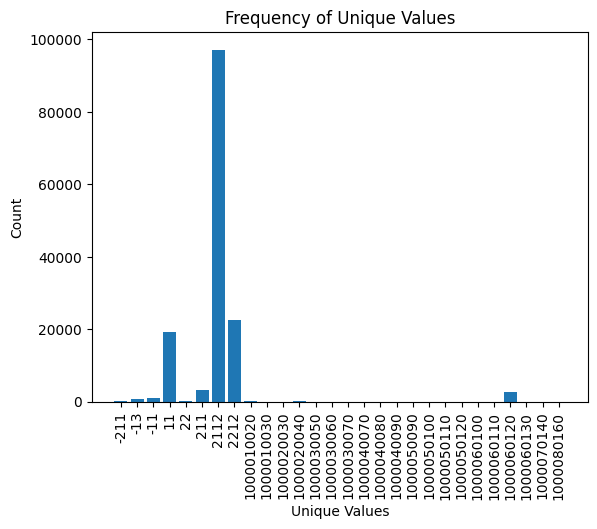

In [33]:
np.concatenate(np.array(file[file.keys()[0]]['MuonBarrelG4Hits.pdgId'].array()))
unique_values, counts = np.unique(np.concatenate(np.array(file[file.keys()[0]]['MuonBarrelG4Hits.pdgId'].array())), return_counts=True)

unique_labels = [str(val) for val in unique_values]

# Plot
plt.bar(unique_labels, counts)
plt.xlabel("Unique Values")
plt.ylabel("Count")
plt.title("Frequency of Unique Values")

plt.xticks(rotation=90)  # Rotate labels if they are long
plt.show()

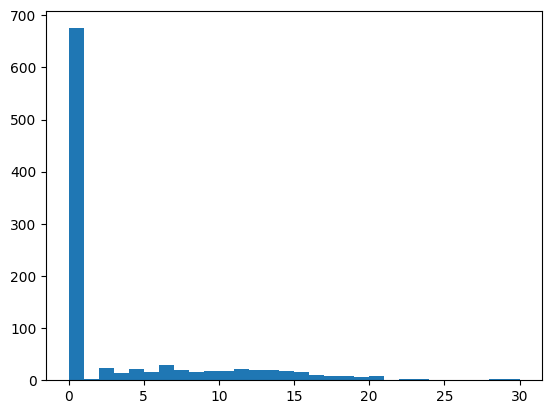

In [34]:
plt.hist(np.array([arr[arr==211].shape[0] for arr in np.array(file[file.keys()[0]]['MuonBarrelG4Hits.pdgId'].array())]), bins='auto')
plt.show()

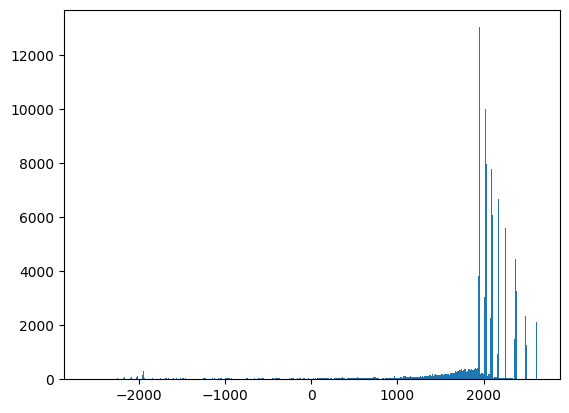

In [35]:
plt.hist(np.concatenate(np.array(file[file.keys()[0]]['MuonBarrelG4Hits.postStepPosition.y'].array())), bins='auto')
plt.show()

In [19]:
x = np.array(file[file.keys()[0]]['MuonBarrelG4Hits.postStepPosition.y'].array())

In [9]:
y = np.concatenate(np.array(file[file.keys()[0]]['MuonBarrelG4Hits.postStepPosition.y'].array()))

In [33]:
y.shape[0]/1000/18

2.466111111111111

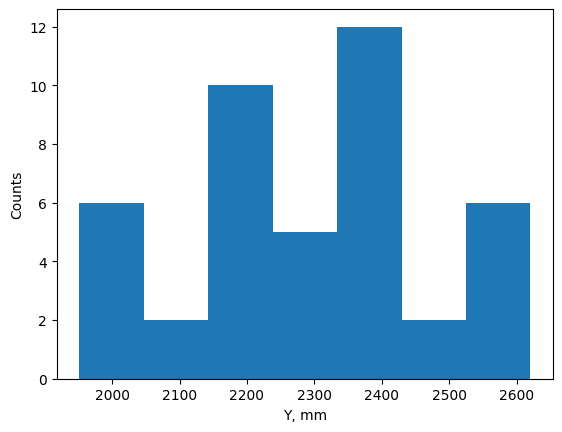

In [8]:
plt.hist(x[1], bins='auto')
plt.xlabel('Y, mm')
plt.ylabel('Counts')
plt.show()

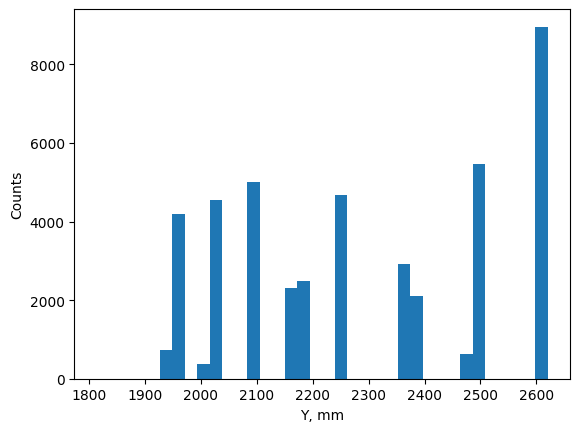

In [48]:
plt.hist(y[(y<3000) & (y > 1800)], bins='auto')
plt.xlabel('Y, mm')
plt.ylabel('Counts')
plt.show()

In [5]:
mu_sys_bins = [(1940, 1970), (2010, 2040), (2080, 2110), (2160, 2190), (2240, 2270), (2360, 2390), (2480, 2510), (2600, 2630)]
# mu_sys_bins = [1940, 1970, 2010, 2040, 2080, 2110, 2160, 2190, 2240, 2270, 2360, 2390, 2480, 2510, 2600, 2630] # delete every second?

In [21]:
i = 0
j = 0
# hits_in_layers = np.zeros((1000, 8))
hits_in_layers = np.array([np.array([x[i][(x[i] > mu_sys_bins[j][0]) & (x[i] < mu_sys_bins[j][1])].shape[0] for i in range(1000)]) for j in range(8)])
hits_in_layers.shape

(8, 1000)

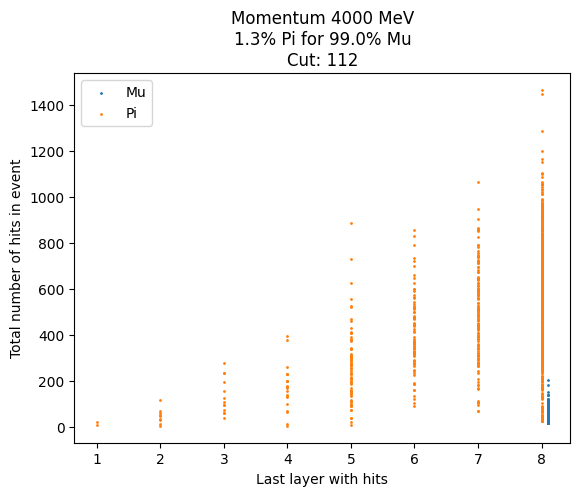

In [106]:
# hits_in_layers[:,5]
# np.argmax(hits_in_layers[:,6] == 0)
mean_in_layers_mu = np.zeros(1000)
first_zero_mu = np.zeros(1000)
mean_in_layers_pi = np.zeros(1000)
first_zero_pi = np.zeros(1000)
j= 4000
filepath = os.path.join("data", f"fullsim_mu_{j}_musystem.root")
file = uproot.open(filepath)
x = np.array(file[file.keys()[0]]['MuonBarrelG4Hits.postStepPosition.y'].array())
hits_in_layers_mu = np.array([np.array([x[i][(x[i] > mu_sys_bins[j][0]) & (x[i] < mu_sys_bins[j][1])].shape[0] for i in range(1000)]) for j in range(8)])
filepath = os.path.join("data", f"fullsim_pi_{j}_musystem.root")
file = uproot.open(filepath)
x = np.array(file[file.keys()[0]]['MuonBarrelG4Hits.postStepPosition.y'].array())
hits_in_layers_pi = np.array([np.array([x[i][(x[i] > mu_sys_bins[j][0]) & (x[i] < mu_sys_bins[j][1])].shape[0] for i in range(1000)]) for j in range(8)])
for i in range(1000):
    first_zero_mu[i] =  np.flatnonzero(hits_in_layers_mu[:,i])[-1] + 1 if np.count_nonzero(hits_in_layers_mu[:,i])>0 else 0
    mean_in_layers_mu[i] = np.sum(hits_in_layers_mu[:,i])
plt.scatter(first_zero_mu+.1, mean_in_layers_mu, s=1, label='Mu')
for i in range(1000):
    first_zero_pi[i] =  np.flatnonzero(hits_in_layers_pi[:,i])[-1] + 1 if np.count_nonzero(hits_in_layers_pi[:,i])>0 else 0
    mean_in_layers_pi[i] = np.sum(hits_in_layers_pi[:,i])
plt.scatter(first_zero_pi, mean_in_layers_pi, s=1, label='Pi')
plt.xlabel('Last layer with hits')
plt.ylabel('Total number of hits in event')
plt.legend()
cut = np.percentile(mean_in_layers_mu, 99)
plt.title(f'Momentum {j} MeV\n{((mean_in_layers_pi <  cut) & (hits_in_layers_pi == 8)).sum() / 10}% Pi for {(mean_in_layers_mu <= cut).sum() / 10}% Mu\nCut: {  round(cut)}' )
plt.show()

In [73]:
np.percentile(mean_in_layers_mu, 99)

112.00999999999999

In [74]:
sorted(mean_in_layers_mu)

[16.0,
 16.0,
 16.0,
 16.0,
 17.0,
 18.0,
 18.0,
 18.0,
 18.0,
 18.0,
 19.0,
 19.0,
 19.0,
 19.0,
 19.0,
 19.0,
 19.0,
 20.0,
 20.0,
 20.0,
 20.0,
 20.0,
 20.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 21.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 23.0,
 23.0,
 23.0,
 23.0,
 23.0,
 23.0,
 23.0,
 23.0,
 23.0,
 23.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 25.0,
 25.0,
 25.0,
 25.0,
 25.0,
 25.0,
 25.0,
 25.0,
 25.0,
 25.0,
 25.0,
 25.0,
 25.0,
 25.0,
 25.0,
 25.0,
 25.0,
 25.0,
 25.0,
 26.0,
 26.0,
 26.0,
 26.0,
 26.0,
 26.0,
 26.0,
 26.0,
 26.0,
 26.0,
 26.0,
 26.0,
 26.0,
 26.0,
 27.0,
 27.0,
 27.0,
 27.0,
 27.0,
 27.0,
 27.0,
 27.0,
 27.0,
 27.0,
 27.0,
 27.0,
 27.0,
 27.0,
 27.0,
 27.0,
 28.0,
 28.0,
 28.0,
 28.0,
 28.0,
 28.0,
 28.0,
 28.0,
 28.0,
 28.0,
 28.0,
 28.0,
 28.0,
 28.0,
 28.0,
 28.0,
 28.0,
 28.0,
 28.0,
 28.0,
 28.0,
 28.0,
 28.0,
 28.0,
 29.0,
 29.0,
 29.0,
 29.0,
 29.0,
 29.0,
 29.0,
 29.0,
 29.0,

In [41]:
(mean_in_layers_mu < 200).sum() / 10

999

In [8]:
hits_in_layers_pi[:,0]

array([20, 74, 24,  2,  5, 22, 28, 81])

In [122]:
np.flatnonzero(hits_in_layers_pi[:,i])[-1] + 1 if np.count_nonzero(hits_in_layers_pi[:,i])>0 else 0

8

In [170]:
((hits_in_layers_pi[7,:] == 0) & (hits_in_layers_pi[6,:] != 0)).sum()

123

In [16]:
((mean_in_layers_pi < 200) & (hits_in_layers_pi == 8)).sum()

40

In [162]:
(hits_in_layers_pi[6,:] == 0).sum()

676

In [147]:
np.flatnonzero(hits_in_layers_pi[:,1])[-1] + 1

3

In [172]:
(first_zero_pi == 8).sum()

218

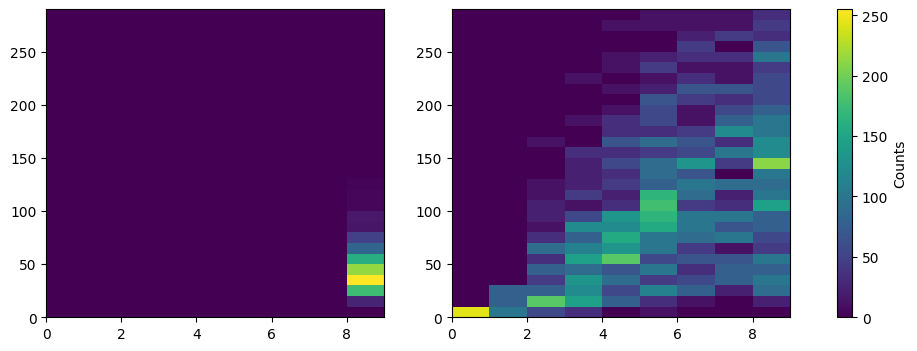

In [173]:
# Create a figure with two subplots side by side.
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Create the first 2D histogram and capture its QuadMesh object (at index 3).
h1 = axes[0].hist2d(first_zero_mu, mean_in_layers_mu, bins=[np.arange(10), np.arange(0, 300, 10)])

# Create the second 2D histogram.
h2 = axes[1].hist2d(first_zero_pi, mean_in_layers_pi, bins=[np.arange(10), np.arange(0, 300, 10)], vmax=23)

# Add one shared colorbar for both plots.
fig.colorbar(h1[3], ax=axes.ravel().tolist(), label='Counts')

plt.show()

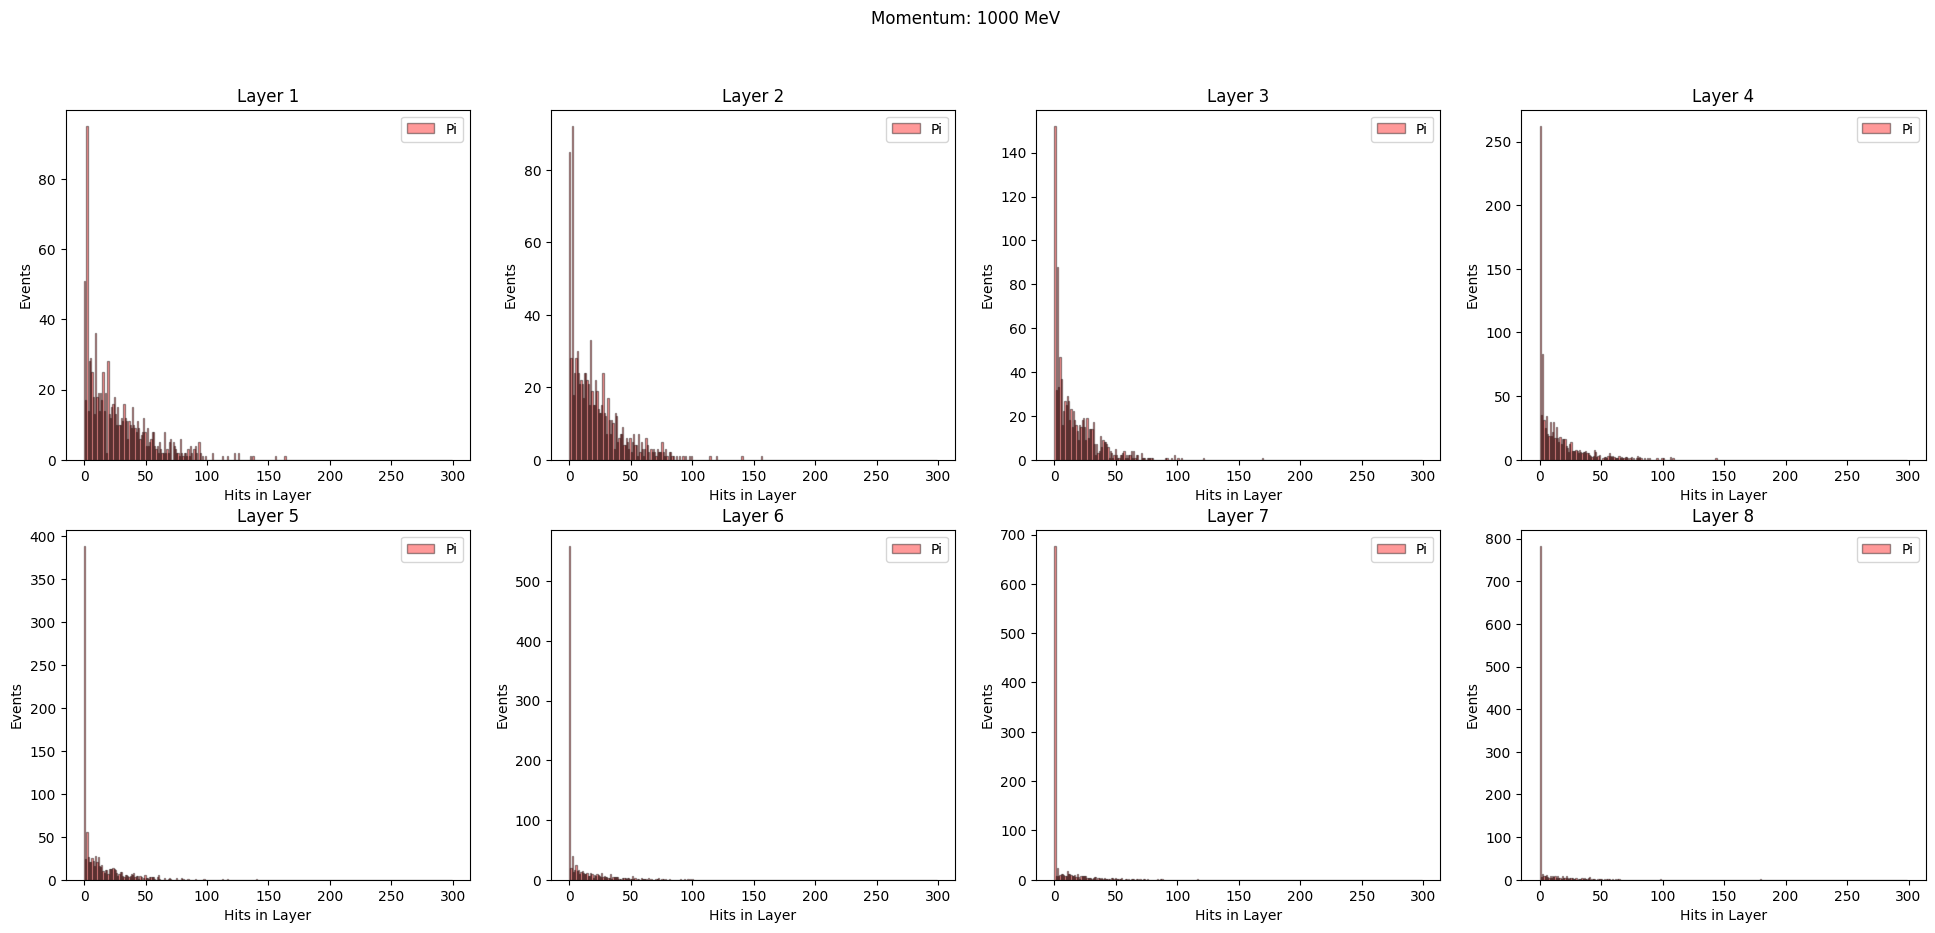

In [138]:
for i in [1000]:
    filepath = os.path.join("data", f"fullsim_mu_{i}_musystem.root")
    file = uproot.open(filepath)
    x = np.array(file[file.keys()[0]]['MuonBarrelG4Hits.postStepPosition.y'].array())
    hits_in_layers_mu = np.array([np.array([x[i][(x[i] > mu_sys_bins[j][0]) & (x[i] < mu_sys_bins[j][1])].shape[0] for i in range(1000)]) for j in range(8)])
    filepath = os.path.join("data", f"fullsim_pi_{i}_musystem.root")
    file = uproot.open(filepath)
    x = np.array(file[file.keys()[0]]['MuonBarrelG4Hits.postStepPosition.y'].array())
    hits_in_layers_pi = np.array([np.array([x[i][(x[i] > mu_sys_bins[j][0]) & (x[i] < mu_sys_bins[j][1])].shape[0] for i in range(1000)]) for j in range(8)])
    plt.figure(figsize=(24,10))
    plt.suptitle(f'Momentum: {i} MeV')
    
    for j in range(8):
        plt.subplot(2, 4, j+1)
        bins = np.arange(0, 300, 1)
        plt.hist(hits_in_layers_pi[j], bins=bins, color='red', edgecolor='black', alpha=0.4, label='Pi')
        bins = np.arange(0, 100, 1)
        # plt.hist(hits_in_layers_mu[j], bins=bins, color='blue', edgecolor='black', alpha=0.5, label='Mu')

        plt.xlabel('Hits in Layer')
        plt.ylabel('Events')
        plt.legend()
        plt.title(f'Layer {j+1}')
    plt.show()

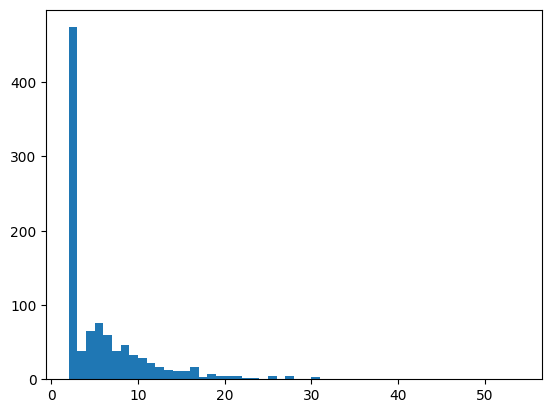

In [64]:
plt.hist(hits_in_layers[7], bins='auto')
plt.show()

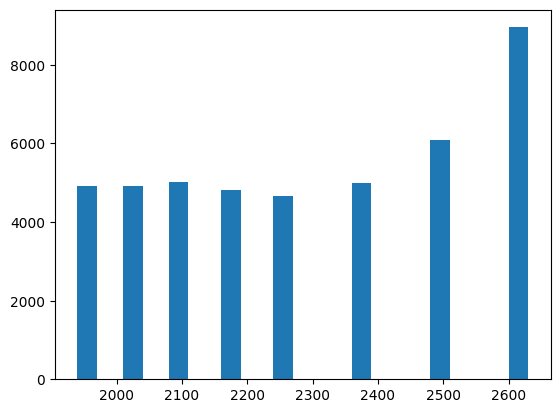

In [30]:
plt.hist(y, bins=mu_sys_bins)
plt.show()

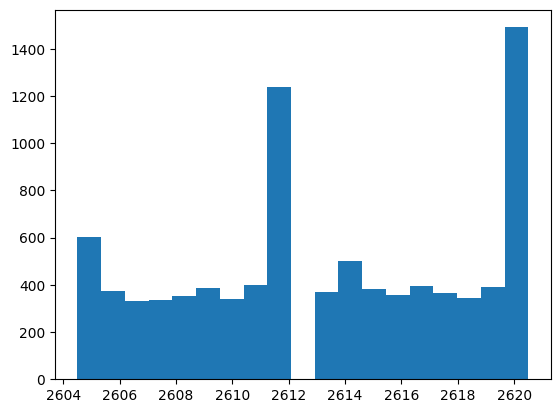

In [35]:
plt.hist(y[(y<2650) & (y > 2600)], bins='auto')
plt.show()

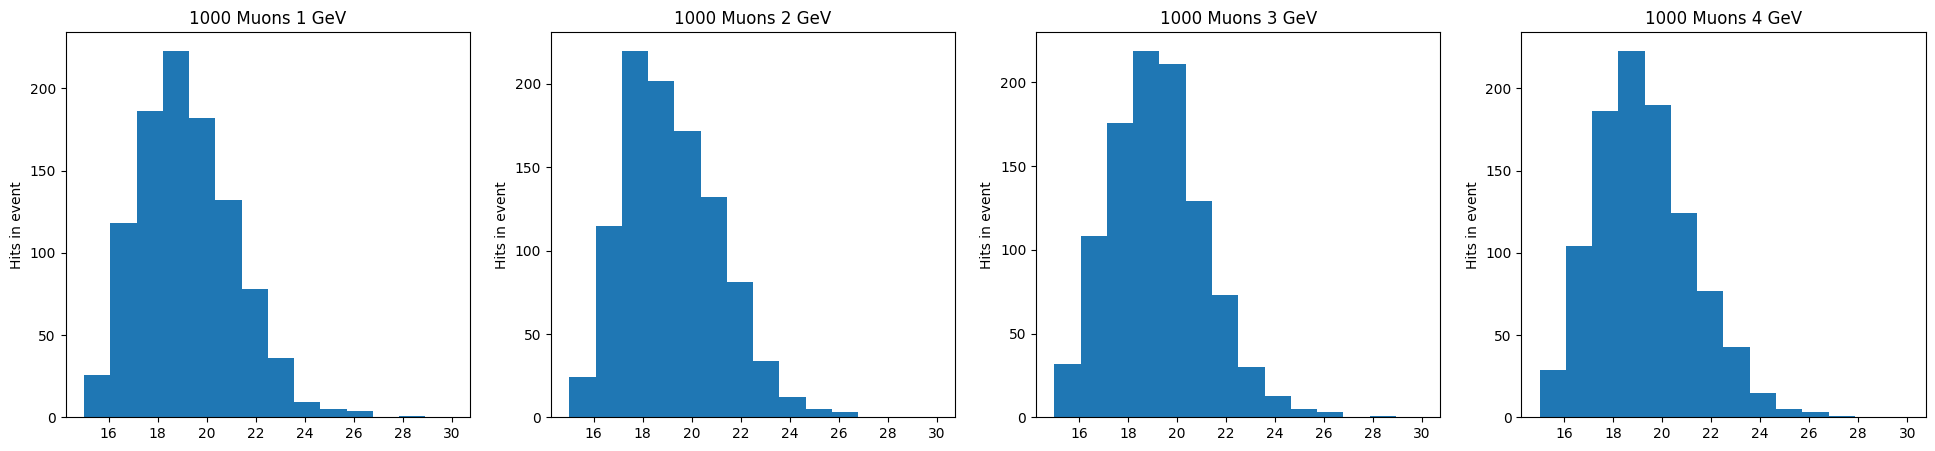

In [25]:
shapes = np.zeros((4, 1000))
for i in [1000, 2000, 3000, 4000]:
    filepath = os.path.join("data", f"fullsim_mu_{i}_musystem.root")
    file = uproot.open(filepath)
    shapes[int(i/1000 - 1)] = [arr[arr==13].shape[0] for arr in np.array(file[file.keys()[0]]['MuonBarrelG4Hits.pdgId'].array())]
np.array(file[file.keys()[0]]['MuonBarrelG4Hits.pdgId'].array())

[arr.shape[0] for arr in np.array(file[file.keys()[0]]['MuonBarrelG4Hits.pdgId'].array())]

shapes

plt.figure(figsize=(24, 5))
plt.subplot(1, 4, 1)  
plt.hist(shapes[0], bins=np.linspace(15, 30, 15))
plt.ylabel('Hits in event')
plt.title('1000 Muons 1 GeV')
plt.subplot(1, 4, 2)  
plt.hist(shapes[1], bins=np.linspace(15, 30, 15))
plt.ylabel('Hits in event')
plt.title('1000 Muons 2 GeV')
plt.subplot(1, 4, 3)  
plt.hist(shapes[2], bins=np.linspace(15, 30, 15))
plt.ylabel('Hits in event')
plt.title('1000 Muons 3 GeV')
plt.subplot(1, 4, 4)  
plt.hist(shapes[3], bins=np.linspace(15, 30, 15))
plt.ylabel('Hits in event')
plt.title('1000 Muons 4 GeV')
plt.show()

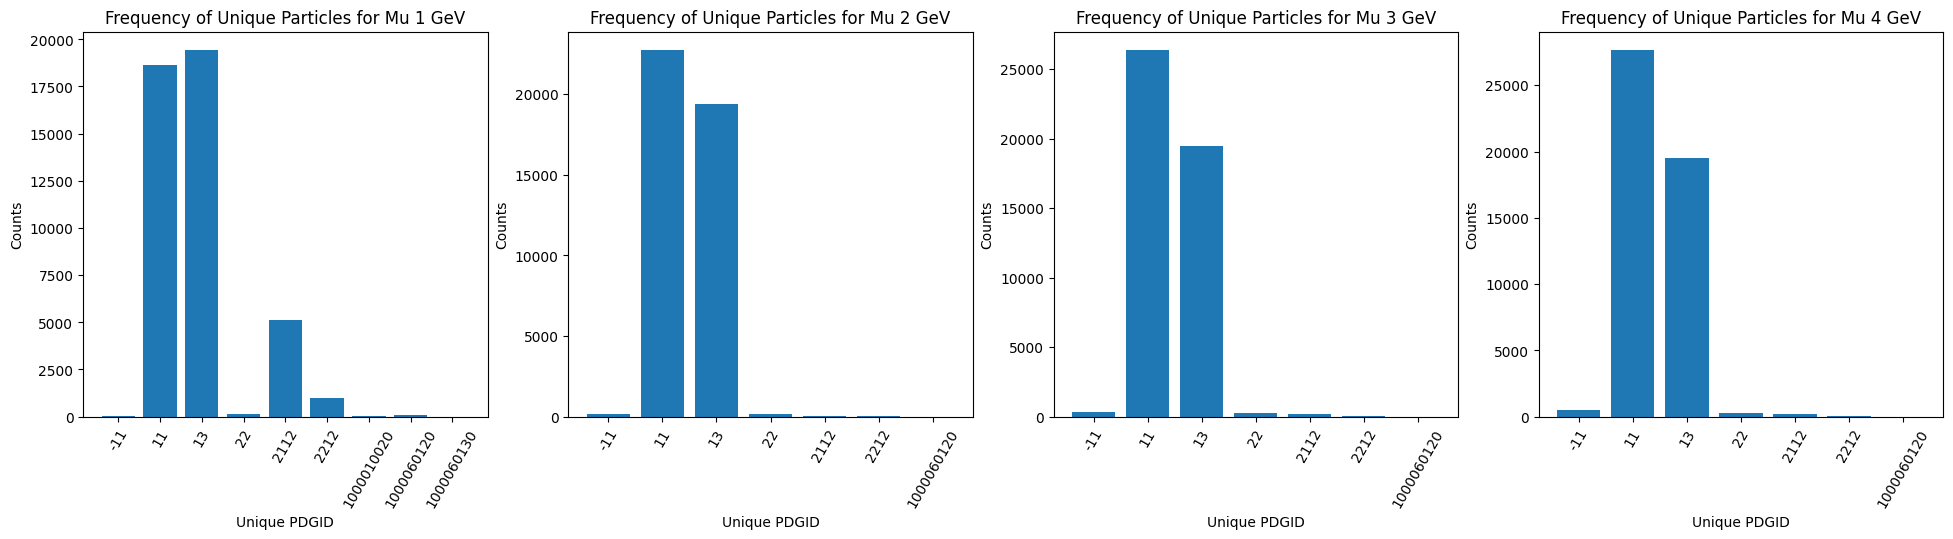

In [23]:
plt.figure(figsize=(24, 5))
for i in [1000, 2000, 3000, 4000]:
    filepath = os.path.join("data", f"fullsim_mu_{i}_musystem.root")
    file = uproot.open(filepath)
    unique_values, counts = np.unique(np.concatenate(np.array(file[file.keys()[0]]['MuonBarrelG4Hits.pdgId'].array())), return_counts=True)
    
    unique_labels = [str(val) for val in unique_values]
    
    # Plot
    plt.subplot(1, 4, int(i/1000))
    plt.bar(unique_labels, counts)
    plt.xlabel("Unique PDGID")
    plt.ylabel("Counts")
    plt.title(f"Frequency of Unique Particles for Mu {int(i/1000)} GeV")
    
    plt.xticks(rotation=60)  # Rotate labels if they are long
plt.show()

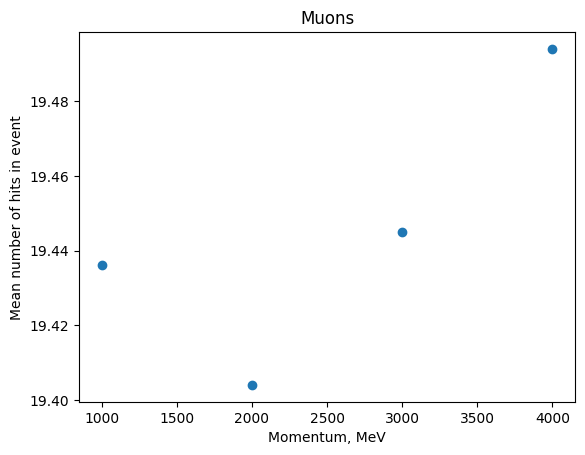

In [26]:
plt.scatter([1000, 2000, 3000, 4000], np.mean(shapes, axis=1))
plt.title('Muons')
plt.xlabel('Momentum, MeV')
plt.ylabel('Mean number of hits in event')
plt.show()

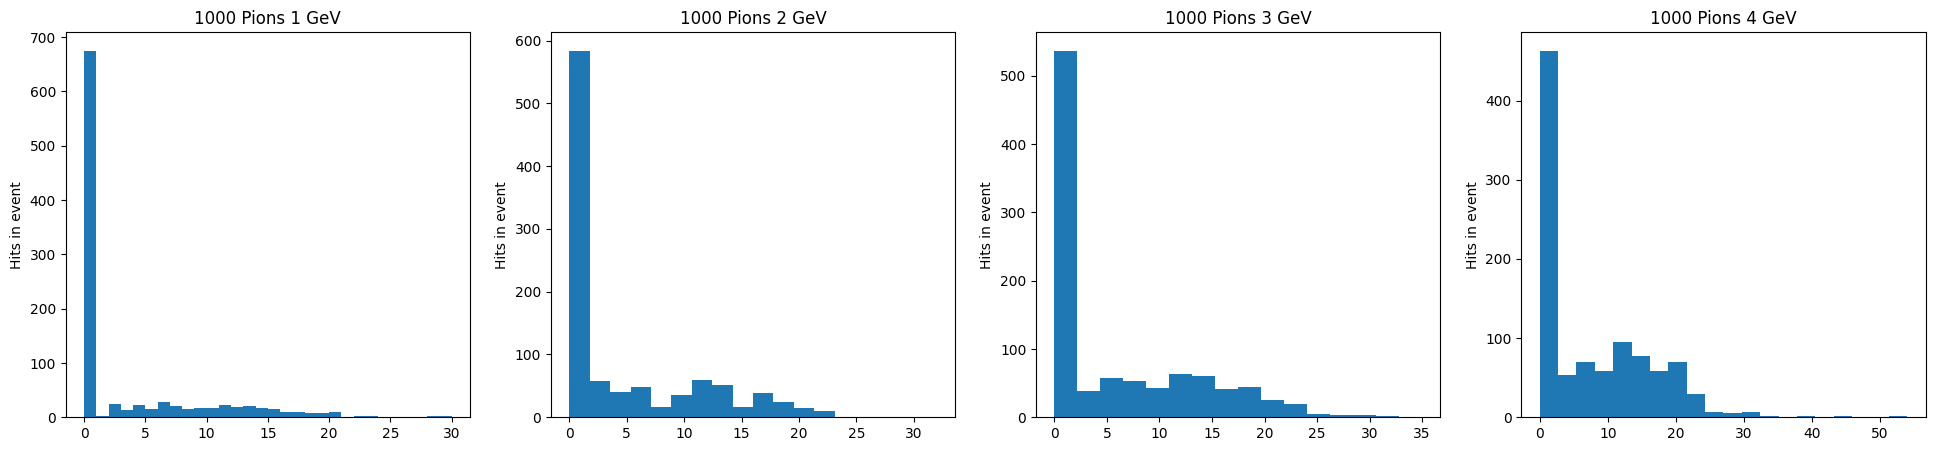

In [41]:
shapes = np.zeros((4, 1000))
for i in [1000, 2000, 3000, 4000]:
    filepath = os.path.join("data", f"fullsim_pi_{i}_musystem.root")
    file = uproot.open(filepath)
    shapes[int(i/1000 - 1)] = [arr[arr==211].shape[0] for arr in np.array(file[file.keys()[0]]['MuonBarrelG4Hits.pdgId'].array())]
np.array(file[file.keys()[0]]['MuonBarrelG4Hits.pdgId'].array())

[arr.shape[0] for arr in np.array(file[file.keys()[0]]['MuonBarrelG4Hits.pdgId'].array())]

shapes

plt.figure(figsize=(24, 5))
plt.subplot(1, 4, 1)  
plt.hist(shapes[0], bins='auto')
plt.ylabel('Hits in event')
plt.title('1000 Pions 1 GeV')
plt.subplot(1, 4, 2)  
plt.hist(shapes[1], bins='auto')
plt.ylabel('Hits in event')
plt.title('1000 Pions 2 GeV')
plt.subplot(1, 4, 3)  
plt.hist(shapes[2], bins='auto')
plt.ylabel('Hits in event')
plt.title('1000 Pions 3 GeV')
plt.subplot(1, 4, 4)  
plt.hist(shapes[3], bins='auto')
plt.ylabel('Hits in event')
plt.title('1000 Pions 4 GeV')
plt.show()

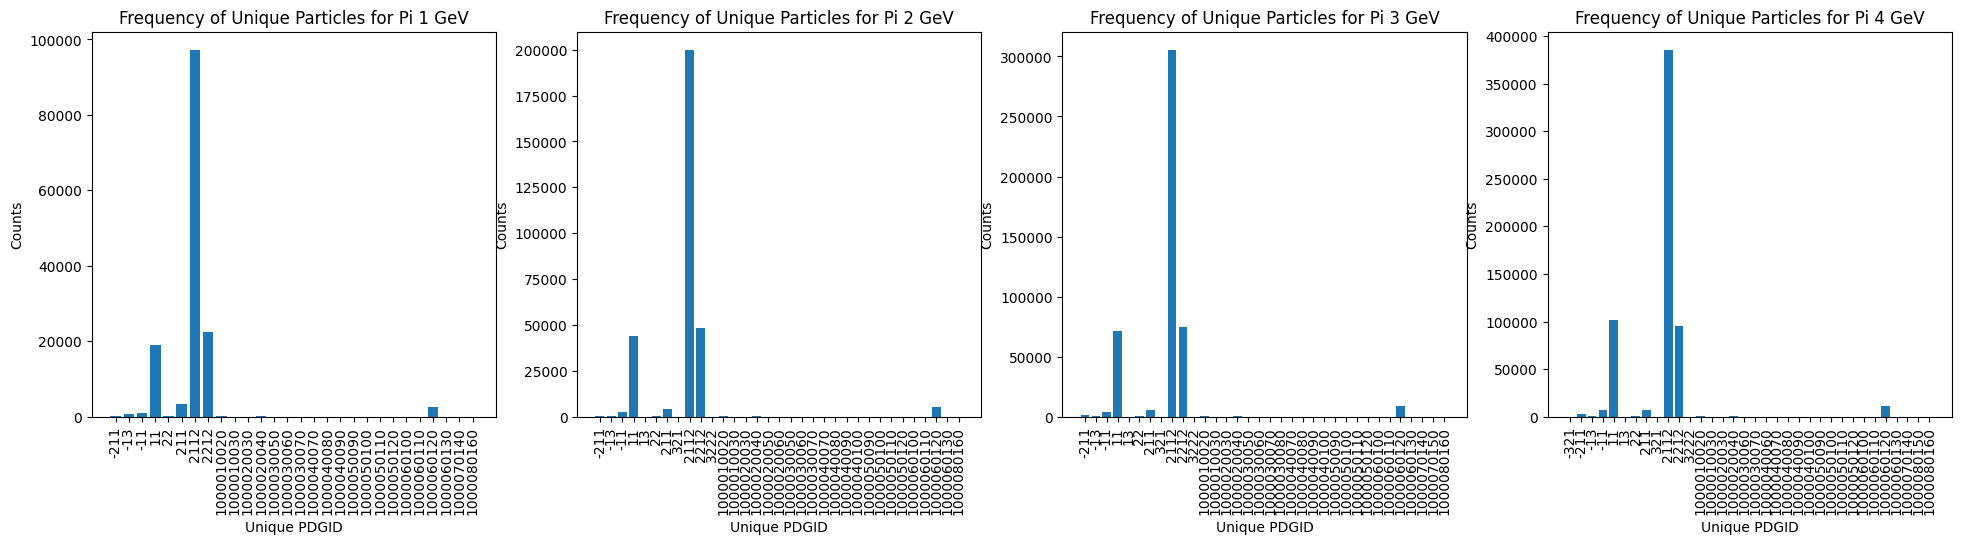

In [39]:
plt.figure(figsize=(24, 5))
for i in [1000, 2000, 3000, 4000]:
    filepath = os.path.join("data", f"fullsim_pi_{i}_musystem.root")
    file = uproot.open(filepath)
    unique_values, counts = np.unique(np.concatenate(np.array(file[file.keys()[0]]['MuonBarrelG4Hits.pdgId'].array())), return_counts=True)
    
    unique_labels = [str(val) for val in unique_values]
    
    # Plot
    plt.subplot(1, 4, int(i/1000))
    plt.bar(unique_labels, counts)
    plt.xlabel("Unique PDGID")
    plt.ylabel("Counts")
    plt.title(f"Frequency of Unique Particles for Pi {int(i/1000)} GeV")
    
    plt.xticks(rotation=90)  # Rotate labels if they are long
plt.show()

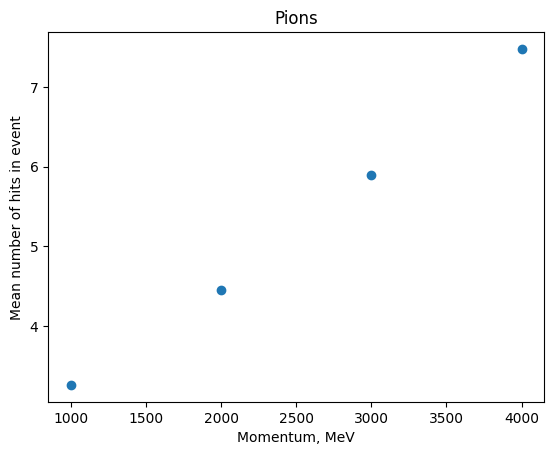

In [37]:
plt.scatter([1000, 2000, 3000, 4000], np.mean(shapes, axis=1))
plt.title('Pions')
plt.xlabel('Momentum, MeV')
plt.ylabel('Mean number of hits in event')
plt.show()

In [3]:
filepath = os.path.join("data", "decay_test_ka.root")

In [4]:
file = uproot.open(filepath)

In [5]:
file[file.keys()[0]].keys()

[b'allGenParticles',
 b'allGenParticles#0',
 b'allGenParticles#1',
 b'allGenVertices',
 b'FarichBarrelG4Hits',
 b'FarichEndcapG4Hits',
 b'genVertices',
 b'secondaryPart',
 b'secondaryPart#0',
 b'secondaryPart#1']

In [6]:
file[file.keys()[0]]['allGenParticles'].keys()

[b'allGenParticles.core.pdgId',
 b'allGenParticles.core.charge',
 b'allGenParticles.core.status',
 b'allGenParticles.core.vertex.x',
 b'allGenParticles.core.vertex.y',
 b'allGenParticles.core.vertex.z',
 b'allGenParticles.core.p4.mass',
 b'allGenParticles.core.p4.px',
 b'allGenParticles.core.p4.py',
 b'allGenParticles.core.p4.pz',
 b'allGenParticles.core.bits']

In [7]:
primary_pdgid = np.array(file[file.keys()[0]]['allGenParticles']['allGenParticles.core.pdgId'].array())

In [8]:
primary_pdgid = np.concatenate(primary_pdgid)

In [9]:
primary_pdgid = np.abs(primary_pdgid)

In [10]:
np.unique(primary_pdgid)

array([       11,        12,        13,        14,        22,       321,
             421,     30443, 480000000])

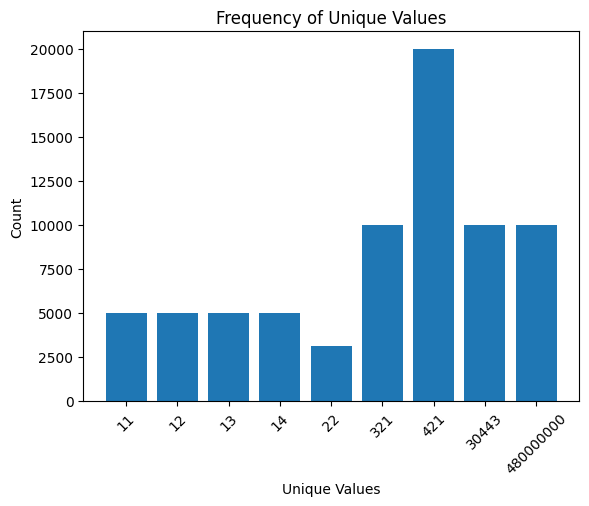

In [11]:
unique_values, counts = np.unique(primary_pdgid, return_counts=True)

unique_labels = [str(val) for val in unique_values]

# Plot
plt.bar(unique_labels, counts)
plt.xlabel("Unique Values")
plt.ylabel("Count")
plt.title("Frequency of Unique Values")

plt.xticks(rotation=45)  # Rotate labels if they are long
plt.show()

In [12]:
dict_counts = {unique_values[i]:counts[i] for i in range(len(unique_values))}

In [13]:
dict_counts

{11: 5004,
 12: 5004,
 13: 4996,
 14: 4996,
 22: 3126,
 321: 10000,
 421: 20000,
 30443: 10000,
 480000000: 10000}

In [14]:
file[file.keys()[0]].keys()

[b'allGenParticles',
 b'allGenParticles#0',
 b'allGenParticles#1',
 b'allGenVertices',
 b'FarichBarrelG4Hits',
 b'FarichEndcapG4Hits',
 b'genVertices',
 b'secondaryPart',
 b'secondaryPart#0',
 b'secondaryPart#1']

In [15]:
file[file.keys()[0]]['FarichBarrelG4Hits'].keys()

[b'FarichBarrelG4Hits.cellId',
 b'FarichBarrelG4Hits.energy',
 b'FarichBarrelG4Hits.globalTime',
 b'FarichBarrelG4Hits.localTime',
 b'FarichBarrelG4Hits.preStepPosition.x',
 b'FarichBarrelG4Hits.preStepPosition.y',
 b'FarichBarrelG4Hits.preStepPosition.z',
 b'FarichBarrelG4Hits.postStepPosition.x',
 b'FarichBarrelG4Hits.postStepPosition.y',
 b'FarichBarrelG4Hits.postStepPosition.z',
 b'FarichBarrelG4Hits.trackId',
 b'FarichBarrelG4Hits.pdgId',
 b'FarichBarrelG4Hits.momentum.mass',
 b'FarichBarrelG4Hits.momentum.px',
 b'FarichBarrelG4Hits.momentum.py',
 b'FarichBarrelG4Hits.momentum.pz']

In [16]:
farich_pdgid = np.array(file[file.keys()[0]]['FarichBarrelG4Hits']['FarichBarrelG4Hits.pdgId'].array())

In [17]:
farich_pdgid = np.concatenate(farich_pdgid)

In [18]:
farich_pdgid = np.abs(farich_pdgid)

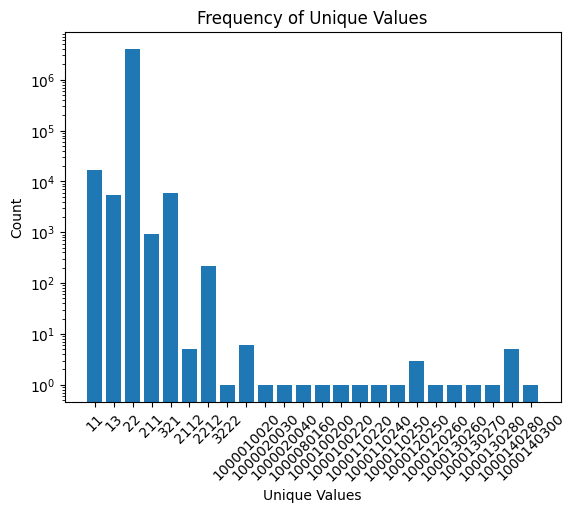

In [19]:
unique_values, counts = np.unique(farich_pdgid, return_counts=True)

unique_labels = [str(val) for val in unique_values]

# Plot
plt.bar(unique_labels, counts)
plt.xlabel("Unique Values")
plt.ylabel("Count")
plt.title("Frequency of Unique Values")
plt.yscale('log')
plt.xticks(rotation=45)  # Rotate labels if they are long
plt.show()

In [21]:
farich_dict_counts = {unique_values[i]:counts[i] for i in range(len(unique_values))}

In [22]:
farich_dict_counts

{11: 16503,
 13: 5286,
 22: 4059368,
 211: 943,
 321: 5833,
 2112: 5,
 2212: 219,
 3222: 1,
 1000010020: 6,
 1000020030: 1,
 1000020040: 1,
 1000080160: 1,
 1000100200: 1,
 1000100220: 1,
 1000110220: 1,
 1000110240: 1,
 1000110250: 1,
 1000120250: 3,
 1000120260: 1,
 1000130260: 1,
 1000130270: 1,
 1000130280: 1,
 1000140280: 5,
 1000140300: 1}

In [26]:
1145+963

2108

In [27]:

farich_pdgid = np.array(file[file.keys()[0]]['FarichBarrelG4Hits']['FarichBarrelG4Hits.pdgId'].array())


In [28]:
farich_pdgid[29]

array([ -22,  -22,  -22,  -22,  -22,  -22,  -22,  -22,  -22,  -22,  -22,
        -22,  -22,  -22,  -22,  -22,  -22,  -22,  -22,  -22,  -22,  -22,
        -22,  -22,  -22,  -22,  -22,  -22,  -22,  -22,  -22,  -22,  -22,
        -22,  -22,  -22,  -22,  -22,  -22,  -22,  -22,  -22,  -22,  -22,
        -22,  -22,  -22,  -22,  -22,  -22,  -22,  -22,  -22,  -22,  -22,
        -22,  -22,  -22,  -22,  -22,  -22,  -22,  -22,  -22,  -22,  -22,
        -22,  -22,  -22,  -22,  -22,  -22,  -22,  -22,  -22,  -22,  -22,
        -22,  -22,  -22,  -22,  -22,  -22,  -22,  -22,  -22,  -22,  -22,
        -22,  -22,  -22,  -22,  -22,  -22,  -22,  -22,  -22,  -22,  -22,
        -22,  -22,  -22,  -22,  -22,  -22,  -22,  -22,  -22,  -22,  -22,
        -22,  -22,  -22,  -22,  -22,  -22,  -22,  -22,  -22,  -22,  -22,
        -22,  -22,  -22,  -22,  -22,  -22,  -22,  -22,  -22,  -22,  -22,
        -22,  -22,  -22,  -22,  -22,  -22,  -22,  -22,  -22,  -22,  -22,
        -22,  -22,  -22,  -22,  -22,  -22,  -22,  -

In [29]:
event_num = 8142
farich_pdgid[event_num]

array([-11,  11, 211])

In [30]:
farich_pdgid[event_num][np.flatnonzero(farich_pdgid[event_num] + 22)[np.where(np.diff(np.flatnonzero(farich_pdgid[event_num] + 22)) != 1)[0][-1] + 1] if (np.any(np.diff(np.flatnonzero(farich_pdgid[event_num] + 22)) != 1)) else np.flatnonzero(farich_pdgid[event_num] + 22)[0]]

-11

In [31]:
# farich_pdgid[event_num][find_index(farich_pdgid[event_num])]

In [32]:
np.unique(farich_pdgid[0], return_counts=True)

(array([-22, -11,  11, 211]), array([1482,    1,    1,    1], dtype=int64))

In [24]:
# primary_energy = np.array(file[file.keys()[0]]['allGenParticles']['allGenParticles.core.energy'].array())

primary_pdgid = np.array(file[file.keys()[0]]['allGenParticles']['allGenParticles.core.pdgId'].array())


In [34]:
primary_pdgid[event_num]

array([    30443,       411,       211,       111,        22,        22,
            -411, 480000001])

In [35]:
primary_pdgid[0]

array([    30443,       411,       211,       111,       -11,        11,
              22,      -411, 480000001])

In [25]:
i = 0
empty_farich = 0
mismatches = []
good_events = []
primary_particle_idx = []
find_index = lambda arr: (idx[-1]+1 if (idx := np.flatnonzero(arr == -22)).size and (idx[-1]+1 < arr.size) else 0) # моржовый оператор :)


for primary_particles in primary_pdgid:
    is_good = True
    if primary_particles[0] != 30443:
        print('First wrong')
        is_good = False
    if primary_particles[1] != 411:
        print('Second wrong')
        is_good = False
    if primary_particles[2] != -13 and primary_particles[2] != 211:
        print('Third wrong')
        is_good = False
    if farich_pdgid[i].shape[0] != 0 and np.flatnonzero(farich_pdgid[i] + 22).shape[0] != 0:
        if primary_particles[2] != farich_pdgid[i][find_index(farich_pdgid[i])]:
            # print('Mismatch', i)
            mismatches.append(i)
            is_good = False
        elif farich_pdgid[i][find_index(farich_pdgid[i])] != farich_pdgid[i][np.flatnonzero(farich_pdgid[i] + 22)[np.where(np.diff(np.flatnonzero(farich_pdgid[i] + 22)) != 1)[0][-1] + 1] if (np.any(np.diff(np.flatnonzero(farich_pdgid[i] + 22)) != 1)) else np.flatnonzero(farich_pdgid[i] + 22)[0]]:
            print(i)
            
    if farich_pdgid[i].shape[0] == 0 or np.flatnonzero(farich_pdgid[i] + 22).shape[0] == 0:
        empty_farich += 1
        is_good = False
    if is_good:
        good_events.append(i)
        primary_particle_idx.append(find_index(farich_pdgid[i]))
    i += 1
    

print('Empty Farich:',empty_farich)
print('Mismatches: ',len(mismatches))
print(len(mismatches) + empty_farich)
print('Good Events:', i - len(mismatches) - empty_farich)
print(len(good_events))

Second wrong
Third wrong


IndexError: tuple index out of range

In [37]:
primary_particle_idx

[1484,
 882,
 667,
 432,
 629,
 368,
 456,
 715,
 377,
 499,
 502,
 579,
 450,
 424,
 492,
 505,
 105,
 484,
 264,
 513,
 1632,
 294,
 1492,
 401,
 470,
 497,
 395,
 340,
 1689,
 407,
 1071,
 512,
 505,
 528,
 444,
 554,
 489,
 1622,
 481,
 469,
 470,
 531,
 616,
 471,
 449,
 465,
 523,
 504,
 1724,
 342,
 463,
 403,
 516,
 390,
 498,
 596,
 373,
 439,
 476,
 484,
 355,
 624,
 428,
 467,
 537,
 496,
 468,
 776,
 569,
 480,
 487,
 457,
 402,
 509,
 518,
 552,
 345,
 446,
 479,
 512,
 727,
 494,
 504,
 514,
 525,
 496,
 156,
 584,
 361,
 996,
 522,
 431,
 520,
 529,
 443,
 735,
 401,
 1295,
 476,
 527,
 511,
 590,
 401,
 549,
 535,
 574,
 539,
 585,
 526,
 592,
 483,
 1512,
 653,
 484,
 536,
 549,
 562,
 388,
 563,
 499,
 513,
 433,
 448,
 494,
 502,
 494,
 479,
 485,
 487,
 495,
 442,
 464,
 476,
 506,
 430,
 491,
 327,
 280,
 383,
 412,
 401,
 483,
 441,
 1007,
 727,
 495,
 546,
 467,
 467,
 548,
 536,
 435,
 386,
 499,
 440,
 497,
 570,
 357,
 609,
 522,
 523,
 1676,
 442,
 337,
 431,

In [38]:
good_events

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 10,
 12,
 13,
 14,
 15,
 16,
 17,
 19,
 21,
 22,
 23,
 24,
 27,
 30,
 31,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 60,
 61,
 62,
 63,
 64,
 69,
 70,
 71,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 93,
 94,
 96,
 97,
 100,
 101,
 102,
 103,
 104,
 106,
 107,
 108,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 123,
 124,
 125,
 126,
 127,
 128,
 131,
 132,
 133,
 134,
 135,
 137,
 138,
 140,
 142,
 144,
 145,
 147,
 148,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 168,
 169,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 180,
 181,
 184,
 185,
 186,
 187,
 190,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 203,
 204,
 205,
 206,
 208,
 209,
 210,
 211,
 212,
 213,
 214,
 216,
 217,
 218,
 220,
 221,
 222,
 223,
 224,
 226,
 227,
 228,
 229,
 231,
 2

In [39]:
primary_pdgid[good_events][1]

array([    30443,       411,       211,       111,        22,        22,
            -411, 480000001])

In [40]:
np.unique([primary_pdgid[good_events][i][2] for i in range(len(good_events))])

array([-13, 211])

In [41]:
farich_energy = np.array(file[file.keys()[0]]['FarichBarrelG4Hits']['FarichBarrelG4Hits.energy'].array())[good_events]
farich_momentum_x = np.array(file[file.keys()[0]]['FarichBarrelG4Hits']['FarichBarrelG4Hits.momentum.px'].array())[good_events]
farich_momentum_y = np.array(file[file.keys()[0]]['FarichBarrelG4Hits']['FarichBarrelG4Hits.momentum.py'].array())[good_events]
farich_momentum_z = np.array(file[file.keys()[0]]['FarichBarrelG4Hits']['FarichBarrelG4Hits.momentum.pz'].array())[good_events]

primary_momentum_x = np.array(file[file.keys()[0]]['allGenParticles']['allGenParticles.core.p4.px'].array())[good_events]
primary_momentum_y = np.array(file[file.keys()[0]]['allGenParticles']['allGenParticles.core.p4.py'].array())[good_events]
primary_momentum_z = np.array(file[file.keys()[0]]['allGenParticles']['allGenParticles.core.p4.pz'].array())[good_events]

farich_x = np.array(file[file.keys()[0]]['FarichBarrelG4Hits']["FarichBarrelG4Hits.postStepPosition.x"].array())[good_events]
farich_y = np.array(file[file.keys()[0]]['FarichBarrelG4Hits']["FarichBarrelG4Hits.postStepPosition.y"].array())[good_events]
farich_z = np.array(file[file.keys()[0]]['FarichBarrelG4Hits']["FarichBarrelG4Hits.postStepPosition.z"].array())[good_events]
farich_t = np.array(file[file.keys()[0]]['FarichBarrelG4Hits']["FarichBarrelG4Hits.localTime"].array())[good_events]

In [42]:
farich_momentum_x[0][primary_particle_idx[0]]

-0.26813436

In [43]:
primary_momentum_x[0]

array([ 0.        ,  0.06315964, -0.27160358,  0.3347632 ,  0.13172911,
        0.14234093,  0.06069317, -0.06315964, -0.06315964], dtype=float32)

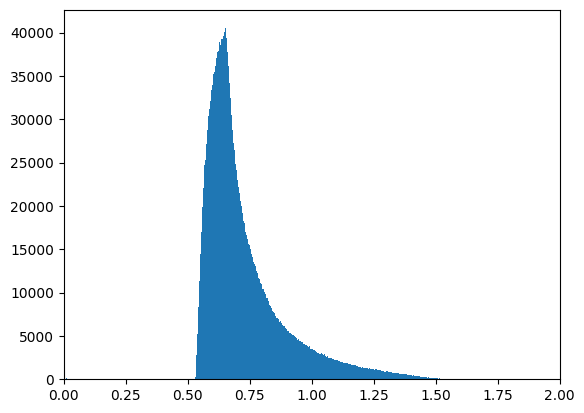

In [44]:
plt.hist(np.concatenate(farich_t), bins='auto')
plt.xlim((0,2))
plt.show()

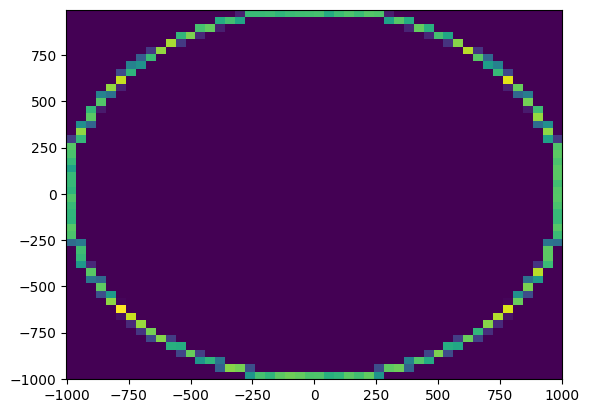

In [45]:
plt.hist2d(np.concatenate(farich_x), np.concatenate(farich_y), bins=50)
plt.show()

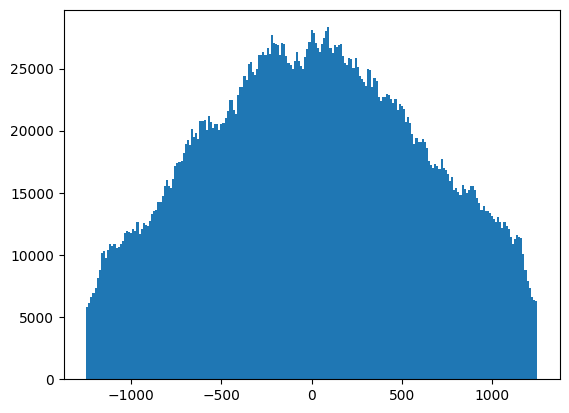

In [46]:
plt.hist(np.concatenate(farich_z), bins='auto')
plt.show()

In [47]:
x = np.array(file[file.keys()[0]]['FarichBarrelG4Hits']["FarichBarrelG4Hits.postStepPosition.x"].array())[good_events]

In [48]:
[x[i][primary_particle_idx[i]] for i in range(x.shape[0])]

[-337.52606,
 -994.6553,
 59.25927,
 -185.22871,
 501.63208,
 -995.7975,
 591.7731,
 711.11847,
 999.40015,
 -928.1462,
 395.77576,
 -776.1457,
 -572.33,
 996.26154,
 906.58826,
 -780.6482,
 -802.97186,
 992.14136,
 999.61053,
 -962.281,
 -471.17096,
 -347.69943,
 -990.34564,
 -59.621685,
 592.74634,
 -635.8933,
 -999.7387,
 -543.7822,
 -319.53244,
 -7.399,
 286.55594,
 -478.3418,
 982.62024,
 178.00172,
 790.9927,
 -956.71954,
 150.98267,
 294.8883,
 -924.09467,
 -852.60077,
 514.5578,
 813.2117,
 -843.4278,
 -541.60175,
 -263.23782,
 391.08838,
 997.6758,
 -159.80768,
 -45.511272,
 -398.34244,
 671.66064,
 -995.81415,
 393.1406,
 138.1353,
 440.05487,
 11.15538,
 -155.71764,
 184.46095,
 -715.7813,
 910.75977,
 215.95699,
 -989.92633,
 362.52243,
 695.559,
 616.48206,
 -811.07367,
 998.03253,
 -296.66843,
 -680.5361,
 -769.68494,
 36.55093,
 -54.45333,
 -984.66736,
 -922.7875,
 -546.87994,
 -956.25745,
 -856.96234,
 883.2982,
 390.34238,
 829.027,
 994.27936,
 -431.1163,
 673.3319,
 

In [49]:
def init_coords_decay(file, grid):
    x = np.array(file[file.keys()[0]]['FarichBarrelG4Hits']["FarichBarrelG4Hits.postStepPosition.x"].array())[good_events]
    y = np.array(file[file.keys()[0]]['FarichBarrelG4Hits']["FarichBarrelG4Hits.postStepPosition.y"].array())[good_events]
    z = np.array(file[file.keys()[0]]['FarichBarrelG4Hits']["FarichBarrelG4Hits.postStepPosition.z"].array())[good_events]
    wvs = (1239.841 / np.array(file[file.keys()[0]]['FarichBarrelG4Hits']["FarichBarrelG4Hits.energy"].array()) * 1e-9)[good_events]
    t = np.array(file[file.keys()[0]]['FarichBarrelG4Hits']["FarichBarrelG4Hits.localTime"].array())[good_events]
    
    farich_momentum_x = np.array(file[file.keys()[0]]['FarichBarrelG4Hits']['FarichBarrelG4Hits.momentum.px'].array())[good_events]
    farich_momentum_y = np.array(file[file.keys()[0]]['FarichBarrelG4Hits']['FarichBarrelG4Hits.momentum.py'].array())[good_events]
    farich_momentum_z = np.array(file[file.keys()[0]]['FarichBarrelG4Hits']['FarichBarrelG4Hits.momentum.pz'].array())[good_events]
    farich_pdgid =      np.array(file[file.keys()[0]]['FarichBarrelG4Hits']['FarichBarrelG4Hits.pdgId'].array())[good_events]
        
    x3 = np.array([farich_momentum_x[i][primary_particle_idx[i]] for i in range(farich_momentum_x.shape[0])])
    y3 = np.array([farich_momentum_y[i][primary_particle_idx[i]] for i in range(farich_momentum_y.shape[0])])
    z3 = np.array([farich_momentum_z[i][primary_particle_idx[i]] for i in range(farich_momentum_z.shape[0])])
    id = np.array([farich_pdgid[i][primary_particle_idx[i]] for i in range(farich_pdgid.shape[0])])
  
    xi = np.array([x[i][primary_particle_idx[i]] for i in range(x.shape[0])])
    yi = np.array([y[i][primary_particle_idx[i]] for i in range(y.shape[0])])
    zi = np.array([z[i][primary_particle_idx[i]] for i in range(z.shape[0])])
    
    x3 = np.array(file[file.keys()[0]]['allGenParticles']['allGenParticles.core.p4.px'].array())[good_events]
    y3 = np.array(file[file.keys()[0]]['allGenParticles']['allGenParticles.core.p4.py'].array())[good_events]
    z3 = np.array(file[file.keys()[0]]['allGenParticles']['allGenParticles.core.p4.pz'].array())[good_events]
    x3 = np.array([x3[i][2] for i in range(len(good_events))])
    y3 = np.array([y3[i][2] for i in range(len(good_events))])
    z3 = np.array([z3[i][2] for i in range(len(good_events))])
    # Объединяем массивы, сохраняя структуру массивов
    true_direction_coordinates = np.stack((x3, y3, z3), axis=1)
    intersections = np.stack((xi, yi, zi), axis=1)
    for i in range(len(wvs)):
        wvs[i] = lin_move_to_grid(wvs[i], grid[2])
    coordinates = np.column_stack((x, y, z, wvs, t))
    return coordinates, true_direction_coordinates, intersections, id


In [50]:
datadir = "data"
sipm_eff, PDE_wvs = init_sipm_eff()
for key in sipm_eff.keys():
    sipm_eff[key] = sipm_eff[key] / 0.55414 * 0.38

x_grid = np.arange(
    -3 * norm_r * np.sin(np.pi / 27),
    3 * norm_r * np.sin(np.pi / 27),
    SIPM_CELL_SIZE,
)
z_grid = np.arange(-1400, 1400, SIPM_CELL_SIZE)
grid = (x_grid, z_grid, PDE_wvs)

decay_file = uproot.open(filepath)
coordinates, true_direction_coordinates, intersections, ids = init_coords_decay(
    decay_file, grid
)


In [51]:
ids.shape

(7655,)

In [52]:
true_direction_coordinates.shape

(7655, 3)

In [53]:
intersections

array([[ -337.52606,   942.77374,  -412.26538],
       [ -994.6553 ,    90.15813,  -202.48166],
       [   59.25927,   995.2    ,   883.2667 ],
       ...,
       [  807.8602 ,   581.41437,   -96.35074],
       [ -409.32852,   908.0842 ,  -614.55066],
       [  334.23477,   943.5538 , -1201.8293 ]], dtype=float32)

In [54]:
true_direction_coordinates

array([[-0.27160358,  0.7580755 , -0.33061704],
       [-0.97814745,  0.08928762, -0.19926164],
       [ 0.04104966,  0.7146845 ,  0.6336496 ],
       ...,
       [ 0.70617884,  0.5090488 , -0.08352584],
       [-0.33469793,  0.7423211 , -0.50236356],
       [ 0.22010581,  0.6212077 , -0.79070055]], dtype=float32)

In [55]:
intersections / np.linalg.norm(intersections, axis=1)[:, None] * np.linalg.norm(true_direction_coordinates, axis=1)[:, None]

array([[-0.27131668,  0.7578384 , -0.33139506],
       [-0.9782289 ,  0.0886692 , -0.19913776],
       [ 0.04253379,  0.71431226,  0.6339713 ],
       ...,
       [ 0.70650744,  0.5084711 , -0.08426273],
       [-0.3346188 ,  0.7423427 , -0.50238425],
       [ 0.21996278,  0.62096083, -0.7909342 ]], dtype=float32)

In [56]:
def find_cylinder_intersections(vectors, R=1000):
    # vectors - массив размерности (N, 3)
    # R - радиус цилиндра
    
    # Вычисляем t для каждого вектора
    a_x = vectors[:, 0]
    a_y = vectors[:, 1]
    denominator = np.sqrt(a_x**2 + a_y**2)
    
    # Избегаем деления на ноль (векторы, параллельные оси z)
    mask = denominator != 0
    t = np.zeros_like(denominator)
    t[mask] = R / denominator[mask]
    
    # Вычисляем координаты пересечения
    intersections = vectors * t[:, np.newaxis]
    
    return intersections


In [57]:
intersection_diffs = np.sqrt(np.sum((find_cylinder_intersections(intersections, R=1000) - intersections) ** 2, axis=1))

In [58]:
intersection_diffs.shape

(7655,)

In [59]:
intersection_diffs[intersection_diffs > 100].shape 

(0,)

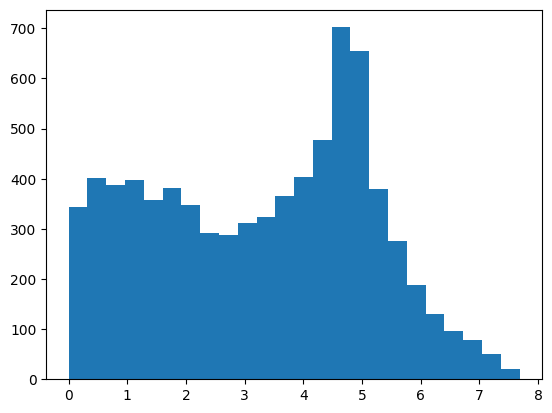

In [60]:
plt.hist(intersection_diffs[intersection_diffs < 100], bins='auto') # Короче, просто используем intersections, координаты важнее
plt.show() 

In [61]:
def shift_index(idx):
    idx = round(idx)
    if idx > 20:
        return idx - 27
    elif idx < -20:
        return idx + 27
    else:
        return idx


In [62]:
def rotate_event_for_decay(coords, main_angle):
    
    # extra_ring = 0
    
    angles = np.arctan2(coords[1], coords[0]) % (2 * np.pi)
    angles = lin_move_to_grid(angles, plane_angles)
    idx_to_shift = (angles - main_angle) / 0.2327
    idx_to_shift = np.array([round(shift_index(idx)) for idx in idx_to_shift])
    # if len(idx_to_shift[np.abs(idx_to_shift) > 5]) > 0:
    #     print(idx_to_shift)
    #     extra_ring = 1
    angle_to_rotate = np.pi / 2 - angles
    x = rotate_point(coords, angle_to_rotate) - 2 * idx_to_shift * norm_r * np.sin(
        np.pi / 27
    )
    return np.column_stack((x, np.zeros_like(x) + 1000, coords[2], coords[3]))


def rotate_events_for_decay(full_coords, main_angles):
    # extra_rings_counter = 0
    for i in range(full_coords.shape[0]):
        event_coords = full_coords[i]
        rotated_event_coords= rotate_event_for_decay(event_coords, main_angles[i])
        # extra_rings_counter += extra_ring
        for j in range(4):
            full_coords[i][j] = rotated_event_coords[:, j]
    # print(extra_rings_counter / full_coords.shape[0])

In [63]:
def find_intersections_for_decay(full_coords):
    intersections = np.zeros((full_coords.shape[0], 3))
    zeros = np.zeros((1, 3))
    for i in range(full_coords.shape[0]):
        event_coords = full_coords[i] / 1000
        pca = PCA(n_components=1)

        # if event_coords[0].shape[0] == 1:
        # print(event_coords)
        event_coords = [[0, arr] for arr in event_coords]
        # print(event_coords)
        pca.fit(np.column_stack(event_coords))
        line_direction = pca.components_[0]
        line_point = pca.mean_

        # Calculate the parameter t for the intersection with the plane y=1000
        p_y = line_point[1]
        d_y = line_direction[1]
        t = (1000 - p_y) / d_y

        # Find the intersection point
        intersection_point = line_point + t * line_direction

        # print(f"Line direction: {line_direction}")
        # print(f"Point on the line: {line_point}")
        # print(f"Intersection point with the plane y=1000: {intersection_point}")
        for j in range(3):
            intersections[i][j] = intersection_point[j]
    return intersections


In [64]:
def rotate_lines_for_decay(full_coords):
    angles = np.zeros(full_coords.shape[0])
    for i in range(full_coords.shape[0]):
        event_coords = full_coords[i]
        rotated_event_coords, angles[i] = rotate_line_for_decay(event_coords)

        for j in range(3):
            full_coords[i][j] = rotated_event_coords[:, j]
    return angles


def rotate_line_for_decay(coords):
    angles = np.arctan2(coords[1], coords[0]) % (2 * np.pi)
    # print(angles)
    try:
        median_angle = angles
    except IndexError:
        print(angles)
        median_angle = np.median(angles)
    median_angle = lin_move_to_grid(np.array([median_angle]), plane_angles)
    # print(angles)
    angle_to_rotate = np.pi / 2 - median_angle
    # print(angle_to_rotate)
    x, y = rotate_point_on_line(coords, angle_to_rotate)
    return np.column_stack((x, y, coords[2])), median_angle


In [65]:
def create_edf_decay(
    filepath="fullsim_optical_2000_pi_bin_1_FARICH_35mm_no_no_trackers.root",
    uncertain_angle=False,
):
    datadir = "data"
    sipm_eff, PDE_wvs = init_sipm_eff()
    for key in sipm_eff.keys():
        sipm_eff[key] = sipm_eff[key] / 0.55414 * 0.38

    x_grid = np.arange(
        -3 * norm_r * np.sin(np.pi / 27),
        3 * norm_r * np.sin(np.pi / 27),
        SIPM_CELL_SIZE,
    )
    z_grid = np.arange(-1400, 1400, SIPM_CELL_SIZE)
    grid = (x_grid, z_grid, PDE_wvs)

    decay_file = uproot.open(os.path.join(datadir, filepath))
    coordinates, true_direction_coordinates, intersections, ids = init_coords_decay(
        decay_file, grid
    )
    
    
    idx_to_drop = []
    for i in range(coordinates.shape[0]):
        if coordinates[i][0].shape[0] == 0:
            idx_to_drop.append(i)

    coordinates = np.delete(coordinates, idx_to_drop, axis=0)
    true_direction_coordinates = np.delete(
        true_direction_coordinates, idx_to_drop, axis=0
    )
    intersections = np.delete(intersections, idx_to_drop, axis=0)
    ids = np.delete(ids, idx_to_drop)
    print(coordinates.shape)
    print(true_direction_coordinates.shape)

    true_direction_coordinates = intersections / np.linalg.norm(intersections, axis=1)[:, None] * np.linalg.norm(true_direction_coordinates, axis=1)[:, None]

    if uncertain_angle:
        uncertainty_introduction_to_direction(true_direction_coordinates)
    
    sipm_sim(coordinates, sipm_eff)

    idx_to_drop = []
    for i in range(coordinates.shape[0]):
        if coordinates[i][0].shape[0] == 0:
            idx_to_drop.append(i)
    coordinates = np.delete(coordinates, idx_to_drop, axis=0)
    true_direction_coordinates = np.delete(
        true_direction_coordinates, idx_to_drop, axis=0
    )
    intersections = np.delete(intersections, idx_to_drop, axis=0)
    ids = np.delete(ids, idx_to_drop)
    print(coordinates.shape)
    print(true_direction_coordinates.shape)

    main_angles = rotate_lines_for_decay(intersections) # Rotates intersection points
    
    intersections = find_intersections_for_decay(intersections)  # May need to rewrite both to treat elements as scalasrs and to change reference point from 0
    
    rotate_events_for_decay(coordinates, main_angles)   # There are events with extra rings somewhere around angle idx 13-16
    move_events_to_grid(coordinates, grid)
    repeat_nums = np.array([coord[0].shape[0] for coord in coordinates])
    edf = pd.DataFrame(coordinates, columns=["x_c", "y_c", "z_c", "wv_c", "t_c"])

    unraveled_data = {col: [] for col in edf.columns}
    row_indices = []

    # Iterate over the DataFrame and unravel the arrays
    for i, row in edf.iterrows():
        max_length = max(len(row[col]) for col in edf.columns)
        for k in range(max_length):
            row_indices.append((i, k))
            for col in edf.columns:
                if k < len(row[col]):
                    unraveled_data[col].append(row[col][k])
                else:
                    unraveled_data[col].append(
                        np.nan
                    )  # Handle cases where arrays are of different lengths

    # Create a new DataFrame from the unraveled data
    unraveled_df = pd.DataFrame(unraveled_data)

    # Create a MultiIndex for the rows
    multi_index = pd.MultiIndex.from_tuples(row_indices, names=["entry", "subentry"])
    unraveled_df.index = multi_index

    edf = unraveled_df

    edf["x_i"] = np.repeat(intersections[:, 0], repeat_nums, axis=0)
    edf["z_i"] = np.repeat(intersections[:, 2], repeat_nums, axis=0)

    x = y = z = x3 = y3 = z3 = unraveled_data = row_indices   = wvs = coordinates = file = coordinates_low = file_low = 0 # = main_angles

    bdf = pd.DataFrame()
    gdf = pd.DataFrame()
    gdf["nhits"] = repeat_nums

    mu_mass = 105.65
    pi_mass = 139.57
    ka_mass = 493.68
    # mass = mu_mass if is_mu else (ka_mass if is_ka else pi_mass)
    mass = np.array([mu_mass if ids[i] == -13 else pi_mass for i in range(ids.shape[0])])
    # edf.drop("y_c", axis=1, inplace=True)
    edf.rename(columns={"y_c": "tmp_c"}, inplace=True)
    edf.drop("wv_c", axis=1, inplace=True)
    edf.rename(columns={"z_c": "y_c", "z_i": "y_i"}, inplace=True)
    edf.rename(columns={"tmp_c": "z_c"}, inplace=True)
    # edf["z_c"] = np.zeros(edf.shape[0]) + 1000  
    # edf["mass"] = np.ones(edf.shape[0]) * mass
    edf["mass"] = np.repeat(
        mass,
        repeat_nums,
        axis=0,
    )
    edf["true_p"] = np.repeat(
        np.linalg.norm(true_direction_coordinates.astype("float"), axis=1) * 1000,
        repeat_nums,
        axis=0,
    )
    edf["beta"] = edf.true_p / np.sqrt(edf.mass**2 + edf.true_p**2)
    edf["x_p"] = np.zeros(edf.shape[0])
    edf["y_p"] = np.zeros(edf.shape[0])
    edf["z_p"] = np.zeros(edf.shape[0])
    edf["nx_p"] = np.repeat(
        (
            intersections
            / np.array(
                [
                    np.linalg.norm(intersections.astype("float"), axis=1)
                    for i in range(3)
                ]
            ).T
        ).astype("float")[:, 0],
        repeat_nums,
        axis=0,
    )
    edf["ny_p"] = np.repeat(
        (
            intersections
            / np.array(
                [
                    np.linalg.norm(intersections.astype("float"), axis=1)
                    for i in range(3)
                ]
            ).T
        ).astype("float")[:, 2],
        repeat_nums,
        axis=0,
    )
    edf["nz_p"] = np.repeat(
        (
            intersections
            / np.array(
                [
                    np.linalg.norm(intersections.astype("float"), axis=1)
                    for i in range(3)
                ]
            ).T
        ).astype("float")[:, 1],
        repeat_nums,
        axis=0,
    )

    true_direction_coordinates = repeat_nums = true_direction_coordinates_low = mass = intersections = 0
    return edf, bdf, gdf, main_angles


In [66]:
edf, bdf, gdf, main_angles_tmp = create_edf_decay('decay_test4.root')

(7655, 5)
(7655, 3)
(7640, 5)
(7640, 3)


In [67]:
edf

x_c     z_c      y_c       t_c         x_i  \
entry subentry                                                      
0     0        -350.719869  1000.0    85.12  0.632352 -111.545794   
      1        -350.719869  1000.0   196.00  0.702153 -111.545794   
      2        -350.719869  1000.0   199.36  0.688897 -111.545794   
      3        -350.719869  1000.0   142.24  0.670929 -111.545794   
      4        -350.719869  1000.0    91.84  0.641945 -111.545794   
...                    ...     ...      ...       ...         ...   
7639  22        109.600131  1000.0 -1124.48  0.667877  108.145078   
      23         49.120131  1000.0 -1164.80  0.771187  108.145078   
      24        196.960131  1000.0 -1232.00  0.963184  108.145078   
      25         35.680131  1000.0 -1188.32  0.853601  108.145078   
      26        196.960131  1000.0 -1245.44  0.990187  108.145078   

                        y_i    mass       true_p      beta  x_p  y_p  z_p  \
entry subentry                                                              
0     0         -414.253842  139.57   870.490958  0.987389  0.0  0.0  0.0   
      1         -414.253842  139.57   870.490958  0.987389  0.0  0.0  0.0   
      2         -414.253842  139.57   870.490958  0.987389  0.0  0.0  0.0   
      3         -414.253842  139.57   870.490958  0.987389  0.0  0.0  0.0   
      4         -414.253842  139.57   870.490958  0.987389  0.0  0.0  0.0   
...                     ...     ...          ...       ...  ...  ...  ...   
7639  22       -1207.625728  139.57  1029.345857  0.990932  0.0  0.0  0.0   
      23       -1207.625728  139.57  1029.345857  0.990932  0.0  0.0  0.0   
      24       -1207.625728  139.57  1029.345857  0.990932  0.0  0.0  0.0   
      25       -1207.625728  139.57  1029.345857  0.990932  0.0  0.0  0.0   
      26       -1207.625728  139.57  1029.345857  0.990932  0.0  0.0  0.0   

                    nx_p      ny_p      nz_p  
entry subentry                                
0     0        -0.102511 -0.380699  0.918999  
      1        -0.102511 -0.380699  0.918999  
      2        -0.102511 -0.380699  0.918999  
      3        -0.102511 -0.380699  0.918999  
      4        -0.102511 -0.380699  0.918999  
...                  ...       ...       ...  
7639  22        0.068810 -0.768385  0.636278  
      23        0.068810 -0.768385  0.636278  
      24        0.068810 -0.768385  0.636278  
      25        0.068810 -0.768385  0.636278  
      26        0.068810 -0.768385  0.636278  

[315620 rows x 15 columns]

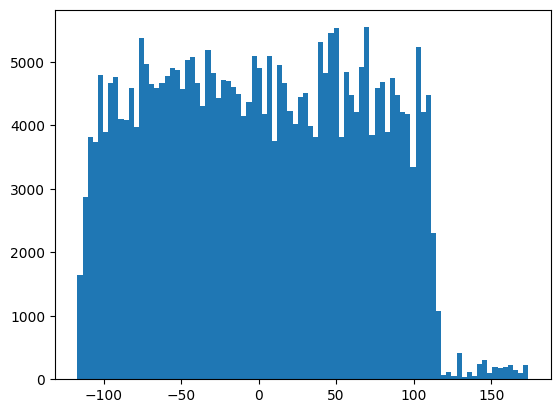

In [68]:
plt.hist(edf.x_i, bins='auto')
plt.show()

In [69]:
np.where(main_angles_tmp > 6.2)

(array([  13,   17,   80,  117,  139,  208,  238,  299,  310,  336,  341,
         375,  399,  450,  502,  568,  604,  622,  720,  726,  739,  755,
         789,  806,  814,  820,  844,  889,  897,  912,  922,  929,  974,
        1052, 1065, 1078, 1123, 1154, 1191, 1203, 1264, 1265, 1299, 1316,
        1392, 1400, 1465, 1490, 1491, 1516, 1603, 1607, 1630, 1680, 1727,
        1853, 1879, 1882, 1913, 2017, 2026, 2045, 2099, 2118, 2148, 2237,
        2244, 2311, 2314, 2362, 2396, 2501, 2514, 2572, 2590, 2619, 2622,
        2669, 2676, 2684, 2691, 2703, 2766, 2798, 2811, 2847, 2865, 2938,
        2981, 3000, 3039, 3049, 3119, 3277, 3283, 3313, 3326, 3376, 3389,
        3415, 3457, 3459, 3484, 3489, 3574, 3590, 3632, 3674, 3692, 3703,
        3707, 3799, 3813, 3863, 3876, 3880, 3890, 3924, 3928, 3936, 3969,
        3970, 3976, 3991, 4009, 4034, 4111, 4153, 4215, 4218, 4220, 4355,
        4420, 4435, 4441, 4463, 4478, 4510, 4530, 4548, 4579, 4599, 4634,
        4692, 4731, 4762, 4814, 4884, 

In [70]:
np.unique(main_angles_tmp).shape

(27,)

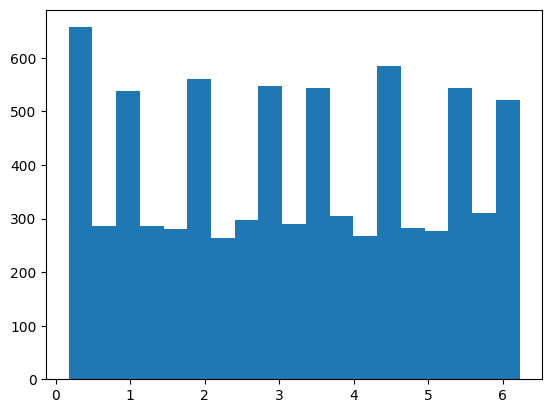

In [71]:
plt.hist(main_angles_tmp, bins='auto')
plt.show()

In [72]:
edf

x_c     z_c      y_c       t_c         x_i  \
entry subentry                                                      
0     0        -350.719869  1000.0    85.12  0.632352 -111.545794   
      1        -350.719869  1000.0   196.00  0.702153 -111.545794   
      2        -350.719869  1000.0   199.36  0.688897 -111.545794   
      3        -350.719869  1000.0   142.24  0.670929 -111.545794   
      4        -350.719869  1000.0    91.84  0.641945 -111.545794   
...                    ...     ...      ...       ...         ...   
7639  22        109.600131  1000.0 -1124.48  0.667877  108.145078   
      23         49.120131  1000.0 -1164.80  0.771187  108.145078   
      24        196.960131  1000.0 -1232.00  0.963184  108.145078   
      25         35.680131  1000.0 -1188.32  0.853601  108.145078   
      26        196.960131  1000.0 -1245.44  0.990187  108.145078   

                        y_i    mass       true_p      beta  x_p  y_p  z_p  \
entry subentry                                                              
0     0         -414.253842  139.57   870.490958  0.987389  0.0  0.0  0.0   
      1         -414.253842  139.57   870.490958  0.987389  0.0  0.0  0.0   
      2         -414.253842  139.57   870.490958  0.987389  0.0  0.0  0.0   
      3         -414.253842  139.57   870.490958  0.987389  0.0  0.0  0.0   
      4         -414.253842  139.57   870.490958  0.987389  0.0  0.0  0.0   
...                     ...     ...          ...       ...  ...  ...  ...   
7639  22       -1207.625728  139.57  1029.345857  0.990932  0.0  0.0  0.0   
      23       -1207.625728  139.57  1029.345857  0.990932  0.0  0.0  0.0   
      24       -1207.625728  139.57  1029.345857  0.990932  0.0  0.0  0.0   
      25       -1207.625728  139.57  1029.345857  0.990932  0.0  0.0  0.0   
      26       -1207.625728  139.57  1029.345857  0.990932  0.0  0.0  0.0   

                    nx_p      ny_p      nz_p  
entry subentry                                
0     0        -0.102511 -0.380699  0.918999  
      1        -0.102511 -0.380699  0.918999  
      2        -0.102511 -0.380699  0.918999  
      3        -0.102511 -0.380699  0.918999  
      4        -0.102511 -0.380699  0.918999  
...                  ...       ...       ...  
7639  22        0.068810 -0.768385  0.636278  
      23        0.068810 -0.768385  0.636278  
      24        0.068810 -0.768385  0.636278  
      25        0.068810 -0.768385  0.636278  
      26        0.068810 -0.768385  0.636278  

[315620 rows x 15 columns]

In [73]:
edf[(edf.x_c<-350.7) | (edf.x_c>348)].x_c.shape[0] / edf.shape[0] * 100 # 4% всех фотонов - диаметрально противоположные кольца, так же в 4% событий есть лишнее кольцо

4.132817945630822

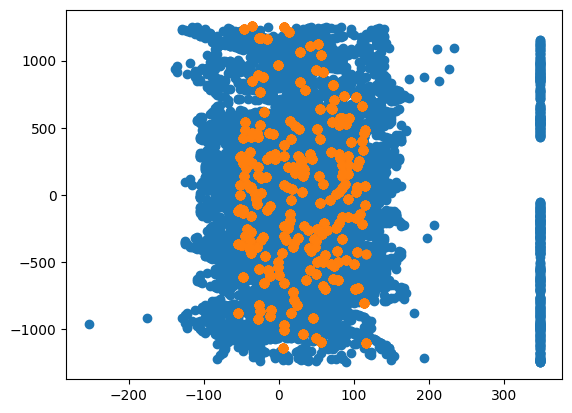

In [74]:
ev = np.where(main_angles_tmp > 6.2)[0]

plt.scatter(edf.loc[ev]["x_c"], edf.loc[ev]["y_c"])
plt.scatter(edf.loc[ev]["x_i"], edf.loc[ev]["y_i"])
plt.show()

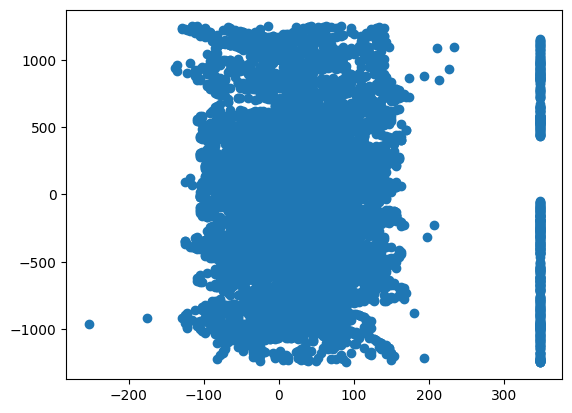

In [75]:
plt.scatter(edf.loc[ev]["x_c"], edf.loc[ev]["y_c"])
# plt.scatter(edf.loc[ev]["x_i"], edf.loc[ev]["z_i"])
plt.show()

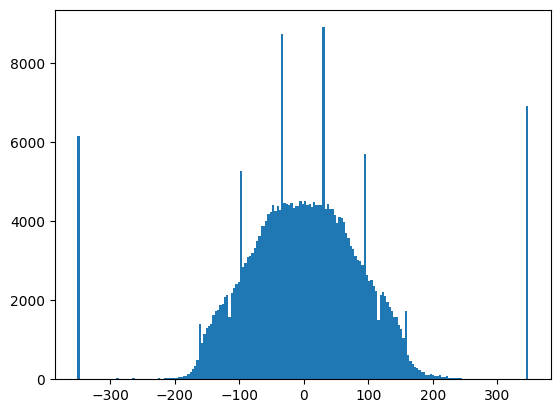

In [76]:
plt.hist(edf.x_c, bins='auto')
plt.show()

In [77]:
(np.arctan2(true_direction_coordinates[0][1], true_direction_coordinates[0][0]))

1.9148288

In [78]:
true_direction_coordinates[0][1]

0.7580755

In [79]:
true_direction_coordinates

array([[-0.27160358,  0.7580755 , -0.33061704],
       [-0.97814745,  0.08928762, -0.19926164],
       [ 0.04104966,  0.7146845 ,  0.6336496 ],
       ...,
       [ 0.70617884,  0.5090488 , -0.08352584],
       [-0.33469793,  0.7423211 , -0.50236356],
       [ 0.22010581,  0.6212077 , -0.79070055]], dtype=float32)

In [80]:
np.linalg.norm(true_direction_coordinates, axis=1) * 1000

array([ 870.49097, 1002.22253,  956.0182 , ...,  874.526  ,  956.78235,
       1029.3458 ], dtype=float32)

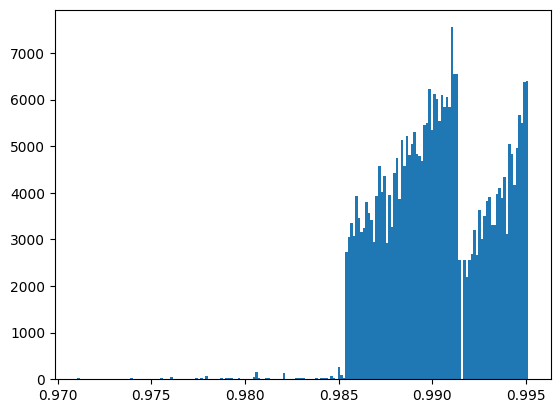

In [81]:
plt.hist(edf[edf.beta>0.97].beta, bins='auto')
plt.show()

In [82]:
edf[edf.beta<.98].shape[0] / edf.shape[0] * 100  # 0.3% событий со странной бетой 

0.14606171978962043

In [83]:
edf[edf.beta<.97]

x_c     z_c     y_c       t_c        x_i         y_i  \
entry subentry                                                                
2477  0         348.160131  1000.0 -734.72  0.913692  62.344374  480.850213   
      1         348.160131  1000.0 -580.16  0.601048  62.344374  480.850213   
      2         348.160131  1000.0 -576.80  0.583804  62.344374  480.850213   
      3         348.160131  1000.0 -728.00  0.910229  62.344374  480.850213   
      4         348.160131  1000.0 -593.60  0.626702  62.344374  480.850213   
      5         348.160131  1000.0 -684.32  0.832989  62.344374  480.850213   
      6         348.160131  1000.0 -711.20  0.851629  62.344374  480.850213   
      7         348.160131  1000.0 -647.36  0.685263  62.344374  480.850213   
      8         348.160131  1000.0 -694.40  0.812043  62.344374  480.850213   
      9         348.160131  1000.0 -721.28  0.838662  62.344374  480.850213   
      10        348.160131  1000.0 -697.76  0.823787  62.344374  480.850213   
      11        348.160131  1000.0 -748.16  0.921981  62.344374  480.850213   
      12        348.160131  1000.0 -660.80  0.759081  62.344374  480.850213   
      13        348.160131  1000.0 -630.56  0.711312  62.344374  480.850213   
      14        348.160131  1000.0 -590.24  0.622974  62.344374  480.850213   
      15        348.160131  1000.0 -654.08  0.729578  62.344374  480.850213   
      16        348.160131  1000.0 -640.64  0.711144  62.344374  480.850213   
      17        348.160131  1000.0 -754.88  0.960637  62.344374  480.850213   
      18        348.160131  1000.0 -610.40  0.655296  62.344374  480.850213   
      19        348.160131  1000.0 -613.76  0.646617  62.344374  480.850213   
      20        348.160131  1000.0 -687.68  0.771368  62.344374  480.850213   
      21        348.160131  1000.0 -617.12  0.622605  62.344374  480.850213   
      22        348.160131  1000.0 -707.84  0.826598  62.344374  480.850213   
      23        348.160131  1000.0 -758.24  0.915295  62.344374  480.850213   
      24        348.160131  1000.0 -761.60  0.948336  62.344374  480.850213   
      25        348.160131  1000.0 -717.92  0.834603  62.344374  480.850213   
      26        348.160131  1000.0 -744.80  0.903675  62.344374  480.850213   
      27        348.160131  1000.0 -586.88  0.564460  62.344374  480.850213   
      28         42.400131  1000.0  478.24  0.708673  62.344374  480.850213   
      29         82.720131  1000.0  484.96  0.719377  62.344374  480.850213   
      30         65.920131  1000.0  515.20  0.726097  62.344374  480.850213   
      31         59.200131  1000.0  458.08  0.645164  62.344374  480.850213   
      32         89.440131  1000.0  474.88  0.634873  62.344374  480.850213   
      33         59.200131  1000.0  454.72  0.598500  62.344374  480.850213   
      34         45.760131  1000.0  511.84  0.703378  62.344374  480.850213   
      35         49.120131  1000.0  458.08  0.607129  62.344374  480.850213   
      36         69.280131  1000.0  454.72  0.603028  62.344374  480.850213   
      37         86.080131  1000.0  461.44  0.600579  62.344374  480.850213   
      38         32.320131  1000.0  481.60  0.627142  62.344374  480.850213   
      39         42.400131  1000.0  458.08  0.568937  62.344374  480.850213   
      40         49.120131  1000.0  518.56  0.661886  62.344374  480.850213   
      41         86.080131  1000.0  515.20  0.671134  62.344374  480.850213   
6262  0         -51.679869  1000.0  390.88  0.613851 -33.785464  402.594078   
      1         -11.359869  1000.0  394.24  0.610155 -33.785464  402.594078   
      2         -58.399869  1000.0  417.76  0.634030 -33.785464  402.594078   
      3         -58.399869  1000.0  407.68  0.648911 -33.785464  402.594078   

                  mass      true_p      beta  x_p  y_p  z_p      nx_p  \
entry subentry                                                          
2477  0         139.57  508.504705  0.964336  0.0  0.0  0.0  0.056098   
      1    

In [84]:
def enforce_float32(df):
    return df.astype({col: np.float32 for col in df.select_dtypes(include=['float64']).columns})

In [85]:
idf = pd.DataFrame()
idf['W'] = [35.]
# idf['W'] = [40.]

idf['zdis'] = [800.]
idf['distance'] = [205.]  # 200
idf['n_mean'] = [1.04511]
# 
# idf['n_mean'] = [1.0502]

idf['pixel_size'] = [3.16]
mu_mass = 105.65
pi_mass = 139.57
ka_mass = 493.68

In [86]:
mu_pi_ka = True
if mu_pi_ka:
    edf_mu, bdf_mu, gdf_mu = create_edf('fullsim_3particles_2000_mu_bin_1_FARICH_35mm_no_no_trackers.root', sample_num=None, num_of_files=10,
                               uncertain_angle=False, is_mu=True, is_ka=False)
    edf_pi, bdf_pi, gdf_pi = create_edf('fullsim_3particles_2000_pi_bin_1_FARICH_35mm_no_no_trackers.root', sample_num=None, num_of_files=10,
                               uncertain_angle=False, is_mu=False, is_ka=False)
    edf_ka, bdf_ka, gdf_ka = create_edf('fullsim_3particles_2000_ka_bin_1_FARICH_35mm_no_no_trackers.root', sample_num=None, num_of_files=10,
                                    uncertain_angle=False, is_mu=False, is_ka=True)
    
    shift_ind = np.array(edf_mu.index.get_level_values(0))[-1] + 1
    new_index = edf_pi.index.map(lambda idx: (idx[0] + shift_ind, idx[1]))
    edf_pi.index = pd.MultiIndex.from_tuples(new_index, names=edf_mu.index.names)
    gdf_pi.index = np.array(gdf_pi.index) + np.array(gdf_mu.index)[-1] + 1

    shift_ind = np.array(edf_pi.index.get_level_values(0))[-1] + 1
    new_index = edf_ka.index.map(lambda idx: (idx[0] + shift_ind, idx[1]))
    edf_ka.index = pd.MultiIndex.from_tuples(new_index, names=edf_pi.index.names)
    gdf_ka.index = np.array(gdf_ka.index) + np.array(gdf_pi.index)[-1] + 1


    edf_conc = pd.concat([edf_mu, edf_pi, edf_ka])
    gdf_conc = pd.concat([gdf_mu, gdf_pi, gdf_ka])
    
    edf_mu = gdf_mu = edf_ka = gdf_ka = edf_pi = gdf_pi = 0
    edf_conc = enforce_float32(edf_conc)

(20000, 5)
(20000, 3)
(20000, 5)
(20000, 3)
(19993, 5)
(19993, 3)
(19883, 5)
(19883, 3)
(19986, 5)
(19986, 3)
(19863, 5)
(19863, 3)


In [87]:
avg_sigmas = (4, 5)
avg_t_sigmas = (4, 5)
num_of_groups = 10
what_to_group = 'beta'
r_width = float(idf.pixel_size.iloc[0]) * 2
t_width = 0.25
t_step = 0.25
r_factor = 2 # not to change
t_factor = int(t_width / t_step)
weighed = True
deg_lim = False
param_fit = False
useuse_decision_tree = True


calibration_func = pol # pol
param_calibration_func = pol2_pol2 # d3pol2
p0 = (0.9, -5, 340) # (.95, 0, 300) #(.01, 1e-3, 1e-4)
p0_c =  (1.219, -0.5588, 0.2946, 864.4, -1922, 1055, -2535, 6572, -3751)
num_of_calibration_params = 3 # 3
num_of_param_fit_params = 3 # for param fit both prev and this number are important, cal_func as well, therefore p0 and p0_C
target_variable = 'beta'
target_angle = 'theta_p'
num_of_theta_intervals = 11 # 11


# sample_size = 12
cal_arr = False
errs = False

beta_sigms = []
beta_sigms_yerr = []
beta_sigms_deglim = []
beta_sigms_yerr_deglim = []


r_bins = np.arange(16, 80, step=3.3)
r_bins = np.array([[r_bins[i], r_bins[i + 2]] for i in range(len(r_bins) - 2)])
t_bins = np.arange(0, 7, step=0.25)
t_bins = np.array([[t_bins[i], t_bins[i + 1]] for i in range(len(t_bins) - 1)])

background_means_dict = {'1e6': 0.012, '1e5': 0.0015}
background_stds_dict = {'1e6': 0.0175, '1e5': 0.0055}

background_mean = background_means_dict['1e5']
background_std = background_stds_dict['1e5']

batch_size = 10000
num_of_classes = 4

In [88]:
dcr = '0'
print(dcr)
timer_start = perf_counter()
edf_d = edf_conc.copy()
gdf_d = gdf_conc.copy()
bdf_d = pd.DataFrame()
edf_d = addNoise(idf, edf_d, gdf_d, (0, 7), float(dcr))
edf_d = applySpaceCut(edf_d)
planeRecalculation(edf_d, idf)
planeRotation(edf_d)
edf_d = applySecondSpaceCut(edf_d)
edf_to_bdf(edf_d.mass, bdf_d)
edf_to_bdf(edf_d.true_p, bdf_d)
bdf_d.rename(columns={'true_p': 'momentum'}, inplace=True)
edf_to_bdf(edf_d.beta, bdf_d)
recoAngles(edf_d, idf)
primaryDirectionRecalculation(edf_d)

recoAngles(edf_d, idf, rotation_mode=True)

calculateSignalCounts(edf_d, bdf_d)

cal_arr, errs = rSlidingWindow(edf_d, idf, bdf_d, avg_sigmas=avg_sigmas, avg_t_sigmas=avg_t_sigmas, cal_arr=cal_arr, errs=errs, num_of_groups=num_of_groups,
                           step=r_width, t_window_width=t_width, r_width_factor=r_factor, t_width_factor=t_factor, weighed=weighed, deg_lim=deg_lim, param_fit=param_fit,
                           calibration_func=calibration_func, param_calibration_func=param_calibration_func, num_of_calibration_params=num_of_calibration_params, num_of_param_fit_params=num_of_param_fit_params,
                           target_variable=target_variable, target_angle=target_angle, num_of_theta_intervals=num_of_theta_intervals, p0=p0, p0_c=p0_c, what_to_group=what_to_group, use_decision_tree=useuse_decision_tree)
    
print('Time elapsed on current DCR: ', round(perf_counter() - timer_start))

0
    Generate noise with DCR per mm^2 0.0, mean number of hits per event: 0.00.
Time elapsed on current DCR:  62


In [89]:
edf_d

x_c         y_c       t_c        x_i         y_i  \
entry subentry                                                            
0     0          96.160133  132.160004  1.778711  71.595406  102.891594   
      1          62.560131  142.240005  1.796388  71.595406  102.891594   
      2          96.160133   71.680000  1.783940  71.595406  102.891594   
      3          86.080132  138.880005  1.778984  71.595406  102.891594   
      4          79.360130  142.240005  1.786393  71.595406  102.891594   
...                    ...         ...       ...        ...         ...   
59745 40        139.840134  703.359985  0.950136  75.526848  667.784546   
      41        129.760132  639.520020  0.951611  75.526848  667.784546   
      42        143.200134  683.200012  0.954774  75.526848  667.784546   
      43         42.400131  753.760010  0.958817  75.526848  667.784546   
      44         15.520130  669.760010  0.958200  75.526848  667.784546   

                   z_c        mass       true_p      beta  x_p  ...  \
entry subentry                                                  ...   
0     0         1000.0  105.650002   525.437012  0.980378  0.0  ...   
      1         1000.0  105.650002   525.437012  0.980378  0.0  ...   
      2         1000.0  105.650002   525.437012  0.980378  0.0  ...   
      3         1000.0  105.650002   525.437012  0.980378  0.0  ...   
      4         1000.0  105.650002   525.437012  0.980378  0.0  ...   
...                ...         ...          ...       ...  ...  ...   
59745 40        1000.0  493.679993  3635.296875  0.990905  0.0  ...   
      41        1000.0  493.679993  3635.296875  0.990905  0.0  ...   
      42        1000.0  493.679993  3635.296875  0.990905  0.0  ...   
      43        1000.0  493.679993  3635.296875  0.990905  0.0  ...   
      44        1000.0  493.679993  3635.296875  0.990905  0.0  ...   

                recalculated_nx_p  recalculated_ny_p  recalculated_nz_p  \
entry subentry                                                            
0     0                         0                  0                  1   
      1                         0                  0                  1   
      2                         0                  0                  1   
      3                         0                  0                  1   
      4                         0                  0                  1   
...                           ...                ...                ...   
59745 40                        0                  0                  1   
      41                        0                  0                  1   
      42                        0                  0                  1   
      43                        0                  0                  1   
      44                        0                  0                  1   

                 theta_p  rotated_r_c  rotated_phi_c  signal_counts  \
entry subentry                                                        
0     0         0.124085    37.558114      -2.268277             34   
      1         0.124085    39.903786      -1.352561             34   
      2         0.124085    39.811904       2.254723             34   
      3         0.124085    38.127622      -1.955316             34   
      4         0.124085    39.424411      -1.768969             34   
...                  ...          ...            ...            ...   
59745 40        0.589408    63.636972      -2.686892             45   
      41        0.589408    62.064183       2.763743             45   
      42        0.589408    64.748838      -2.932500             45   
      43        0.589408    67.908461      -1.141350             45   
      44        0.589408    60.079149      -0.092660             45   

                param_group  slice_counts_4_sigms  \
entry subentry                                      
0     0                 5.0              0.000000   
      1                 5.0              0.000000   
      2    

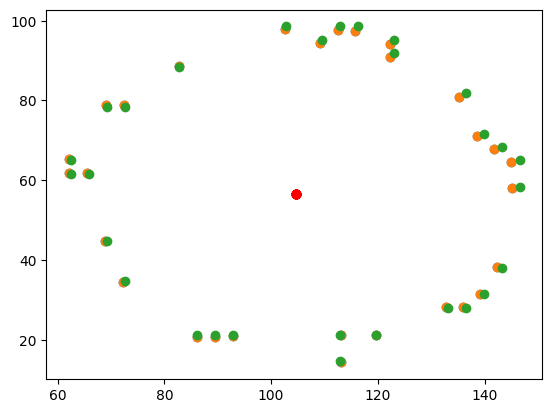

In [90]:
ev = 3
plt.scatter(edf_d.loc[ev].recalculated_x, edf_d.loc[ev].recalculated_y)
plt.scatter(edf_d[edf_d.signal == True].loc[ev].recalculated_x, edf_d[edf_d.signal == True].loc[ev].recalculated_y)
plt.scatter(edf_d[edf_d.signal == True].loc[ev].x_c, edf_d[edf_d.signal == True].loc[ev].y_c)
plt.scatter(edf_d.loc[ev].x_i, edf_d.loc[ev].y_i, c='r')
plt.show()

In [91]:
for dcr in  ['1e5'] : # ['0', '1e3', '1e4', '1e5', '1e6']
    print(dcr)
    timer_start = perf_counter()

    sample_idx = np.random.permutation(gdf_conc.index.shape[0])
    
    max_iter = int(np.ceil(sample_idx.shape[0] / batch_size))
    
    
    for sample in range(max_iter):
        sample_timer = perf_counter()
        if sample == max_iter - 1:
            sample_ind = sample_idx[batch_size * sample :]
            batch_size = sample_idx.shape[0] - batch_size * sample
        else:
            sample_ind = sample_idx[batch_size * sample : batch_size * (sample + 1)]
            
        edf_d = edf_conc.loc[sample_ind]
        gdf_d = gdf_conc.loc[sample_ind]
    
        index_map = dict(zip(np.array(gdf_d.index), np.linspace(0, batch_size - 1, batch_size, dtype=np.int16)))
        new_new_index = edf_d.index.map(lambda idx: (index_map[idx[0]], idx[1]))
        edf_d.index = pd.MultiIndex.from_tuples(new_new_index, names=edf_d.index.names)
        gdf_d.index = np.linspace(0, batch_size - 1, batch_size, dtype=np.int16)
    
    
        bdf_d = pd.DataFrame()
        edf_d = addNoise(idf, edf_d, gdf_d, (0, 7), float(dcr))
        edf_d = enforce_float32(edf_d)

        sample_ind_2 = np.random.choice(gdf_d.index, size=int(np.ceil(batch_size / num_of_classes)), replace=False)
        edf_slice = edf_d.loc[(sample_ind_2)]
        edf_d.loc[sample_ind_2] = edf_slice[edf_slice.signal == False] 
    
    
        edf_d = applySpaceCut(edf_d)
        planeRecalculation(edf_d, idf)
        planeRotation(edf_d)
        edf_d = applySecondSpaceCut(edf_d)
        edf_to_bdf(edf_d.mass, bdf_d)
        edf_to_bdf(edf_d.true_p, bdf_d)
        bdf_d.rename(columns={'true_p': 'momentum'}, inplace=True)
        edf_to_bdf(edf_d.beta, bdf_d)
        recoAngles(edf_d, idf)
        primaryDirectionRecalculation(edf_d)
        
        recoAngles(edf_d, idf, rotation_mode=True)
        
        calculateSignalCounts(edf_d, bdf_d)
        edf_d = enforce_float32(edf_d)
        cal_arr, errs = rSlidingWindow(edf_d, idf, bdf_d, avg_sigmas=avg_sigmas, avg_t_sigmas=avg_t_sigmas, cal_arr=cal_arr, errs=errs, num_of_groups=num_of_groups,
                                   step=r_width, t_window_width=t_width, r_width_factor=r_factor, t_width_factor=t_factor, weighed=weighed, deg_lim=deg_lim, param_fit=param_fit,
                                   calibration_func=calibration_func, param_calibration_func=param_calibration_func, num_of_calibration_params=num_of_calibration_params, num_of_param_fit_params=num_of_param_fit_params,
                                   target_variable=target_variable, target_angle=target_angle, num_of_theta_intervals=num_of_theta_intervals, p0=p0, p0_c=p0_c, what_to_group=what_to_group, use_decision_tree=useuse_decision_tree)
        edf_d = enforce_float32(edf_d)
        dists_from_mean_edf = []
        for entry, event in edf_d.groupby(level=0):
            data = np.array(event[['rotated_r_c', 't_c']])
            in_x_bins = (data[:, 0][:, None] >= r_bins[:, 0]) & (data[:, 0][:, None] < r_bins[:, 1])
            in_y_bins = (data[:, 1][:, None] >= t_bins[:, 0]) & (data[:, 1][:, None] < t_bins[:, 1])
            
            # Compute 2D histogram by combining x and y conditions
            hist = np.dot(in_x_bins.T.astype(int), in_y_bins.astype(int))  # Shape: (len(x_bins), len(y_bins))
            r_bin_centers = r_bins.mean(axis=1)
            hist = hist / r_bin_centers[:, None]
            
            max_signal = np.max(hist)
            
            dists_from_mean_edf.append((max_signal - background_mean) / background_std)
        
        bdf_d['distance'] = dists_from_mean_edf
        
        if sample == 0:
            c_bdf_d = bdf_d
        else:
            c_bdf_d = pd.concat([c_bdf_d, bdf_d], ignore_index=True)
        print('    Time elapsed on current sample: ', round(perf_counter() - sample_timer))
    print('Time elapsed on current DCR: ', round(perf_counter() - timer_start))
bdf_d = c_bdf_d

1e5
    Generate noise with DCR per mm^2 100000.0, mean number of hits per event: 175.00.
    Time elapsed on current sample:  56
    Generate noise with DCR per mm^2 100000.0, mean number of hits per event: 175.00.
    Time elapsed on current sample:  58
    Generate noise with DCR per mm^2 100000.0, mean number of hits per event: 175.00.
    Time elapsed on current sample:  60
    Generate noise with DCR per mm^2 100000.0, mean number of hits per event: 175.00.
    Time elapsed on current sample:  59
    Generate noise with DCR per mm^2 100000.0, mean number of hits per event: 175.00.
    Time elapsed on current sample:  58
    Generate noise with DCR per mm^2 100000.0, mean number of hits per event: 175.00.
    Time elapsed on current sample:  56
Time elapsed on current DCR:  346


In [92]:
Ы

NameError: name 'Ы' is not defined

In [93]:
bdf_d['mass'].fillna(0, inplace=True)

In [94]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb

# Assuming `bdf_d` is your pandas DataFrame
# Step 1: Extract features and target
X = bdf_d[['momentum', 'unfixed_calculated_r_2d_4_rsigms_4_tsigms', 'theta_p', 'distance']]
y = bdf_d['mass']

# Step 2: Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # mass: [139.57 -> 0, 105.65 -> 1]

# Step 3: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Step 4: Initialize and train XGBoost classifier
model = xgb.XGBClassifier(
    objective='binary:logistic',  # For binary classification
    eval_metric='logloss',       # Log loss is a common evaluation metric for binary classification
    use_label_encoder=False      # Avoid warnings about label encoding
)
model.fit(X_train, y_train)

# Step 5: Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Optional: Map back predictions to mass values if needed
y_pred_mass = label_encoder.inverse_transform(y_pred)

X_test['mass'] = label_encoder.inverse_transform(y_test)
X_test['mass_reco'] = y_pred_mass

Accuracy: 0.9538075313807531
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      2994
           1       0.94      0.94      0.94      3069
           2       0.93      0.92      0.92      2907
           3       0.99      0.97      0.98      2980

    accuracy                           0.95     11950
   macro avg       0.95      0.95      0.95     11950
weighted avg       0.95      0.95      0.95     11950



In [95]:
X_test[['bckg_proba', 'mu_proba', 'pi_proba', 'ka_proba']] = model.predict_proba(X_test[['momentum', 'unfixed_calculated_r_2d_4_rsigms_4_tsigms', 'theta_p', 'distance']])
bdf_d[['bckg_proba', 'mu_proba', 'pi_proba', 'ka_proba']] = model.predict_proba(bdf_d[['momentum', 'unfixed_calculated_r_2d_4_rsigms_4_tsigms', 'theta_p', 'distance']])
bdf_d['mass_reco'] = label_encoder.inverse_transform(model.predict(X))

In [96]:
X_test['beta'] = beta_from_momentum(X_test['momentum'], X_test['mass'])

In [97]:
bdf_d

,mass,momentum,beta,signal_counts,param_group,theta_p,cos_theta_p,unfixed_calculated_r_2d_4_rsigms_4_tsigms,beta_from_calc_r_4_rsigms_4_tsigms,delta_beta_4_rsigms_4_tsigms,eps_beta_4_rsigms_4_tsigms,distance,bckg_proba,mu_proba,pi_proba,ka_proba,mass_reco
0,493.679993,3510.782471,0.990258,47,8.0,0.540439,0.857483,56.317509,0.990616,0.000358,0.036187,104.681741,1.725716e-07,2.451227e-05,0.000377,9.995987e-01,493.679993
1,493.679993,2198.197998,0.975697,33,4.0,0.779181,0.711489,47.445009,0.974292,-0.001404,-0.143939,40.543599,2.923452e-07,1.089992e-06,0.000007,9.999918e-01,493.679993
2,493.679993,2210.697754,0.975961,24,4.0,0.711250,0.757546,46.514018,0.975008,-0.000953,-0.097674,31.555401,1.820108e-06,1.756985e-05,0.000091,9.998896e-01,493.679993
3,105.650002,1495.437378,0.997514,44,10.0,0.124898,0.992210,51.993068,0.997523,0.000009,0.000884,143.612165,4.360371e-06,9.654860e-01,0.034504,5.243895e-06,105.650002
4,105.650002,643.074402,0.986772,29,7.0,0.508661,0.873398,51.162939,0.986319,-0.000453,-0.045913,58.826873,4.771434e-07,9.982912e-01,0.001706,1.973102e-06,105.650002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59741,493.679993,2032.821533,0.971754,20,3.0,0.131379,0.991382,29.738981,0.970891,-0.000863,-0.088853,78.048951,1.083330e-06,1.321811e-06,0.000029,9.999685e-01,493.679993
59742,105.650002,1229.733887,0.996330,34,10.0,0.622647,0.812338,63.010760,0.994035,-0.002295,-0.230317,58.020125,2.229972e-05,4.171038e-01,0.582848,2.600965e-05,139.570007
59743,493.679993,2225.698242,0.976272,30,4.0,0.516101,0.869750,43.415963,0.978005,0.001733,0.177494,63.383529,4.456013e-07,3.787839e-08,0.000006,9.999934e-01,493.679993
59744,0.000000,712.065247,0.981327,0,5.0,0.099206,0.995083,45.626220,0.988974,0.007648,0.779303,7.148423,9.983766e-01,2.972789e-04,0.001323,2.639999e-06,0.000000


In [98]:
X_test = bdf_d

In [99]:
probs = np.linspace(0.01, 0.99, 100)
spec_ids = [20, 40, 60, 80, 90]
mu_id_eff = np.array([X_test[(X_test.mu_proba > prob) & (X_test.mass == mu_mass)].shape[0] / X_test[(X_test.mass == mu_mass)].shape[0] for prob in
             probs])
pi_as_mu_misid = np.array([X_test[(X_test.mu_proba > prob) & (X_test.mass == pi_mass)].shape[0] / X_test[(X_test.mass == pi_mass)].shape[0] for prob in
                  probs])

pi_id_eff = np.array([X_test[(X_test.pi_proba > prob) & (X_test.mass == pi_mass)].shape[0] / X_test[(X_test.mass == pi_mass)].shape[0] for prob in
             probs])
mu_as_pi_misid = np.array([X_test[(X_test.pi_proba > prob) & (X_test.mass == mu_mass)].shape[0] / X_test[(X_test.mass == mu_mass)].shape[0] for prob in
                  probs])

ka_id_eff = np.array([X_test[(X_test.ka_proba > prob) & (X_test.mass == ka_mass)].shape[0] / X_test[(X_test.mass == ka_mass)].shape[0] for prob in
             probs])
pi_as_ka_misid = np.array([X_test[(X_test.ka_proba > prob) & (X_test.mass == pi_mass)].shape[0] / X_test[(X_test.mass == pi_mass)].shape[0] for prob in
                  probs])

ka_as_pi_misid = np.array([X_test[(X_test.pi_proba > prob) & (X_test.mass == ka_mass)].shape[0] / X_test[(X_test.mass == ka_mass)].shape[0] for prob in
                  probs])
# plt.scatter(pi_as_mu_misid, mu_id_eff, s=4)
# plt.plot(pi_as_mu_misid, mu_id_eff)
# plt.xlabel(r'$\pi$-as-$\mu$ misID rate')
# plt.ylabel(r'$\mu$-ID efficiency')
# plt.show()

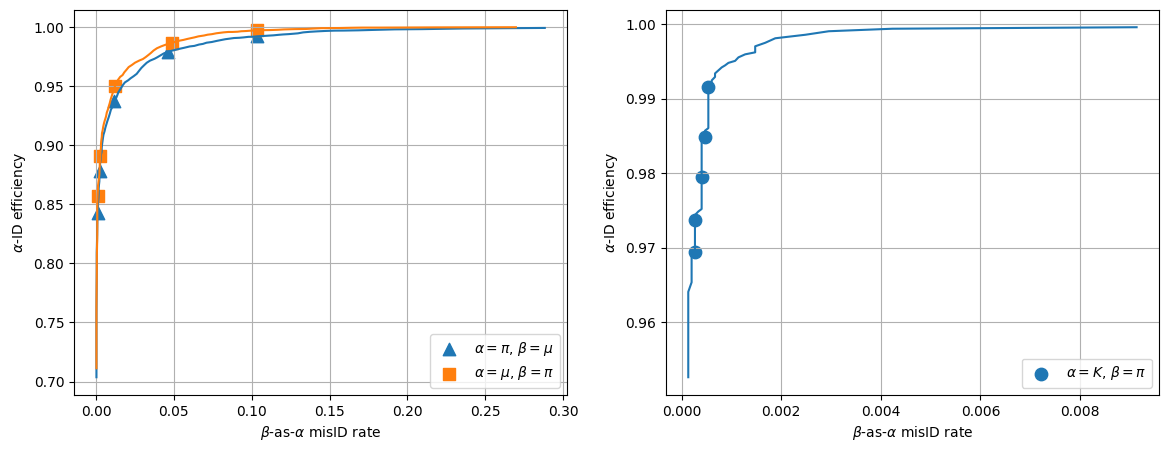

In [100]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.scatter(mu_as_pi_misid[spec_ids], pi_id_eff[spec_ids], s=80, marker='^', label=r'$\alpha=\pi$, $\beta=\mu$')
plt.plot(mu_as_pi_misid, pi_id_eff)
plt.scatter(pi_as_mu_misid[spec_ids], mu_id_eff[spec_ids], s=80, marker='s', label=r'$\alpha=\mu$, $\beta=\pi$')
plt.plot(pi_as_mu_misid, mu_id_eff)
plt.xlabel(r'$\beta$-as-$\alpha$ misID rate')
plt.ylabel(r'$\alpha$-ID efficiency')
plt.grid()
plt.legend()
plt.subplot(1, 2, 2)
plt.scatter(pi_as_ka_misid[spec_ids], ka_id_eff[spec_ids], s=80, label=r'$\alpha=K$, $\beta=\pi$')
plt.plot(pi_as_ka_misid, ka_id_eff)
# plt.scatter(ka_as_pi_misid[spec_ids], pi_id_eff[spec_ids], s=40, label=r'$\alpha=\pi$, $\beta=K$')
# plt.plot(ka_as_pi_misid, pi_id_eff)
plt.xlabel(r'$\beta$-as-$\alpha$ misID rate')
plt.ylabel(r'$\alpha$-ID efficiency')
plt.grid()
plt.legend()
plt.show()

In [101]:
# Фиксируем порог вероятности
prob = 0.8

# Задаем количество бинов и вычисляем границы по X_test.momentum
n_bins = 20
momentum_min = X_test['momentum'].min()
momentum_max = X_test['momentum'].max()
bins = np.linspace(momentum_min, momentum_max, n_bins + 1)
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# Инициализируем списки для хранения результатов
mu_id_eff_bins = []
pi_as_mu_misid_bins = []
pi_id_eff_bins = []
mu_as_pi_misid_bins = []
ka_id_eff_bins = []
pi_as_ka_misid_bins = []
ka_as_pi_misid_bins = []

# Перебираем по каждому интервалу импульса
for i in range(n_bins):
    low = bins[i]
    high = bins[i+1]
    
    # Маска для текущего диапазона импульса
    bin_mask = (X_test['momentum'] >= low) & (X_test['momentum'] < high)
    
    # Эффективность идентификации мюонов (правильное распознавание)
    total_mu = X_test[bin_mask & (X_test['mass'] == mu_mass)]
    # События, где реконструированная масса равна истинной массе мюона
    selected_mu = total_mu[total_mu['mass_reco'] == mu_mass]
    mu_eff = selected_mu.shape[0] / total_mu.shape[0] if total_mu.shape[0] > 0 else np.nan
    mu_id_eff_bins.append(mu_eff)
    
    # misID пионов как мюоны
    total_pi_for_mu = X_test[bin_mask & (X_test['mass'] == pi_mass)]
    # Если пион ошибочно распознан как мюон: mass_reco равна mu_mass
    selected_mu_as_pi = total_pi_for_mu[total_pi_for_mu['mass_reco'] == mu_mass]
    pi_as_mu_eff = selected_mu_as_pi.shape[0] / total_pi_for_mu.shape[0] if total_pi_for_mu.shape[0] > 0 else np.nan
    pi_as_mu_misid_bins.append(pi_as_mu_eff)
    
    # Эффективность идентификации пионов
    total_pi = X_test[bin_mask & (X_test['mass'] == pi_mass)]
    # Правильное распознавание: mass_reco равна pi_mass
    selected_pi = total_pi[total_pi['mass_reco'] == pi_mass]
    print(f'{selected_pi.shape[0]} {total_pi.shape[0]}')
    pi_eff = selected_pi.shape[0] / total_pi.shape[0] if total_pi.shape[0] > 0 else np.nan
    pi_id_eff_bins.append(pi_eff)
    
    # misID мюонов как пионы
    total_mu_for_pi = X_test[bin_mask & (X_test['mass'] == mu_mass)]
    # Если мюон ошибочно распознан как пион: mass_reco равна pi_mass
    selected_pi_as_mu = total_mu_for_pi[total_mu_for_pi['mass_reco'] == pi_mass]
    mu_as_pi_eff = selected_pi_as_mu.shape[0] / total_mu_for_pi.shape[0] if total_mu_for_pi.shape[0] > 0 else np.nan
    mu_as_pi_misid_bins.append(mu_as_pi_eff)
    
    # Эффективность идентификации каонов
    total_ka = X_test[bin_mask & (X_test['mass'] == ka_mass)]
    # Правильное распознавание: mass_reco равна ka_mass
    selected_ka = total_ka[total_ka['mass_reco'] == ka_mass]
    ka_eff = selected_ka.shape[0] / total_ka.shape[0] if total_ka.shape[0] > 0 else np.nan
    ka_id_eff_bins.append(ka_eff)
    
    # misID пионов как каоны
    total_pi_for_ka = X_test[bin_mask & (X_test['mass'] == pi_mass)]
    # Если пион ошибочно распознан как каон: mass_reco равна ka_mass
    selected_ka_as_pi = total_pi_for_ka[total_pi_for_ka['mass_reco'] == ka_mass]
    pi_as_ka_eff = selected_ka_as_pi.shape[0] / total_pi_for_ka.shape[0] if total_pi_for_ka.shape[0] > 0 else np.nan
    pi_as_ka_misid_bins.append(pi_as_ka_eff)
    
    # misID каонов как пионы
    total_pi_for_ka2 = X_test[bin_mask & (X_test['mass'] == ka_mass)]
    # Если каон ошибочно распознан как пион: mass_reco равна pi_mass
    selected_pi_as_ka = total_pi_for_ka2[total_pi_for_ka2['mass_reco'] == pi_mass]
    ka_as_pi_eff = selected_pi_as_ka.shape[0] / total_pi_for_ka2.shape[0] if total_pi_for_ka2.shape[0] > 0 else np.nan
    ka_as_pi_misid_bins.append(ka_as_pi_eff)


# Преобразуем списки в массивы numpy (если требуется)
mu_id_eff_bins = np.array(mu_id_eff_bins)
pi_as_mu_misid_bins = np.array(pi_as_mu_misid_bins)
pi_id_eff_bins = np.array(pi_id_eff_bins)
mu_as_pi_misid_bins = np.array(mu_as_pi_misid_bins)
ka_id_eff_bins = np.array(ka_id_eff_bins)
pi_as_ka_misid_bins = np.array(pi_as_ka_misid_bins)
ka_as_pi_misid_bins = np.array(ka_as_pi_misid_bins)

6467 6579
3048 3071
1564 1573
987 1008
606 632
517 555
102 121
78 88
83 106
76 103
85 112
77 95
74 97
73 85
94 119
86 125
66 94
64 111
86 114
87 100


In [102]:
plt.rcParams['axes.axisbelow'] = True

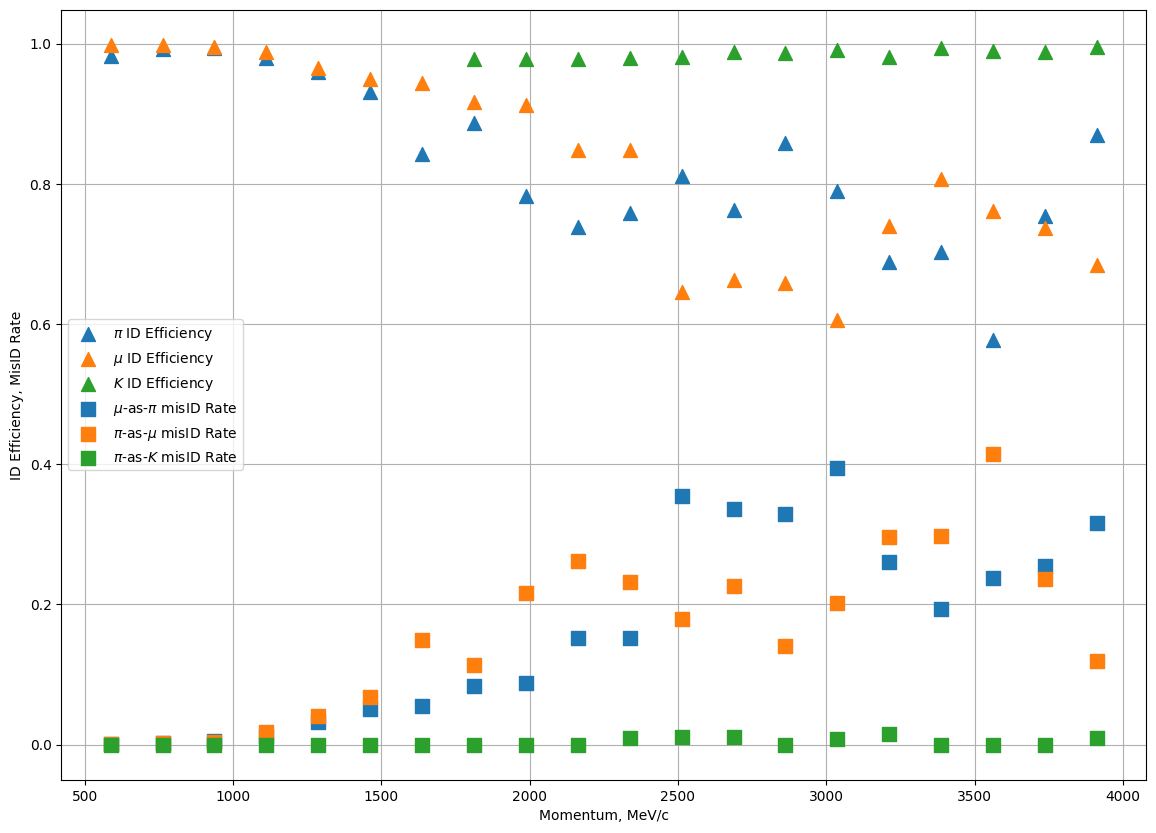

In [103]:
plt.figure(figsize=(14, 10))
plt.scatter(bin_centers, pi_id_eff_bins, c='#1f77b4', marker='^', s=100, label=r'$\pi$ ID Efficiency')
plt.scatter(bin_centers, mu_id_eff_bins, c='#ff7f0e', marker='^', s=100, label=r'$\mu$ ID Efficiency')
plt.scatter(bin_centers, ka_id_eff_bins, c='#2ca02c', marker='^', s=100, label=r'$K$ ID Efficiency')
plt.grid()

plt.scatter(bin_centers, mu_as_pi_misid_bins, c='#1f77b4', marker='s', s=100, label=r'$\mu$-as-$\pi$ misID Rate')
plt.scatter(bin_centers, pi_as_mu_misid_bins, c='#ff7f0e', marker='s', s=100, label=r'$\pi$-as-$\mu$ misID Rate')
plt.scatter(bin_centers, pi_as_ka_misid_bins, c='#2ca02c', marker='s', s=100, label=r'$\pi$-as-$K$ misID Rate')
plt.legend(loc='center left')
plt.ylabel('ID Efficiency, MisID Rate')
plt.xlabel('Momentum, MeV/c')
plt.show()

In [104]:
# Фиксируем порог вероятности
prob = 0.8

# Задаем количество бинов и вычисляем границы по X_test.momentum
n_bins = 20
momentum_min = X_test['theta_p'].min()
momentum_max = X_test['theta_p'].max()
bins = np.linspace(momentum_min, momentum_max, n_bins + 1)
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# Инициализируем списки для хранения результатов
mu_id_eff_bins = []
pi_as_mu_misid_bins = []
pi_id_eff_bins = []
mu_as_pi_misid_bins = []
ka_id_eff_bins = []
pi_as_ka_misid_bins = []
ka_as_pi_misid_bins = []

# Перебираем по каждому интервалу импульса
for i in range(n_bins):
    low = bins[i]
    high = bins[i+1]
    
    # Маска для текущего диапазона импульса
    bin_mask = (X_test['theta_p'] >= low) & (X_test['theta_p'] < high)
    
    # Эффективность идентификации мюонов (правильное распознавание)
    total_mu = X_test[bin_mask & (X_test['mass'] == mu_mass)]
    # События, где реконструированная масса равна истинной массе мюона
    selected_mu = total_mu[total_mu['mass_reco'] == mu_mass]
    mu_eff = selected_mu.shape[0] / total_mu.shape[0] if total_mu.shape[0] > 0 else np.nan
    mu_id_eff_bins.append(mu_eff)
    
    # misID пионов как мюоны
    total_pi_for_mu = X_test[bin_mask & (X_test['mass'] == pi_mass)]
    # Если пион ошибочно распознан как мюон: mass_reco равна mu_mass
    selected_mu_as_pi = total_pi_for_mu[total_pi_for_mu['mass_reco'] == mu_mass]
    pi_as_mu_eff = selected_mu_as_pi.shape[0] / total_pi_for_mu.shape[0] if total_pi_for_mu.shape[0] > 0 else np.nan
    pi_as_mu_misid_bins.append(pi_as_mu_eff)
    
    # Эффективность идентификации пионов
    total_pi = X_test[bin_mask & (X_test['mass'] == pi_mass)]
    # Правильное распознавание: mass_reco равна pi_mass
    selected_pi = total_pi[total_pi['mass_reco'] == pi_mass]
    print(f'{selected_pi.shape[0]} {total_pi.shape[0]}')
    pi_eff = selected_pi.shape[0] / total_pi.shape[0] if total_pi.shape[0] > 0 else np.nan
    pi_id_eff_bins.append(pi_eff)
    
    # misID мюонов как пионы
    total_mu_for_pi = X_test[bin_mask & (X_test['mass'] == mu_mass)]
    # Если мюон ошибочно распознан как пион: mass_reco равна pi_mass
    selected_pi_as_mu = total_mu_for_pi[total_mu_for_pi['mass_reco'] == pi_mass]
    mu_as_pi_eff = selected_pi_as_mu.shape[0] / total_mu_for_pi.shape[0] if total_mu_for_pi.shape[0] > 0 else np.nan
    mu_as_pi_misid_bins.append(mu_as_pi_eff)
    
    # Эффективность идентификации каонов
    total_ka = X_test[bin_mask & (X_test['mass'] == ka_mass)]
    # Правильное распознавание: mass_reco равна ka_mass
    selected_ka = total_ka[total_ka['mass_reco'] == ka_mass]
    ka_eff = selected_ka.shape[0] / total_ka.shape[0] if total_ka.shape[0] > 0 else np.nan
    ka_id_eff_bins.append(ka_eff)
    
    # misID пионов как каоны
    total_pi_for_ka = X_test[bin_mask & (X_test['mass'] == pi_mass)]
    # Если пион ошибочно распознан как каон: mass_reco равна ka_mass
    selected_ka_as_pi = total_pi_for_ka[total_pi_for_ka['mass_reco'] == ka_mass]
    pi_as_ka_eff = selected_ka_as_pi.shape[0] / total_pi_for_ka.shape[0] if total_pi_for_ka.shape[0] > 0 else np.nan
    pi_as_ka_misid_bins.append(pi_as_ka_eff)
    
    # misID каонов как пионы
    total_pi_for_ka2 = X_test[bin_mask & (X_test['mass'] == ka_mass)]
    # Если каон ошибочно распознан как пион: mass_reco равна pi_mass
    selected_pi_as_ka = total_pi_for_ka2[total_pi_for_ka2['mass_reco'] == pi_mass]
    ka_as_pi_eff = selected_pi_as_ka.shape[0] / total_pi_for_ka2.shape[0] if total_pi_for_ka2.shape[0] > 0 else np.nan
    ka_as_pi_misid_bins.append(ka_as_pi_eff)


# Преобразуем списки в массивы numpy (если требуется)
mu_id_eff_bins = np.array(mu_id_eff_bins)
pi_as_mu_misid_bins = np.array(pi_as_mu_misid_bins)
pi_id_eff_bins = np.array(pi_id_eff_bins)
mu_as_pi_misid_bins = np.array(mu_as_pi_misid_bins)
ka_id_eff_bins = np.array(ka_id_eff_bins)
pi_as_ka_misid_bins = np.array(pi_as_ka_misid_bins)
ka_as_pi_misid_bins = np.array(ka_as_pi_misid_bins)

362 370
745 757
1134 1160
843 866
748 774
744 764
610 635
729 752
686 711
863 884
679 706
588 606
779 812
675 713
746 776
717 763
701 737
686 719
634 689
644 687


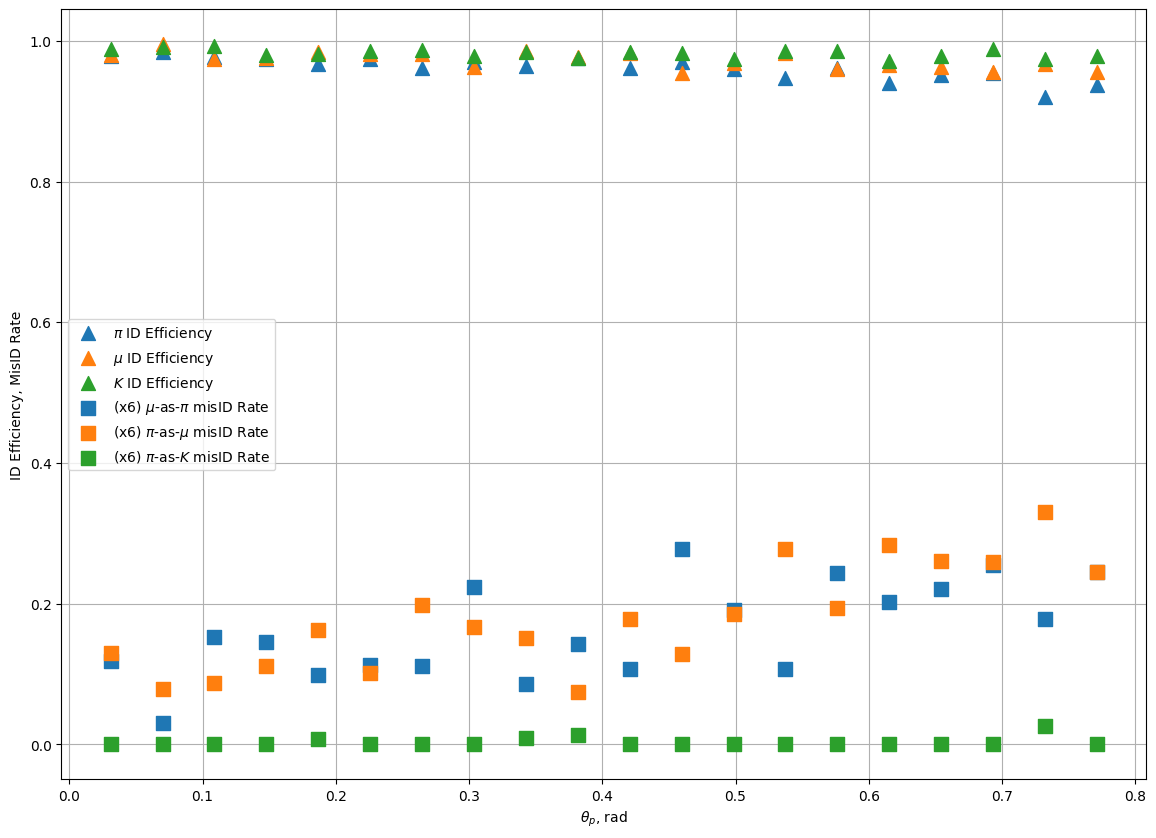

In [105]:
plt.figure(figsize=(14, 10))
plt.scatter(bin_centers, pi_id_eff_bins, c='#1f77b4', marker='^', s=100, label=r'$\pi$ ID Efficiency')
plt.scatter(bin_centers, mu_id_eff_bins, c='#ff7f0e', marker='^', s=100, label=r'$\mu$ ID Efficiency')
plt.scatter(bin_centers, ka_id_eff_bins, c='#2ca02c', marker='^', s=100, label=r'$K$ ID Efficiency')
plt.grid()

plt.scatter(bin_centers, mu_as_pi_misid_bins*6, c='#1f77b4', marker='s', s=100, label=r'(x6) $\mu$-as-$\pi$ misID Rate')
plt.scatter(bin_centers, pi_as_mu_misid_bins*6, c='#ff7f0e', marker='s', s=100, label=r'(x6) $\pi$-as-$\mu$ misID Rate')
plt.scatter(bin_centers, pi_as_ka_misid_bins*6, c='#2ca02c', marker='s', s=100, label=r'(x6) $\pi$-as-$K$ misID Rate')
plt.legend(loc='center left')
plt.ylabel('ID Efficiency, MisID Rate')
plt.xlabel(r'$\theta_p$, rad')
plt.show()

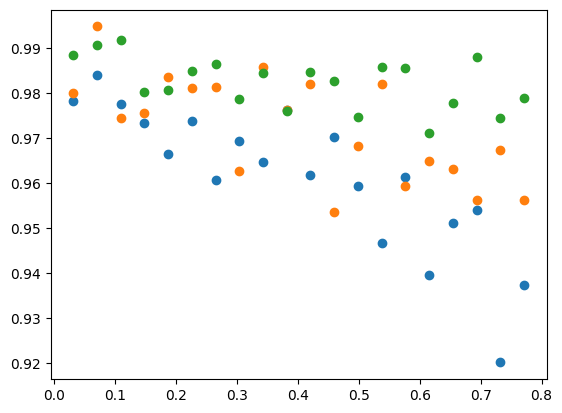

In [106]:
plt.scatter(bin_centers, pi_id_eff_bins)
plt.scatter(bin_centers, mu_id_eff_bins)
plt.scatter(bin_centers, ka_id_eff_bins)
# plt.scatter(bin_centers, mu_as_pi_misid_bins*5)
plt.show()

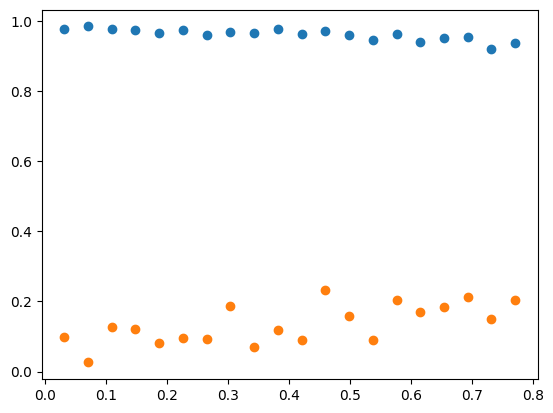

In [107]:
plt.scatter(bin_centers, pi_id_eff_bins)
plt.scatter(bin_centers, mu_as_pi_misid_bins*5)
plt.show()

In [108]:
# Фиксируем порог вероятности
prob = 0.8

# Задаем количество бинов и вычисляем границы по X_test.momentum
n_bins = 20
momentum_min = X_test['beta'].min()
momentum_max = X_test['beta'].max()
bins = np.linspace(momentum_min, momentum_max, n_bins + 1)
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# Инициализируем списки для хранения результатов
mu_id_eff_bins = []
pi_as_mu_misid_bins = []
pi_id_eff_bins = []
mu_as_pi_misid_bins = []
ka_id_eff_bins = []
pi_as_ka_misid_bins = []
ka_as_pi_misid_bins = []

# Перебираем по каждому интервалу импульса
for i in range(n_bins):
    low = bins[i]
    high = bins[i+1]
    
    # Маска для текущего диапазона импульса
    bin_mask = (X_test['beta'] >= low) & (X_test['beta'] < high)
    
    # Эффективность идентификации мюонов (правильное распознавание)
    total_mu = X_test[bin_mask & (X_test['mass'] == mu_mass)]
    # События, где реконструированная масса равна истинной массе мюона
    selected_mu = total_mu[total_mu['mass_reco'] == mu_mass]
    mu_eff = selected_mu.shape[0] / total_mu.shape[0] if total_mu.shape[0] > 0 else np.nan
    mu_id_eff_bins.append(mu_eff)
    
    # misID пионов как мюоны
    total_pi_for_mu = X_test[bin_mask & (X_test['mass'] == pi_mass)]
    # Если пион ошибочно распознан как мюон: mass_reco равна mu_mass
    selected_mu_as_pi = total_pi_for_mu[total_pi_for_mu['mass_reco'] == mu_mass]
    pi_as_mu_eff = selected_mu_as_pi.shape[0] / total_pi_for_mu.shape[0] if total_pi_for_mu.shape[0] > 0 else np.nan
    pi_as_mu_misid_bins.append(pi_as_mu_eff)
    
    # Эффективность идентификации пионов
    total_pi = X_test[bin_mask & (X_test['mass'] == pi_mass)]
    # Правильное распознавание: mass_reco равна pi_mass
    selected_pi = total_pi[total_pi['mass_reco'] == pi_mass]
    print(f'{selected_pi.shape[0]} {total_pi.shape[0]}')
    pi_eff = selected_pi.shape[0] / total_pi.shape[0] if total_pi.shape[0] > 0 else np.nan
    pi_id_eff_bins.append(pi_eff)
    
    # misID мюонов как пионы
    total_mu_for_pi = X_test[bin_mask & (X_test['mass'] == mu_mass)]
    # Если мюон ошибочно распознан как пион: mass_reco равна pi_mass
    selected_pi_as_mu = total_mu_for_pi[total_mu_for_pi['mass_reco'] == pi_mass]
    mu_as_pi_eff = selected_pi_as_mu.shape[0] / total_mu_for_pi.shape[0] if total_mu_for_pi.shape[0] > 0 else np.nan
    mu_as_pi_misid_bins.append(mu_as_pi_eff)
    
    # Эффективность идентификации каонов
    total_ka = X_test[bin_mask & (X_test['mass'] == ka_mass)]
    # Правильное распознавание: mass_reco равна ka_mass
    selected_ka = total_ka[total_ka['mass_reco'] == ka_mass]
    ka_eff = selected_ka.shape[0] / total_ka.shape[0] if total_ka.shape[0] > 0 else np.nan
    ka_id_eff_bins.append(ka_eff)
    
    # misID пионов как каоны
    total_pi_for_ka = X_test[bin_mask & (X_test['mass'] == pi_mass)]
    # Если пион ошибочно распознан как каон: mass_reco равна ka_mass
    selected_ka_as_pi = total_pi_for_ka[total_pi_for_ka['mass_reco'] == ka_mass]
    pi_as_ka_eff = selected_ka_as_pi.shape[0] / total_pi_for_ka.shape[0] if total_pi_for_ka.shape[0] > 0 else np.nan
    pi_as_ka_misid_bins.append(pi_as_ka_eff)
    
    # misID каонов как пионы
    total_pi_for_ka2 = X_test[bin_mask & (X_test['mass'] == ka_mass)]
    # Если каон ошибочно распознан как пион: mass_reco равна pi_mass
    selected_pi_as_ka = total_pi_for_ka2[total_pi_for_ka2['mass_reco'] == pi_mass]
    ka_as_pi_eff = selected_pi_as_ka.shape[0] / total_pi_for_ka2.shape[0] if total_pi_for_ka2.shape[0] > 0 else np.nan
    ka_as_pi_misid_bins.append(ka_as_pi_eff)
# Преобразуем списки в массивы numpy (если требуется)
mu_id_eff_bins = np.array(mu_id_eff_bins)
pi_as_mu_misid_bins = np.array(pi_as_mu_misid_bins)
pi_id_eff_bins = np.array(pi_id_eff_bins)
mu_as_pi_misid_bins = np.array(mu_as_pi_misid_bins)
ka_id_eff_bins = np.array(ka_id_eff_bins)
pi_as_ka_misid_bins = np.array(pi_as_ka_misid_bins)
ka_as_pi_misid_bins = np.array(ka_as_pi_misid_bins)

672 696
747 767
711 725
772 785
705 714
768 783
715 723
773 779
726 730
787 796
686 691
801 804
689 694
797 802
626 629
796 810
604 623
818 871
283 336
844 1130


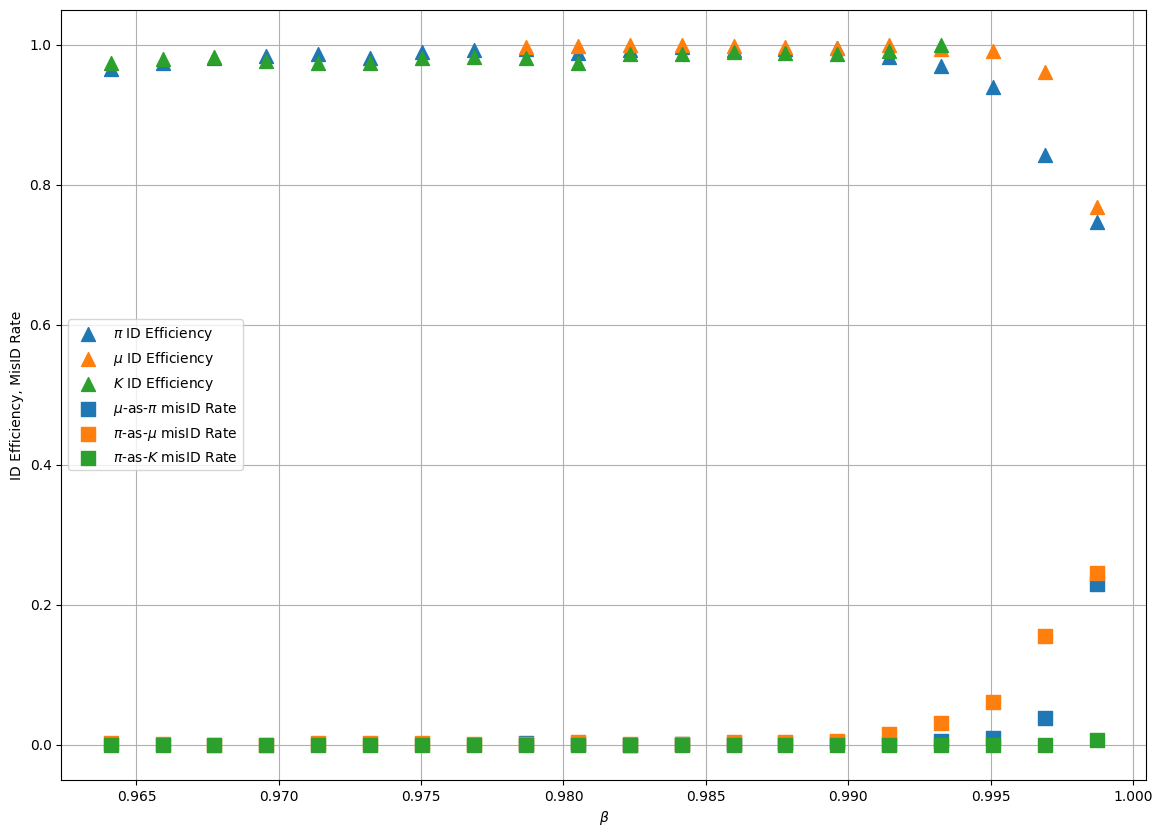

In [109]:
plt.figure(figsize=(14, 10))
plt.scatter(bin_centers, pi_id_eff_bins, c='#1f77b4', marker='^', s=100, label=r'$\pi$ ID Efficiency')
plt.scatter(bin_centers, mu_id_eff_bins, c='#ff7f0e', marker='^', s=100, label=r'$\mu$ ID Efficiency')
plt.scatter(bin_centers, ka_id_eff_bins, c='#2ca02c', marker='^', s=100, label=r'$K$ ID Efficiency')
plt.grid()

plt.scatter(bin_centers, mu_as_pi_misid_bins*1, c='#1f77b4', marker='s', s=100, label=r'$\mu$-as-$\pi$ misID Rate')
plt.scatter(bin_centers, pi_as_mu_misid_bins*1, c='#ff7f0e', marker='s', s=100, label=r'$\pi$-as-$\mu$ misID Rate')
plt.scatter(bin_centers, pi_as_ka_misid_bins*1, c='#2ca02c', marker='s', s=100, label=r'$\pi$-as-$K$ misID Rate')
plt.legend(loc='center left')
plt.ylabel('ID Efficiency, MisID Rate')
plt.xlabel(r'$\beta$')
plt.show()

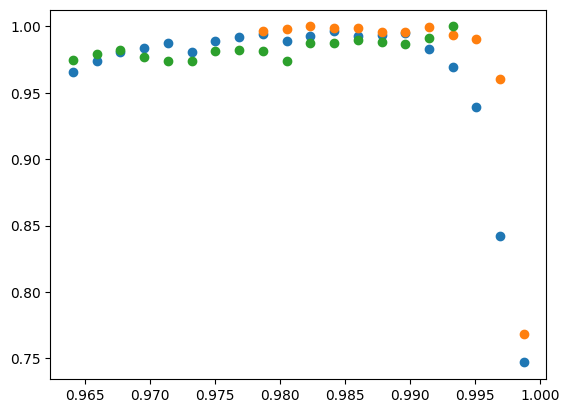

In [110]:
plt.scatter(bin_centers, pi_id_eff_bins)
plt.scatter(bin_centers, mu_id_eff_bins)
plt.scatter(bin_centers, ka_id_eff_bins)
# plt.scatter(bin_centers, mu_as_pi_misid_bins*5)
plt.show()

In [111]:
# Фиксируем порог вероятности
prob = 0.8

# Задаем количество бинов и вычисляем границы по X_test.momentum
n_bins = 20
momentum_min = X_test['cos_theta_p'].min()
momentum_max = X_test['cos_theta_p'].max()
bins = np.linspace(momentum_min, momentum_max, n_bins + 1)
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# Инициализируем списки для хранения результатов
mu_id_eff_bins = []
pi_as_mu_misid_bins = []
pi_id_eff_bins = []
mu_as_pi_misid_bins = []
ka_id_eff_bins = []
pi_as_ka_misid_bins = []
ka_as_pi_misid_bins = []

# Перебираем по каждому интервалу импульса
for i in range(n_bins):
    low = bins[i]
    high = bins[i+1]
    
    # Маска для текущего диапазона импульса
    bin_mask = (X_test['cos_theta_p'] >= low) & (X_test['cos_theta_p'] < high)
    
    # Эффективность идентификации мюонов (правильное распознавание)
    total_mu = X_test[bin_mask & (X_test['mass'] == mu_mass)]
    # События, где реконструированная масса равна истинной массе мюона
    selected_mu = total_mu[total_mu['mass_reco'] == mu_mass]
    mu_eff = selected_mu.shape[0] / total_mu.shape[0] if total_mu.shape[0] > 0 else np.nan
    mu_id_eff_bins.append(mu_eff)
    
    # misID пионов как мюоны
    total_pi_for_mu = X_test[bin_mask & (X_test['mass'] == pi_mass)]
    # Если пион ошибочно распознан как мюон: mass_reco равна mu_mass
    selected_mu_as_pi = total_pi_for_mu[total_pi_for_mu['mass_reco'] == mu_mass]
    pi_as_mu_eff = selected_mu_as_pi.shape[0] / total_pi_for_mu.shape[0] if total_pi_for_mu.shape[0] > 0 else np.nan
    pi_as_mu_misid_bins.append(pi_as_mu_eff)
    
    # Эффективность идентификации пионов
    total_pi = X_test[bin_mask & (X_test['mass'] == pi_mass)]
    # Правильное распознавание: mass_reco равна pi_mass
    selected_pi = total_pi[total_pi['mass_reco'] == pi_mass]
    print(f'{selected_pi.shape[0]} {total_pi.shape[0]}')
    pi_eff = selected_pi.shape[0] / total_pi.shape[0] if total_pi.shape[0] > 0 else np.nan
    pi_id_eff_bins.append(pi_eff)
    
    # misID мюонов как пионы
    total_mu_for_pi = X_test[bin_mask & (X_test['mass'] == mu_mass)]
    # Если мюон ошибочно распознан как пион: mass_reco равна pi_mass
    selected_pi_as_mu = total_mu_for_pi[total_mu_for_pi['mass_reco'] == pi_mass]
    mu_as_pi_eff = selected_pi_as_mu.shape[0] / total_mu_for_pi.shape[0] if total_mu_for_pi.shape[0] > 0 else np.nan
    mu_as_pi_misid_bins.append(mu_as_pi_eff)
    
    # Эффективность идентификации каонов
    total_ka = X_test[bin_mask & (X_test['mass'] == ka_mass)]
    # Правильное распознавание: mass_reco равна ka_mass
    selected_ka = total_ka[total_ka['mass_reco'] == ka_mass]
    ka_eff = selected_ka.shape[0] / total_ka.shape[0] if total_ka.shape[0] > 0 else np.nan
    ka_id_eff_bins.append(ka_eff)
    
    # misID пионов как каоны
    total_pi_for_ka = X_test[bin_mask & (X_test['mass'] == pi_mass)]
    # Если пион ошибочно распознан как каон: mass_reco равна ka_mass
    selected_ka_as_pi = total_pi_for_ka[total_pi_for_ka['mass_reco'] == ka_mass]
    pi_as_ka_eff = selected_ka_as_pi.shape[0] / total_pi_for_ka.shape[0] if total_pi_for_ka.shape[0] > 0 else np.nan
    pi_as_ka_misid_bins.append(pi_as_ka_eff)
    
    # misID каонов как пионы
    total_pi_for_ka2 = X_test[bin_mask & (X_test['mass'] == ka_mass)]
    # Если каон ошибочно распознан как пион: mass_reco равна pi_mass
    selected_pi_as_ka = total_pi_for_ka2[total_pi_for_ka2['mass_reco'] == pi_mass]
    ka_as_pi_eff = selected_pi_as_ka.shape[0] / total_pi_for_ka2.shape[0] if total_pi_for_ka2.shape[0] > 0 else np.nan
    ka_as_pi_misid_bins.append(ka_as_pi_eff)
# Преобразуем списки в массивы numpy (если требуется)
mu_id_eff_bins = np.array(mu_id_eff_bins)
pi_as_mu_misid_bins = np.array(pi_as_mu_misid_bins)
pi_id_eff_bins = np.array(pi_id_eff_bins)
mu_as_pi_misid_bins = np.array(mu_as_pi_misid_bins)
ka_id_eff_bins = np.array(ka_id_eff_bins)
pi_as_ka_misid_bins = np.array(pi_as_ka_misid_bins)
ka_as_pi_misid_bins = np.array(ka_as_pi_misid_bins)

386 412
310 328
364 398
407 437
401 416
346 367
509 534
532 568
494 517
483 503
502 535
617 636
460 484
626 643
719 743
870 891
820 850
915 952
1395 1436
3154 3228


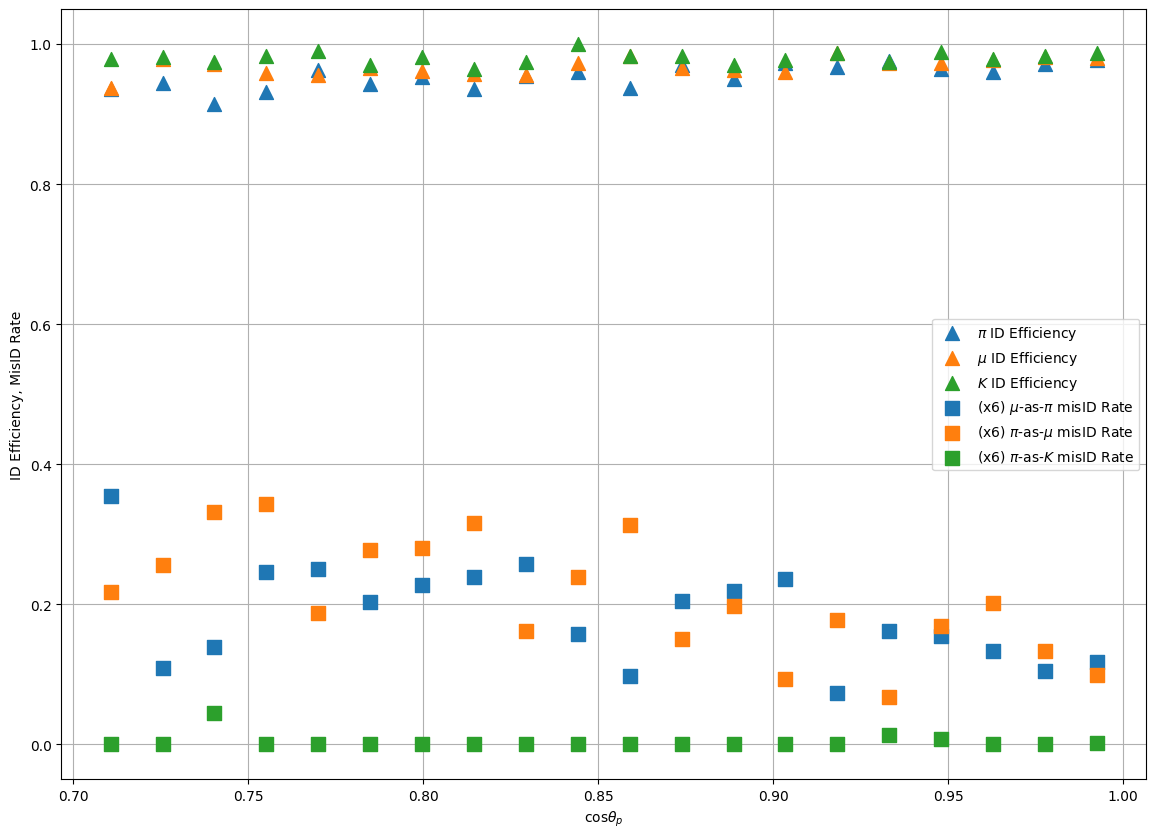

In [112]:
plt.figure(figsize=(14, 10))
plt.scatter(bin_centers, pi_id_eff_bins, c='#1f77b4', marker='^', s=100, label=r'$\pi$ ID Efficiency')
plt.scatter(bin_centers, mu_id_eff_bins, c='#ff7f0e', marker='^', s=100, label=r'$\mu$ ID Efficiency')
plt.scatter(bin_centers, ka_id_eff_bins, c='#2ca02c', marker='^', s=100, label=r'$K$ ID Efficiency')
plt.grid()

plt.scatter(bin_centers, mu_as_pi_misid_bins*6, c='#1f77b4', marker='s', s=100, label=r'(x6) $\mu$-as-$\pi$ misID Rate')
plt.scatter(bin_centers, pi_as_mu_misid_bins*6, c='#ff7f0e', marker='s', s=100, label=r'(x6) $\pi$-as-$\mu$ misID Rate')
plt.scatter(bin_centers, pi_as_ka_misid_bins*6, c='#2ca02c', marker='s', s=100, label=r'(x6) $\pi$-as-$K$ misID Rate')
plt.legend(loc='center right')
plt.ylabel('ID Efficiency, MisID Rate')
plt.xlabel(r'cos$\theta_p$')
plt.show()

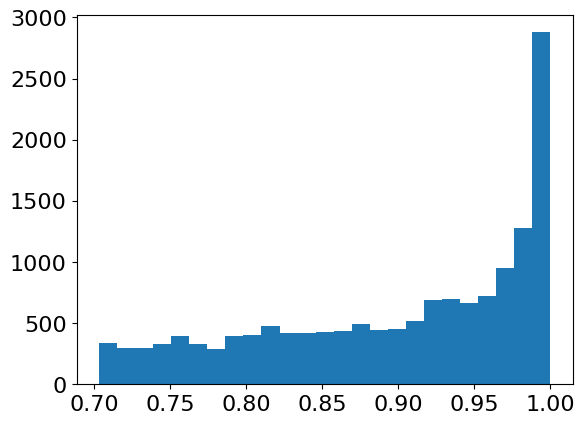

In [262]:
plt.hist(X_test[X_test.mass == pi_mass].cos_theta_p, bins='auto')
plt.show()

In [263]:
edf, bdf, gdf, main_angles_tmp = create_edf_decay('decay_test4.root')

(7655, 5)
(7655, 3)
(7640, 5)
(7640, 3)


In [264]:
edf

x_c     z_c      y_c       t_c         x_i  \
entry subentry                                                      
0     0        -350.719869  1000.0   108.64  0.674614 -111.545794   
      1        -350.719869  1000.0   115.36  0.652944 -111.545794   
      2        -350.719869  1000.0   132.16  0.661511 -111.545794   
      3        -350.719869  1000.0   169.12  0.694594 -111.545794   
      4        -350.719869  1000.0   199.36  0.714269 -111.545794   
...                    ...     ...      ...       ...         ...   
7639  19         62.560131  1000.0 -1141.28  0.733622  108.145078   
      20        190.240131  1000.0 -1211.84  0.899408  108.145078   
      21         35.680131  1000.0 -1184.96  0.845376  108.145078   
      22        136.480131  1000.0 -1131.20  0.679661  108.145078   
      23         49.120131  1000.0 -1164.80  0.771187  108.145078   

                        y_i    mass       true_p      beta  x_p  y_p  z_p  \
entry subentry                                                              
0     0         -414.253842  139.57   870.490958  0.987389  0.0  0.0  0.0   
      1         -414.253842  139.57   870.490958  0.987389  0.0  0.0  0.0   
      2         -414.253842  139.57   870.490958  0.987389  0.0  0.0  0.0   
      3         -414.253842  139.57   870.490958  0.987389  0.0  0.0  0.0   
      4         -414.253842  139.57   870.490958  0.987389  0.0  0.0  0.0   
...                     ...     ...          ...       ...  ...  ...  ...   
7639  19       -1207.625728  139.57  1029.345857  0.990932  0.0  0.0  0.0   
      20       -1207.625728  139.57  1029.345857  0.990932  0.0  0.0  0.0   
      21       -1207.625728  139.57  1029.345857  0.990932  0.0  0.0  0.0   
      22       -1207.625728  139.57  1029.345857  0.990932  0.0  0.0  0.0   
      23       -1207.625728  139.57  1029.345857  0.990932  0.0  0.0  0.0   

                    nx_p      ny_p      nz_p  
entry subentry                                
0     0        -0.102511 -0.380699  0.918999  
      1        -0.102511 -0.380699  0.918999  
      2        -0.102511 -0.380699  0.918999  
      3        -0.102511 -0.380699  0.918999  
      4        -0.102511 -0.380699  0.918999  
...                  ...       ...       ...  
7639  19        0.068810 -0.768385  0.636278  
      20        0.068810 -0.768385  0.636278  
      21        0.068810 -0.768385  0.636278  
      22        0.068810 -0.768385  0.636278  
      23        0.068810 -0.768385  0.636278  

[315983 rows x 15 columns]

In [113]:
def recoAngles_for_decay(edf: pd.DataFrame, idf: pd.DataFrame, rotation_mode=False):
    """
    Геометрическая реконструкция углов фотонов относительно направления частицы.
    Из координат срабатываний и частиц вычисляются углы theta_c, phi_c и время вылета фотонов t_c_orig и добавляются к edf.
    """
    r0 = edf.loc[:, ("x_p", "y_p", "z_p")].to_numpy()
    if rotation_mode:
        r = edf.loc[:, ("rotated_x", "rotated_y", "rotated_z")].to_numpy()
        # n0 = edf.loc[:, ('rotated_nx_p', 'rotated_ny_p', 'rotated_nz_p')].to_numpy()
        n0 = edf.loc[
            :, ("recalculated_nx_p", "recalculated_ny_p", "recalculated_nz_p")
        ].to_numpy()
    else:
        r = edf.loc[:, ("x_c", "y_c", "z_c")].to_numpy()
        n0 = edf.loc[:, ("nx_p", "ny_p", "nz_p")].to_numpy()

    speedOfLight_mmperns = 299.792458  # мм/нс

    # расстояние от радиатора до детектора
    dist = float(idf["distance"])

    # толщина радиатора
    W = float(idf["W"])

    # расстояние от точки вылета частицы до входной плоскости радиатора
    rad_pos = float(idf["zdis"])

    # полное число срабатываний
    N = edf.shape[0]

    # координаты точки пересечения трека с ФД
    if not rotation_mode:
        # y_i = (
        #     r0[:, 1] + (dist + rad_pos) * n0[:, 1] / n0[:, 2]
        # )  # r0[:,1] + (dist + W + rad_pos) * n0[:,1] / n0[:,2]   #   r0[:,1] + (dist + rad_pos) * n0[:,1] / n0[:,2]
        # x_i = (
        #     r0[:, 0] + (y_i - r0[:, 1]) * n0[:, 0] / n0[:, 1]
        # )  # r0[:,0] + (y_i - r0[:,1]) * n0[:,0] / n0[:,1]    #     r0[:,0] + (dist + rad_pos) * n0[:,0] / n0[:,2]
        x_i = edf.x_i
        y_i = edf.y_i
        edf["r_p_c"] = np.sqrt(
            (r0[:, 0] - x_i) ** 2 + (r0[:, 1] - y_i) ** 2 + (r0[:, 2] - r[:, 2]) ** 2
        )
        edf["r_c"] = np.sqrt((x_i - edf["x_c"]) ** 2 + (y_i - edf["y_c"]) ** 2)

    if rotation_mode:
        n_mean = float(idf["n_mean"])

        edf["rotated_r_c"] = np.sqrt(
            (edf["rotated_x_i"] - edf["rotated_x"]) ** 2
            + (edf["rotated_y_i"] - edf["rotated_y"]) ** 2
        )

        rotated_r_c = edf["rotated_r_c"].to_numpy()
        # r_p_c = edf['r_p_c'].to_numpy()
        beta = edf["beta"].to_numpy()
        r_p_c = dist  # or + W/2 ???

    # avg_betas = []
    # for _, subentry in edf['beta_from_true_r'].groupby(level=0):
    #   avg_beta = subentry.mean()
    #   for __ in subentry:
    #     avg_betas.append(avg_beta)
    # edf['beta_from_true_r_mean'] = avg_betas
    # косинусы и синусы сферических углов направления частицы
    costheta, sintheta = n0[:, 2], np.sqrt(n0[:, 0] ** 2 + n0[:, 1] ** 2)
    phi = np.arctan2(n0[:, 1], n0[:, 0])
    cosphi, sinphi = np.cos(phi), np.sin(phi)

    # номинальная точка вылета фотонов
    ro = r0 + (W / 2 + rad_pos) / n0[:, 2].reshape(N, 1) * n0

    """
    Преобразование в СК частицы
    𝑢𝑥 = cos 𝜃(𝑣𝑥 cos 𝜙 + 𝑣𝑦 sin 𝜙) − 𝑣𝑧 sin 𝜃,
    𝑢𝑦 = −𝑣𝑥 sin 𝜙 + 𝑣𝑦 cos 𝜙,
    𝑢𝑧 = sin 𝜃(𝑣𝑥 cos 𝜙 + 𝑣𝑦 sin 𝜙) + 𝑣𝑧 cos 𝜃.
    """

    # вектор направления фотона в лабораторной СК
    s = r - ro
    snorm = np.linalg.norm(s, axis=1, keepdims=True)
    v = s / snorm
    if not rotation_mode:
        edf["t_c_orig"] = edf["t_c"] - (snorm / speedOfLight_mmperns).reshape(N)

    # освобождение памяти при необходимости
    # del r0, n0, ro, r, s

    U = np.stack(
        (
            np.stack((costheta * cosphi, costheta * sinphi, -sintheta)),
            np.stack((-sinphi, cosphi, np.full(N, 0.0))),
            np.stack((sintheta * cosphi, sintheta * sinphi, costheta)),
        )
    ).transpose(2, 0, 1)

    # единичный вектор направления фотона в СК частицы
    u = (U @ v.reshape(N, 3, 1)).reshape(N, 3)

    # сферические углы фотона в СК частицы
    if rotation_mode:
        # edf["rotated_theta_c"] = np.arccos(u[:, 2])
        edf["rotated_phi_c"] = np.arctan2(-u[:, 1], -u[:, 0])
    else:
        edf["theta_c"] = np.arccos(u[:, 2])
        edf["phi_c"] = np.arctan2(-u[:, 1], -u[:, 0])


In [114]:
np.random.permutation(gdf.index.shape[0]).shape[0]

7640

In [115]:
batch_size=10000

In [116]:
for dcr in  ['1e5'] : # ['0', '1e3', '1e4', '1e5', '1e6']
    print(dcr)
    timer_start = perf_counter()

    sample_idx = np.random.permutation(gdf.index.shape[0])
    
    max_iter = int(np.ceil(sample_idx.shape[0] / batch_size))
    print(max_iter)
    
    for sample in range(max_iter):
        sample_timer = perf_counter()
        if sample == max_iter - 1:
            sample_ind = sample_idx[batch_size * sample :]
            batch_size = sample_idx.shape[0] - batch_size * sample
        else:
            sample_ind = sample_idx[batch_size * sample : batch_size * (sample + 1)]
            
        edf_d = edf.loc[sample_ind]
        gdf_d = gdf.loc[sample_ind]
    
        index_map = dict(zip(np.array(gdf_d.index), np.linspace(0, batch_size - 1, batch_size, dtype=np.int16)))
        new_new_index = edf_d.index.map(lambda idx: (index_map[idx[0]], idx[1]))
        edf_d.index = pd.MultiIndex.from_tuples(new_new_index, names=edf_d.index.names)
        gdf_d.index = np.linspace(0, batch_size - 1, batch_size, dtype=np.int16)
    
    
        bdf = pd.DataFrame()
        edf_d = addNoise(idf, edf_d, gdf_d, (0, 7), float(dcr))
        edf_d = enforce_float32(edf_d)

        # sample_ind_2 = np.random.choice(gdf_d.index, size=int(np.ceil(batch_size / num_of_classes)), replace=False)
        # edf_slice = edf_d.loc[(sample_ind_2)]
        # edf_d.loc[sample_ind_2] = edf_slice[edf_slice.signal == False] 
        # 
    
        edf_d = applySpaceCut(edf_d)
        planeRecalculation(edf_d, idf)
        planeRotation(edf_d)
        edf_d = applySecondSpaceCut(edf_d)
        edf_to_bdf(edf_d.mass, bdf)
        edf_to_bdf(edf_d.true_p, bdf)
        bdf.rename(columns={'true_p': 'momentum'}, inplace=True)
        edf_to_bdf(edf_d.beta, bdf)
        recoAngles_for_decay(edf_d, idf)
        primaryDirectionRecalculation(edf_d)
        
        recoAngles_for_decay(edf_d, idf, rotation_mode=True)
        
        calculateSignalCounts(edf_d, bdf)
        edf_d = enforce_float32(edf_d)
        cal_arr, errs = rSlidingWindow(edf_d, idf, bdf, avg_sigmas=avg_sigmas, avg_t_sigmas=avg_t_sigmas, cal_arr=cal_arr, errs=errs, num_of_groups=num_of_groups,
                                   step=r_width, t_window_width=t_width, r_width_factor=r_factor, t_width_factor=t_factor, weighed=weighed, deg_lim=deg_lim, param_fit=param_fit,
                                   calibration_func=calibration_func, param_calibration_func=param_calibration_func, num_of_calibration_params=num_of_calibration_params, num_of_param_fit_params=num_of_param_fit_params,
                                   target_variable=target_variable, target_angle=target_angle, num_of_theta_intervals=num_of_theta_intervals, p0=p0, p0_c=p0_c, what_to_group=what_to_group, use_decision_tree=useuse_decision_tree)
        edf_d = enforce_float32(edf_d)
        dists_from_mean_edf = []
        for entry, event in edf_d.groupby(level=0):
            data = np.array(event[['rotated_r_c', 't_c']])
            in_x_bins = (data[:, 0][:, None] >= r_bins[:, 0]) & (data[:, 0][:, None] < r_bins[:, 1])
            in_y_bins = (data[:, 1][:, None] >= t_bins[:, 0]) & (data[:, 1][:, None] < t_bins[:, 1])
            
            # Compute 2D histogram by combining x and y conditions
            hist = np.dot(in_x_bins.T.astype(int), in_y_bins.astype(int))  # Shape: (len(x_bins), len(y_bins))
            r_bin_centers = r_bins.mean(axis=1)
            hist = hist / r_bin_centers[:, None]
            
            max_signal = np.max(hist)
            
            dists_from_mean_edf.append((max_signal - background_mean) / background_std)
        
        bdf['distance'] = dists_from_mean_edf
        
        if sample == 0:
            c_bdf_d = bdf
        else:
            c_bdf_d = pd.concat([c_bdf_d, bdf], ignore_index=True)
        print('    Time elapsed on current sample: ', round(perf_counter() - sample_timer))
    print('Time elapsed on current DCR: ', round(perf_counter() - timer_start))
bdf = c_bdf_d

1e5
1
    Generate noise with DCR per mm^2 100000.0, mean number of hits per event: 175.00.
    Time elapsed on current sample:  26
Time elapsed on current DCR:  26


In [98]:
# bdf = bdf[bdf.beta>0.98]

In [117]:
max(bdf_d.theta_p)

0.7907356023788452

In [118]:
bdf = bdf[~bdf.mass.isna()]

In [119]:
bdf

,mass,momentum,beta,signal_counts,param_group,theta_p,cos_theta_p,unfixed_calculated_r_2d_4_rsigms_4_tsigms,beta_from_calc_r_4_rsigms_4_tsigms,delta_beta_4_rsigms_4_tsigms,eps_beta_4_rsigms_4_tsigms,distance
0,139.570007,991.403381,0.990235,15,9.0,0.239417,0.971476,44.590918,0.986046,-0.004189,-0.423026,14.569573
1,139.570007,913.264465,0.988523,40,9.0,0.502908,0.876185,52.743598,0.987996,-0.000527,-0.053344,97.830608
2,139.570007,936.979919,0.989087,31,9.0,0.220904,0.975700,46.884198,0.989303,0.000216,0.021869,73.938776
3,139.570007,974.229736,0.989893,26,9.0,0.124437,0.992268,46.456599,0.989879,-0.000014,-0.001415,96.202226
4,139.570007,873.028198,0.987461,30,8.0,0.305225,0.953779,46.638539,0.987240,-0.000221,-0.022340,92.491651
...,...,...,...,...,...,...,...,...,...,...,...,...
7635,139.570007,860.058899,0.987087,113,8.0,0.356570,0.937100,46.769868,0.986117,-0.000971,-0.098324,118.465677
7636,139.570007,870.168091,0.987380,50,8.0,0.767579,0.719594,62.625477,0.985942,-0.001438,-0.145610,28.958492
7637,139.570007,929.377319,0.988911,43,9.0,0.495592,0.879687,52.354735,0.987740,-0.001171,-0.118394,117.451275
7638,139.570007,828.710693,0.986112,33,8.0,0.203579,0.979349,44.027687,0.985832,-0.000280,-0.028427,107.147205


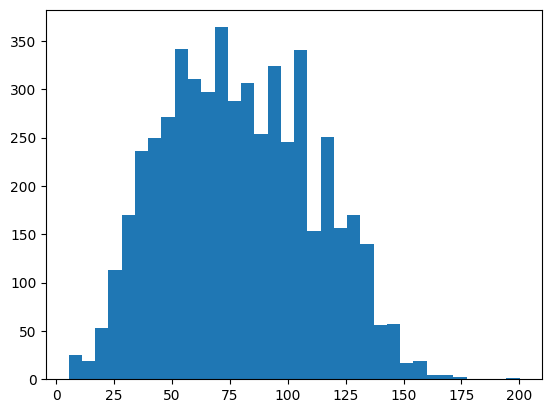

In [120]:
plt.hist(bdf[bdf.mass == pi_mass].distance, bins='auto')
plt.show()

In [121]:
bdf[['bckg_proba', 'mu_proba', 'pi_proba', 'ka_proba']] = model.predict_proba(bdf[['momentum', 'unfixed_calculated_r_2d_4_rsigms_4_tsigms', 'theta_p', 'distance']])

In [122]:
bdf['mass_reco'] = label_encoder.inverse_transform(model.predict(bdf[['momentum', 'unfixed_calculated_r_2d_4_rsigms_4_tsigms', 'theta_p', 'distance']]))

In [123]:
pi_rel_eff = bdf[(bdf.mass_reco  == pi_mass) & (bdf.mass == pi_mass) & (bdf.theta_p < 0.79)].shape[0] / bdf[(bdf.mass == pi_mass) & (bdf.theta_p < 0.79)].shape[0]

In [124]:
mu_rel_eff = bdf[(bdf.mass_reco  == mu_mass) & (bdf.mass == mu_mass) & (bdf.theta_p < 0.79)].shape[0] / bdf[(bdf.mass == mu_mass) & (bdf.theta_p < 0.79)].shape[0]

In [125]:
print(pi_rel_eff, mu_rel_eff)

0.9822297440236937 0.9798811156835848


In [289]:
1.247 * 0.3

0.37410000000000004

In [126]:
np.sqrt((1 - pi_rel_eff) ** 2 +(1 - mu_rel_eff) ** 2)

0.026843090425670946

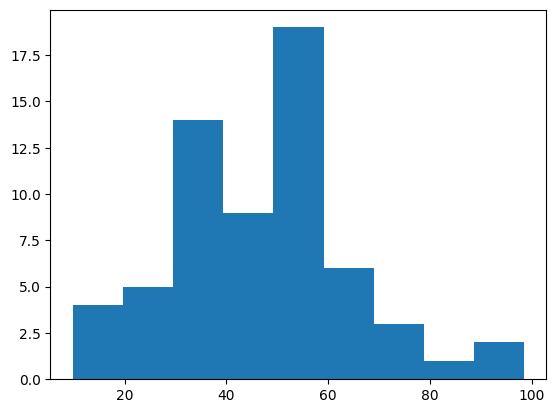

In [128]:
plt.hist(bdf[(bdf.mass == pi_mass) & (bdf.mass_reco == mu_mass) & (bdf.theta_p < 0.79)].distance, bins='auto')
plt.show()

In [129]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

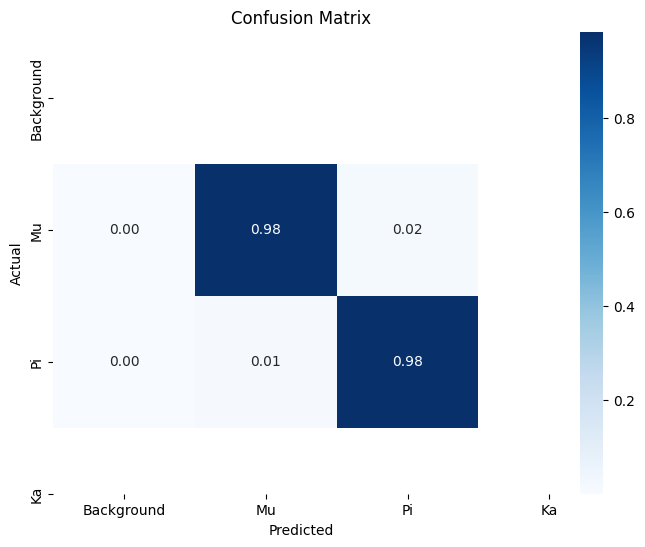

In [130]:
y_test_2 = label_encoder.transform(bdf[bdf.theta_p < 0.79].mass)
# y_pred_2 = model.predict(bdf[['momentum', 'unfixed_calculated_r_2d_4_rsigms_4_tsigms', 'theta_p', 'distance']])
y_pred_2 = label_encoder.transform(bdf[bdf.theta_p < 0.79].mass_reco)
cm = confusion_matrix(y_test_2, y_pred_2)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

class_names = ['Background', 'Mu', 'Pi', 'Ka']
# Plotting using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

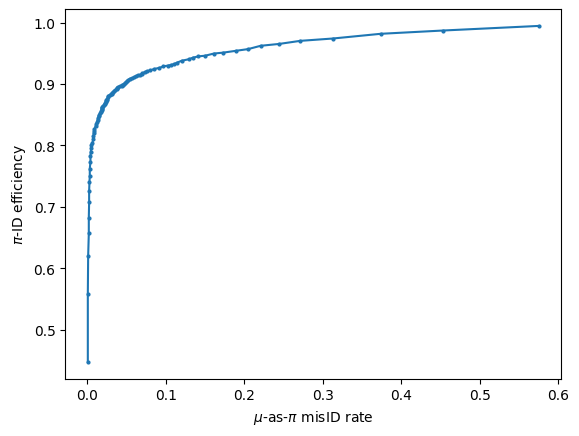

In [128]:
pi_probs = np.linspace(0.01, 0.99, 100)
pi_id_eff = [bdf[(bdf.pi_proba > prob) & (bdf.mass > 110)].shape[0] / bdf[(bdf.mass > 110)].shape[0] for prob in pi_probs]
mu_as_pi_misid = [bdf[(bdf.pi_proba > prob) & (bdf.mass < 110)].shape[0] / bdf[(bdf.mass < 110)].shape[0] for prob in pi_probs]

plt.scatter(mu_as_pi_misid, pi_id_eff, s=4)
plt.plot(mu_as_pi_misid, pi_id_eff)
plt.xlabel(r'$\mu$-as-$\pi$ misID rate')
plt.ylabel(r'$\pi$-ID efficiency')
plt.show()  

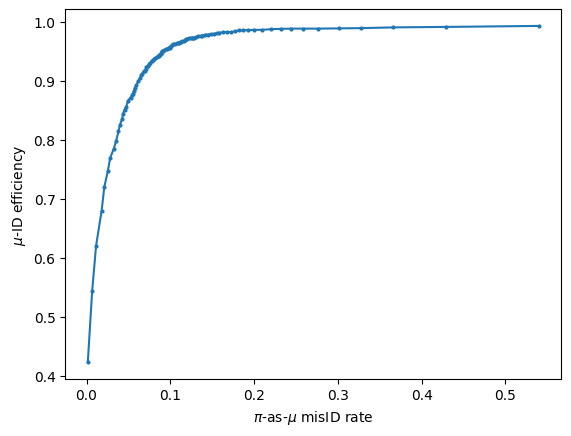

In [127]:
mu_probs = np.linspace(0.01, 0.99, 100)
mu_id_eff = [bdf[(bdf.mu_proba > prob) & (bdf.mass < 110)].shape[0] / bdf[(bdf.mass < 110)].shape[0] for prob in pi_probs]
pi_as_mu_misid = [bdf[(bdf.mu_proba > prob) & (bdf.mass > 110)].shape[0] / bdf[(bdf.mass > 110)].shape[0] for prob in pi_probs]

plt.scatter(pi_as_mu_misid, mu_id_eff, s=4)
plt.plot(pi_as_mu_misid, mu_id_eff)
plt.xlabel(r'$\pi$-as-$\mu$ misID rate')
plt.ylabel(r'$\mu$-ID efficiency')
plt.show()

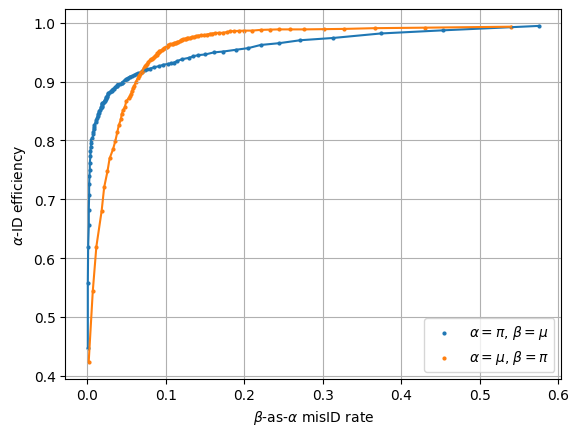

In [132]:
plt.scatter(mu_as_pi_misid, pi_id_eff, s=4, label=r'$\alpha=\pi$, $\beta=\mu$')
plt.plot(mu_as_pi_misid, pi_id_eff)
plt.scatter(pi_as_mu_misid, mu_id_eff, s=4, label=r'$\alpha=\mu$, $\beta=\pi$')
plt.plot(pi_as_mu_misid, mu_id_eff)
plt.xlabel(r'$\beta$-as-$\alpha$ misID rate')
plt.ylabel(r'$\alpha$-ID efficiency')
plt.grid()
plt.legend()
plt.show()

In [114]:
bdf_d

,mass,momentum,beta,signal_counts,param_group,theta_p,cos_theta_p,unfixed_calculated_r_2d_4_rsigms_4_tsigms,beta_from_calc_r_4_rsigms_4_tsigms,delta_beta_4_rsigms_4_tsigms,eps_beta_4_rsigms_4_tsigms,distance
0,493.679993,3459.238281,0.989969,40,8.0,0.580545,0.836164,57.403787,0.989913,-0.000057,-0.005726,17.747465
1,0.000000,637.616516,0.976871,0,4.0,0.493285,0.880782,23.953093,0.969382,-0.007489,-0.766604,5.235825
2,0.000000,538.984741,0.981325,0,5.0,0.146270,0.989322,27.907917,0.969168,-0.012157,-1.238843,3.698648
3,493.679993,2587.659424,0.982283,33,6.0,0.425178,0.910965,45.486998,0.982325,0.000042,0.004260,22.637901
4,0.000000,540.610596,0.981434,0,6.0,0.108504,0.994119,17.540255,0.969456,-0.011979,-1.220510,5.235825
...,...,...,...,...,...,...,...,...,...,...,...,...
59734,493.679993,2281.317383,0.977377,26,4.0,0.551189,0.851903,41.853403,0.975823,-0.001554,-0.159029,20.877628
59735,0.000000,2313.847656,0.977988,0,5.0,0.688862,0.771970,20.158871,0.969797,-0.008191,-0.837486,5.235825
59736,493.679993,3515.689453,0.990284,42,8.0,0.572024,0.840807,58.279299,0.991193,0.000908,0.091735,26.478972
59737,139.570007,546.505798,0.968902,8,2.0,0.111212,0.993822,30.850883,0.972293,0.003391,0.349980,9.863736


In [115]:
bdf

,mass,momentum,beta,signal_counts,param_group,theta_p,cos_theta_p,unfixed_calculated_r_2d_4_rsigms_4_tsigms,beta_from_calc_r_4_rsigms_4_tsigms,delta_beta_4_rsigms_4_tsigms,eps_beta_4_rsigms_4_tsigms,distance,bckg_proba,mu_proba,pi_proba,ka_proba
0,139.570007,774.004456,0.984128,35,10.0,2.603297,-0.858584,19.122996,0.972562,-0.011566,-1.175228,2.636545,7.421095e-01,0.253507,0.004341,0.000042
1,139.570007,1028.127686,0.990911,33,10.0,2.730167,-0.916552,51.201979,0.976769,-0.014142,-1.427187,4.862136,8.175298e-01,0.000116,0.182260,0.000094
2,139.570007,947.219971,0.989318,38,10.0,1.582939,-0.012142,23.036888,0.985069,-0.004249,-0.429534,14.484956,1.107024e-04,0.003819,0.996033,0.000037
3,139.570007,934.973328,0.989041,39,10.0,1.996278,-0.412760,24.265718,0.986525,-0.002516,-0.254349,14.758301,2.738925e-04,0.003995,0.995714,0.000017
4,139.570007,848.221985,0.986731,31,10.0,3.012973,-0.991740,46.971329,0.972759,-0.013973,-1.416047,13.068584,6.424845e-06,0.000030,0.999961,0.000002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7632,139.570007,888.391663,0.987883,7,10.0,1.158657,0.400570,30.242328,0.966700,-0.021183,-2.144278,9.099022,2.049040e-02,0.004168,0.975323,0.000018
7633,105.650002,907.533325,0.993292,43,10.0,1.012056,0.530118,20.718350,0.972904,-0.020388,-2.052521,5.698962,8.794889e-01,0.026889,0.093572,0.000050
7634,139.570007,841.588623,0.986526,31,10.0,3.034658,-0.994288,44.844880,0.970380,-0.016145,-1.636575,21.471720,5.101886e-07,0.000007,0.999990,0.000002
7635,105.650002,962.846252,0.994034,33,10.0,1.881177,-0.305421,21.481081,0.972904,-0.021129,-2.125625,14.118135,3.429932e-03,0.003006,0.993540,0.000025


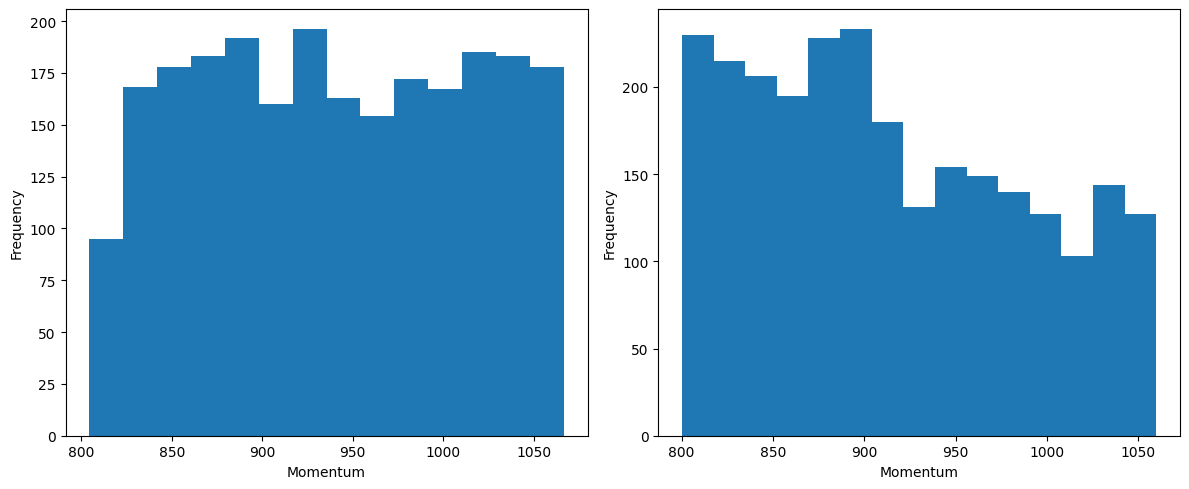

In [133]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)  
plt.hist(bdf[(bdf.mass < 110) & (bdf.momentum > 800)].momentum, bins='auto')
plt.xlabel('Momentum')
plt.ylabel('Frequency')

# Второй сабплот
plt.subplot(1, 2, 2)  
plt.hist(bdf_d[(bdf_d.mass == mu_mass) & (bdf_d.momentum > 800) & (bdf_d.momentum < 1060)].momentum, bins='auto')
plt.xlabel('Momentum')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

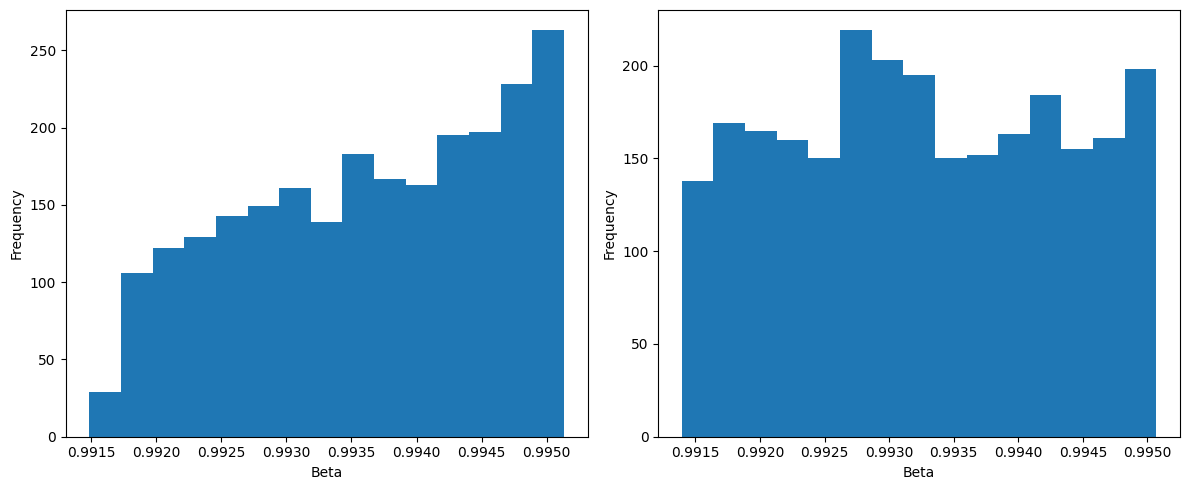

In [134]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)  
plt.hist(bdf[(bdf.mass < 110) & (bdf.momentum > 800)].beta, bins='auto')
plt.xlabel('Beta')
plt.ylabel('Frequency')

# Второй сабплот
plt.subplot(1, 2, 2)  
plt.hist(bdf_d[(bdf_d.mass == mu_mass) & (bdf_d.momentum > 800) & (bdf_d.momentum < 1060)].beta, bins='auto')
plt.xlabel('Beta')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

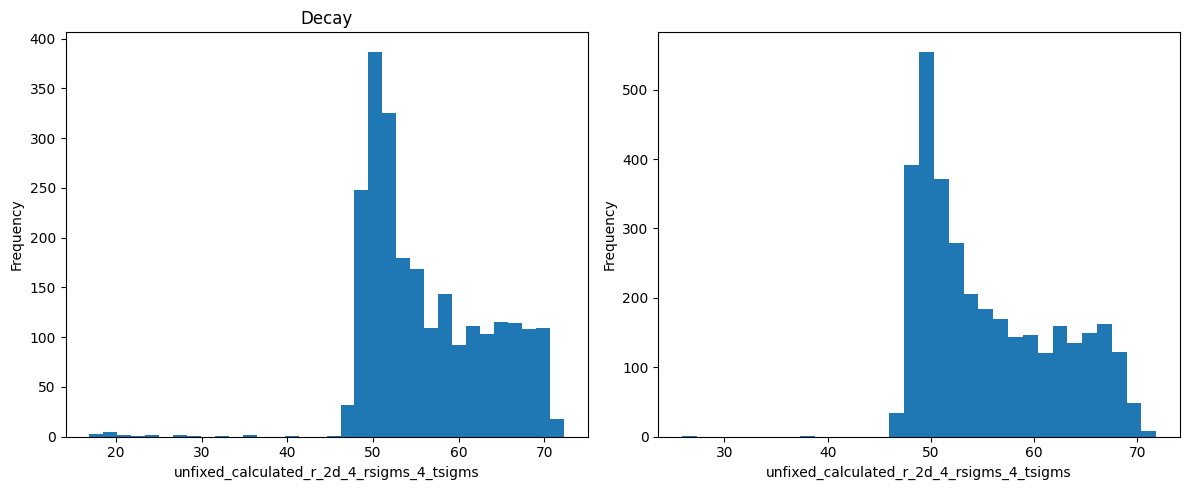

In [150]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)  
plt.hist(bdf[(bdf.mass < 110) & (bdf.momentum > 800)].unfixed_calculated_r_2d_4_rsigms_4_tsigms, bins='auto')
plt.xlabel('unfixed_calculated_r_2d_4_rsigms_4_tsigms')
plt.title('Decay')
plt.ylabel('Frequency')

# Второй сабплот
plt.subplot(1, 2, 2)  
plt.hist(bdf_d[(bdf_d.mass == mu_mass) & (bdf_d.momentum > 800) & (bdf_d.momentum < 1060)].unfixed_calculated_r_2d_4_rsigms_4_tsigms, bins='auto')
plt.xlabel('unfixed_calculated_r_2d_4_rsigms_4_tsigms')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

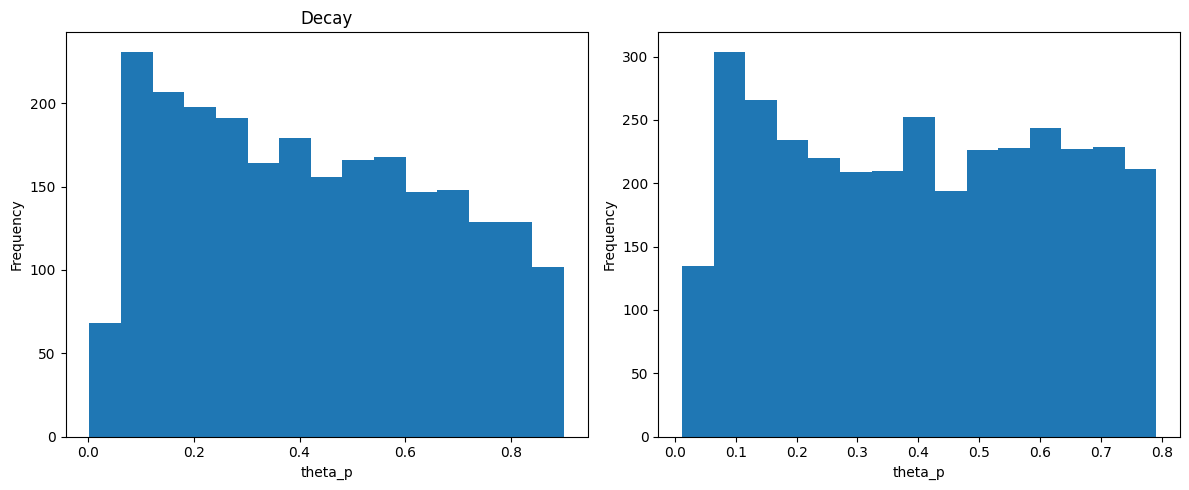

In [148]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)  
plt.hist(bdf[(bdf.mass < 110) & (bdf.momentum > 800)].theta_p, bins='auto')
plt.xlabel('theta_p')
plt.title('Decay')
plt.ylabel('Frequency')

# Второй сабплот
plt.subplot(1, 2, 2)  
plt.hist(bdf_d[(bdf_d.mass == mu_mass) & (bdf_d.momentum > 800) & (bdf_d.momentum < 1060)].theta_p, bins='auto')
plt.xlabel('theta_p')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

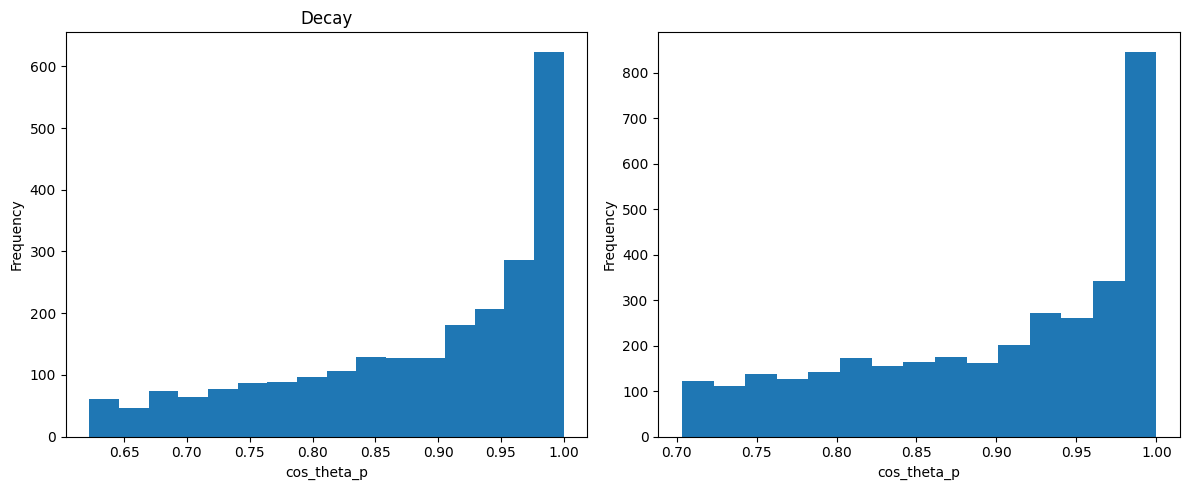

In [149]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)  
plt.hist(bdf[(bdf.mass < 110) & (bdf.momentum > 800)].cos_theta_p, bins='auto')
plt.xlabel('cos_theta_p')
plt.title('Decay')
plt.ylabel('Frequency')

# Второй сабплот
plt.subplot(1, 2, 2)  
plt.hist(bdf_d[(bdf_d.mass == mu_mass) & (bdf_d.momentum > 800) & (bdf_d.momentum < 1060)].cos_theta_p, bins='auto')
plt.xlabel('cos_theta_p')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [144]:
edf_d.loc[2]

,x_c,z_c,y_c,t_c,x_i,y_i,mass,true_p,beta,x_p,...,recalculated_nx_p,recalculated_ny_p,recalculated_nz_p,theta_p,rotated_r_c,rotated_phi_c,signal_counts,param_group,slice_counts_4_sigms,unfixed_calculated_r_2d_4_rsigms_4_tsigms
subentry,,,,,,,,,,,,,,,,,,,,,
0,102.880127,1000.0,249.759995,5.082382,95.876434,301.054077,105.650002,816.785278,0.991738,0.0,...,0,0,1,0.306027,53.774521,1.725229,35,10.0,0.024343,50.649242
1,133.120132,1000.0,266.559998,5.070121,95.876434,301.054077,105.650002,816.785278,0.991738,0.0,...,0,0,1,0.306027,52.115154,2.412525,35,10.0,0.177215,50.649242
2,89.440132,1000.0,249.759995,5.107593,95.876434,301.054077,105.650002,816.785278,0.991738,0.0,...,0,0,1,0.306027,53.670403,1.454698,35,10.0,0.024343,50.649242
3,92.800133,1000.0,253.119995,5.079957,95.876434,301.054077,105.650002,816.785278,0.991738,0.0,...,0,0,1,0.306027,49.571281,1.518107,35,10.0,0.382384,50.649242
4,119.680130,1000.0,256.480011,5.093956,95.876434,301.054077,105.650002,816.785278,0.991738,0.0,...,0,0,1,0.306027,52.305527,2.085050,35,10.0,0.177215,50.649242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1804,-107.083565,1000.0,484.494080,3.558564,95.876434,301.054077,NaN,816.785278,0.991738,0.0,...,0,0,1,0.306027,230.387344,-0.717283,35,10.0,0.000000,50.649242
1805,-93.643562,1000.0,316.494080,1.072552,95.876434,301.054077,NaN,816.785278,0.991738,0.0,...,0,0,1,0.306027,203.414062,-0.091503,35,10.0,0.000000,50.649242
1807,188.596436,1000.0,434.094055,6.585194,95.876434,301.054077,NaN,816.785278,0.991738,0.0,...,0,0,1,0.306027,124.857582,-2.193172,35,10.0,0.000000,50.649242


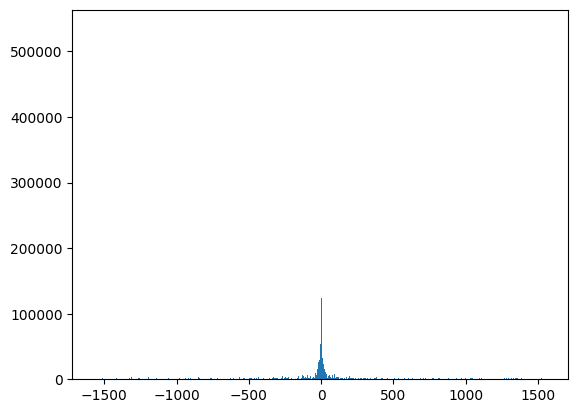

In [94]:
plt.hist(edf_d.rotated_y_i, bins='auto')
plt.show()

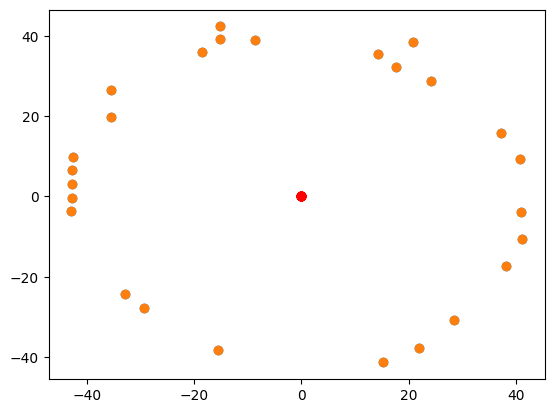

In [105]:
ev = 0
plt.scatter(edf_d.loc[ev].rotated_x, edf_d.loc[ev].rotated_y)
plt.scatter(edf_d[edf_d.signal == True].loc[ev].rotated_x, edf_d[edf_d.signal == True].loc[ev].rotated_y)
plt.scatter(edf_d.loc[ev].rotated_x_i, edf_d.loc[ev].rotated_y_i, c='r')
plt.show()

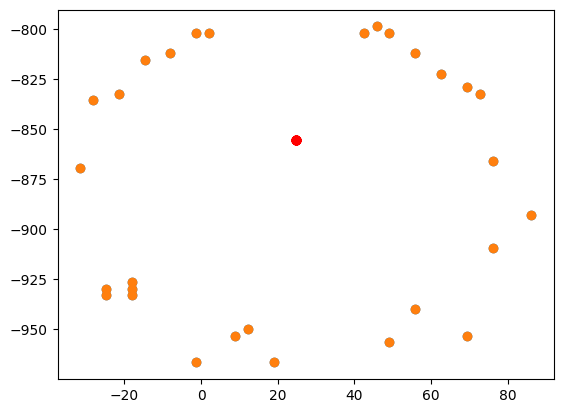

In [106]:
ev = 6
plt.scatter(edf_d.loc[ev].x_c, edf_d.loc[ev].y_c)
plt.scatter(edf_d[edf_d.signal == True].loc[ev].x_c, edf_d[edf_d.signal == True].loc[ev].y_c)
plt.scatter(edf_d.loc[ev].x_i, edf_d.loc[ev].y_i, c='r')
plt.show()

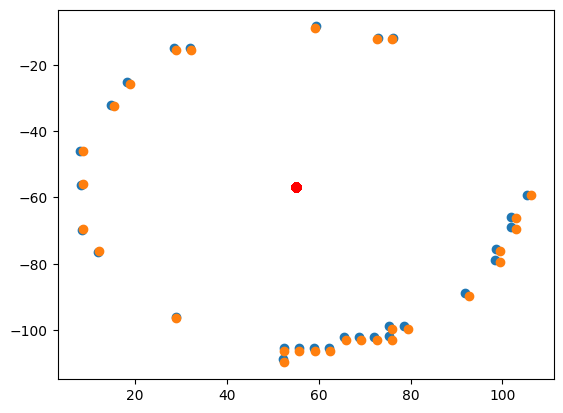

In [147]:
ev = 1
# plt.scatter(edf_d.loc[ev].recalculated_x, edf_d.loc[ev].recalculated_y)
plt.scatter(edf_d[edf_d.signal == True].loc[ev].recalculated_x, edf_d[edf_d.signal == True].loc[ev].recalculated_y)
plt.scatter(edf_d[edf_d.signal == True].loc[ev].x_c, edf_d[edf_d.signal == True].loc[ev].y_c)
plt.scatter(edf_d.loc[ev].x_i, edf_d.loc[ev].y_i, c='r')
plt.show()

In [284]:
plt.rcParams['font.size'] = 12

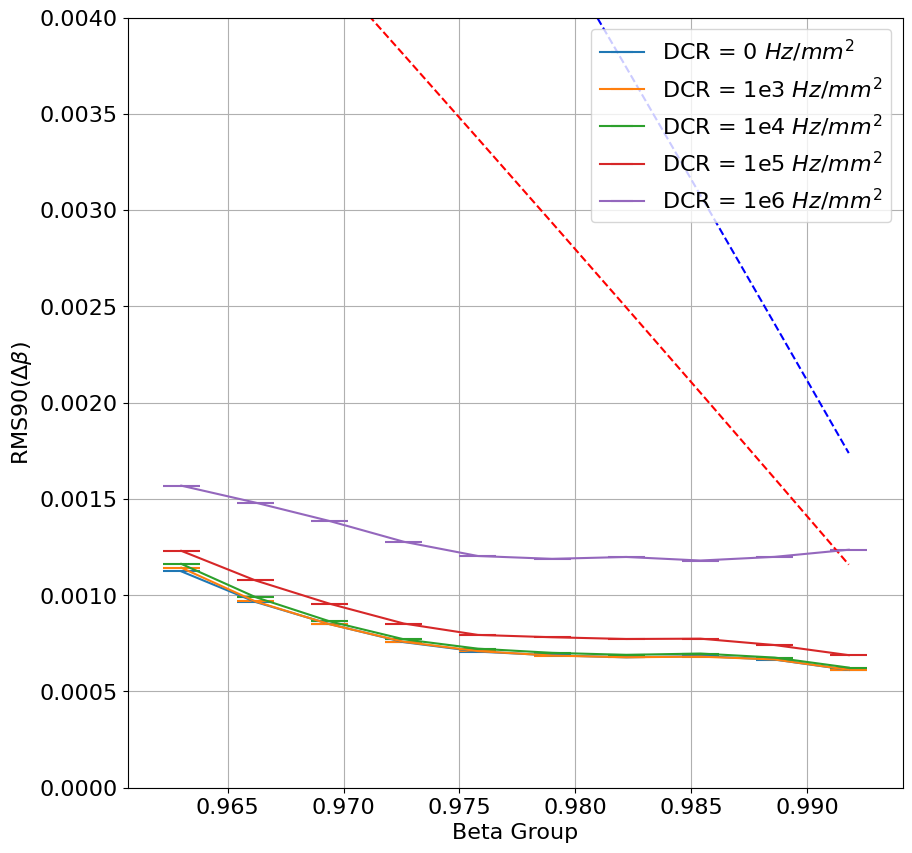

In [55]:
avgs = np.zeros((10, 5))
data = []

for i in range(5):
    data.append(np.genfromtxt(f"beta_sigms_{i}.csv", delimiter=",", skip_header=1))
data = np.array(data)
means = np.mean(data, axis=0)
errs = np.std(data, axis=0) / np.sqrt(5)

# file_path = 'Final.csv'  # Replace with the correct path
# data = pd.read_csv(file_path)
plt.figure(figsize=(10, 10))
pi_mass = 139.57
mu_mass = 105.65
ka_mass = 493.67
num_of_groups = 10
labels = ['0', '1e3', '1e4', '1e5', '1e6']
labels = ["DCR = " + i + " $Hz/mm^2$" for i in labels]
colors = ["c", "y", "g", "r", "m"]
y = np.arange(1, 10 + 1)
x = (
    y * (0.995 - 0.963)
    - 0.995
    + (num_of_groups + 1) * 0.963
) / num_of_groups

# Select RMS and y-error columns, excluding those with 'deglim'
# rms_columns = [col for col in data.columns if 'RMS' in col and 'deglim' not in col and '_yerr' not in col]
# rms_yerr_columns = [col for col in data.columns if 'RMS' in col and 'deglim' not in col and '_yerr' in col]

# Generate arbitrary x values
x_values = x
x_error = (x_values[1] - x_values[0]) / 4

# Define the function for momentum calculation
# def momentum_from_beta(beta, mass):
#     gamma = 1 / np.sqrt(1 - beta**2)
#     return gamma * beta * mass

# Plot the RMS values with error bars
for i in range(5):
    if i < 4:
        y_values = means[:,i]
        y_values += 0.0001
        y_errors = errs[:,i]
        plt.errorbar(x_values, y_values, xerr=x_error, label=labels[i], fmt='-', capsize=0)
    if i == 4:
        y_values = means[:,i]
        y_values += np.array([0.0001,0.00005,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.00015,0.00022]) + 0.00005
        y_errors = errs[:,i]
        plt.errorbar(x_values, y_values, xerr=x_error, label=labels[i], fmt='-', capsize=0)

colors = ['g', 'b', 'r']
for i in range(3, 1, -1):
    required_separation = [
        (beta_from_momentum(momentum_from_beta(b, pi_mass), mu_mass) - b) / (i) for b in x
    ]
    plt.plot(x, required_separation, linestyle="--", color=colors[i-1])

# Set plot labels and title
plt.xlabel('Beta Group')
plt.ylabel(r'RMS90($\Delta\beta$)')
plt.legend(loc='upper right')
plt.ylim((0, 0.004))
plt.grid(True)

# Add secondary x-axis for momentum at the bottom
def beta_to_momentum(beta):
    return momentum_from_beta(beta, pi_mass)



plt.show()


In [34]:
x

array([0.96  , 0.9635, 0.967 , 0.9705, 0.974 , 0.9775, 0.981 , 0.9845,
       0.988 , 0.9915])